# FINAL PROJECT SHAPES

In [1]:
# imports
from PIL import Image
import os
import glob
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import cv2
import numpy as np
import imutils

# Preparing the images for the assimilation phase to the algorithm

### At this stage we process all the images according to the correct sizes and crop them in order to implement the SSIM algorithm

In [33]:
#Function that making the image only with the colors black and white
#input: image(matrix)
#output: white_black image(matrix)
def makingImageBlackAndWhite(image_obj, threshold_value = 127):
    (thresh, BnW_image_obj) = cv2.threshold(image_obj, threshold_value, 255, cv2.THRESH_BINARY)
    return BnW_image_obj

In [31]:
#This function was created to find the best values for the crop, for avery image we will find the min_max values to cut it.
#input(image(matrix),int flag)
#output image after crop.
def minmax(image_path,flag):
    image_obj = Image.open(image_path)
    image_obj.load()
    if flag == 1: # flag means if we are in the original data we dont need to crop the images.
        image_obj = image_obj.crop((0, 219, 1365, 860))
    image_data = np.asarray(image_obj)
    image_data = makingImageBlackAndWhite(image_data)
    image_data_inv = 255 - image_data
    image_data_bw = image_data_inv.max(axis=2)
    non_empty_columns = np.where(image_data_bw.max(axis=0)>0)[0]
    non_empty_rows = np.where(image_data_bw.max(axis=1)>0)[0]
    if len(non_empty_columns) == 0 or len(non_empty_rows) == 0:
        cropBox = (0, image_data.shape[0]-1, 0, image_data.shape[1]-1)
    else:
        cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))
    image_data_new = image_data[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]
    new_image = Image.fromarray(image_data_new)
    return new_image

# use this code when getting new images / working with new machine:

In [61]:
# Path to the root folder
root_folder = 'C:\\Users\\koazg\\Desktop\\ShapeProject\\TestImages'

# Loop over each folder in the root folder that has subfolders
for entry in os.scandir(root_folder):
    if entry.is_dir():
        # Check if the current folder contains any subfolders
        subfolders = [subentry for subentry in os.scandir(entry.path) if subentry.is_dir()]
        if subfolders:
            # Loop over each subfolder that has a 'SimpleTest' subfolder
            for subentry in subfolders:
                simple_test_folder = os.path.join(subentry.path, subentry.path)

                # Create the output folder in the parent directory of the 'SimpleTest' folder
                output_folder = os.path.join(os.path.dirname(simple_test_folder), subentry.path+"Crop")
                if not os.path.exists(output_folder):
                    os.makedirs(output_folder)

                # Find all PNG files in the 'SimpleTest' folder
                png_files = sorted(glob.glob(os.path.join(simple_test_folder, '*.png')))

                # Loop over each PNG file and crop it
                for i, input_path in enumerate(png_files):
                    #print(input_path)
                    new_image = minmax(input_path,1)
                    output_path = os.path.join(output_folder, os.path.basename(input_path))
                    new_image.save(output_path)

# Handling the original images

# use this code when getting new images / working with new machine:

#### Insert the OriginalImage Folder into the Root Folder of the project 

In [5]:
# # Path to the root folder
# root_folder = 'C:\\Users\\idank\\final_project\\ShapeProject'
# input_folder = os.path.join(root_folder, 'OriginalImages')
# output_folder = os.path.join(root_folder, 'OriginalImagesCrop')

# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)
    
# png_files = sorted(glob.glob(os.path.join(input_folder, '*.jpg')))

# for i, input_path in enumerate(png_files):
#     new_image = minmax(input_path,0)
#     output_path = os.path.join(output_folder, os.path.basename(input_path))
#     new_image.save(output_path)

In [6]:
# The function makin resize to the image by the length and the width that we are getting and maintains the relation between them.
# The size of the new image determined by the smaller size between the length and the width and by the relation between the sizes of the image.
#input: (image(matrix),int length, int width)
#output: resized_image(matrix)
def resizeImage(image_obj,length,width):
    length_image = np.size(image_obj,0)
    width_image = np.size(image_obj,1)
    relation = max(length_image,width_image) / min(length_image,width_image)
    if(length <= width):
        if(length_image <= width_image):
            dim = (int(relation * length), length)
        else:
            dim = (int(1 / relation * length), length)
        
        resized_image= cv2.resize(image_obj, dim, interpolation = cv2.INTER_AREA)
    else:
        if(width_image <= length_image):
            dim = (width, int(width * relation))
        else:
            dim = (width,int(1 / relation *width))
        resized_image = cv2.resize(image_obj, dim, interpolation = cv2.INTER_AREA)
    return resized_image

In [64]:
def image_resize_keep_ratio(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]
#     (h, w) = image.shape

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

# # tests:
# img_path = r"C:\Users\idank\Desktop\profile.jfif"
# src_img_obj = cv2.imread(img_path, 0)
# src_img_obj_forced_resized = cv2.resize(src_img_obj, (200,300))
# print(src_img_obj_forced_resized.shape)
# resized = image_resize_keep_ratio(src_img_obj_forced_resized, width = 200, height = None, inter = cv2.INTER_AREA)
# print(resized.shape)
# plt.imshow(resized)
# plt.show()

# img_path2 = r"C:\Users\idank\Desktop\profile_resized.jpg"
# cv2.imwrite(img_path2, resized)

# padding

In [50]:
# padding_image function:
# input: img_path - path to img (change to img obj of cv2.imread(img_path)?
#        top, bottom, left, right - int type, how much padding from each side
# retutn: img obj of cv2.imread(img_path) with padding with white color 

def padding_image(top, bottom, left, right, img_path = None, img_obj = None):
    
#     BLACK = [0,0,0]
    WHITE = [255,255,255]
    
    if img_obj is None:
        img_obj = cv2.imread(img_path)
        
    img_padd = cv2.copyMakeBorder(img_obj, top, bottom, left, right,cv2.BORDER_CONSTANT,value=WHITE)
#     plt.imshow(img_padd)
#     plt.show()

#     change original file
#     cv2.imwrite(img_path, img_padd)
    return img_padd
    
    

# metrics:

### SSIM:

In [9]:
# images variables are images objects:
def calculate_ssim(img1_obj, img2_obj):
    # Load images and convert to grayscale
    img1 = np.array(img1_obj)
    img2 = np.array(img2_obj)

    # Calculate SSIM score
    ssim_score = ssim(img1, img2)

    return ssim_score

# # images variables are images paths:
# def calculate_ssim(img1_path, img2_path):
#     # Load images and convert to grayscale
#     img1 = np.array(Image.open(img1_path).convert('L'))
#     img2 = np.array(Image.open(img2_path).convert('L'))

#     # Calculate SSIM score
#     ssim_score = ssim(img1, img2)

#     return ssim_score

In [10]:
def calculate_ssim2(img1, img2, k1=0.01, k2=0.03, L=255, window_size=11):
    
    # Get dimensions of image
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    height, width = img1.shape

    # Create sliding window
    window = cv2.getGaussianKernel(window_size, std=1.5)
    window = np.outer(window, window.transpose())

    # Calculate means, variances, and covariances
    mu1 = cv2.filter2D(img1, -1, window)[window_size//2:height-window_size//2+1, window_size//2:width-window_size//2+1]
    mu2 = cv2.filter2D(img2, -1, window)[window_size//2:height-window_size//2+1, window_size//2:width-window_size//2+1]
    mu1_sq = mu1 * mu1
    mu2_sq = mu2 * mu2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1 * img1, -1, window)[window_size//2:height-window_size//2+1, window_size//2:width-window_size//2+1] - mu1_sq
    sigma2_sq = cv2.filter2D(img2 * img2, -1, window)[window_size//2:height-window_size//2+1, window_size//2:width-window_size//2+1] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[window_size//2:height-window_size//2+1, window_size//2:width-window_size//2+1] - mu1_mu2

    # Calculate SSIM score
    C1 = (k1*L)**2
    C2 = (k2*L)**2
    numerator = (2*mu1_mu2 + C1) * (2*sigma12 + C2)
    denominator = (mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2)
    return np.mean(numerator / denominator)

In [11]:
# ssim with image ratio distortion

def bruteForceImagesScore(src_img_path, hand_copy_img_path, resize_src_to_copy=False):
    src_img_obj = cv2.imread(src_img_path, 0)
    hand_copy_img_obj = cv2.imread(hand_copy_img_path, 0)
    
    src_img_shape = src_img_obj.shape
    hand_copy_img_shape = hand_copy_img_obj.shape
    
    if resize_src_to_copy:
        width = hand_copy_img_shape[1]
        height = hand_copy_img_shape[0]
        src_img_obj_resized = cv2.resize(src_img_obj, (width, height))
        img1_obj = src_img_obj_resized
        img2_obj = hand_copy_img_obj        
    else:
        width = src_img_shape[1]
        height = src_img_shape[0]
        hand_copy_img_obj_resized = cv2.resize(hand_copy_img_obj, (width, height))
        img1_obj = src_img_obj
        img2_obj = hand_copy_img_obj_resized
    
    plt.imshow(img1_obj, cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.imshow(img2_obj, cmap='gray', vmin=0, vmax=255)
    plt.show()
    return calculate_ssim(img1_obj, img2_obj)

In [12]:
# # test:    
# img_src_path = r"C:\Users\idank\final_project\OriginalImagesCrop\2.jpg"
# img_test_path = r"C:\Users\idank\final_project\TestImages\11030\SimpleTestCrop\2.png"
# ssim1 = bruteForceImagesScore(src_img_path=img_src_path, hand_copy_img_path=img_test_path, resize_src_to_copy=False)
# print(ssim1)
# ssim2 = bruteForceImagesScore(src_img_path=img_src_path, hand_copy_img_path=img_test_path, resize_src_to_copy=True)
# print(ssim2)

### Another metrics:

In [13]:
def hu_moments_similarity(contour1, contour2):
    hu1 = cv2.HuMoments(cv2.moments(contour1)).flatten()
    hu2 = cv2.HuMoments(cv2.moments(contour2)).flatten()
    hu1 = np.sign(hu1) * np.log10(np.abs(hu1))
    hu2 = np.sign(hu2) * np.log10(np.abs(hu2))
    similarity = 1 - np.linalg.norm(hu1 - hu2) / np.linalg.norm(hu1 + hu2)
    return similarity

def shape_context_similarity(contour1, contour2):
    sd = cv2.createShapeContextDistanceExtractor()
    similarity = 1 - sd.computeDistance(contour1, contour2)
    return similarity

def image_moments_similarity(contour1, contour2):
    moments1 = cv2.moments(contour1)
    moments2 = cv2.moments(contour2)
    similarity = 1 - np.linalg.norm(np.array(list(moments1.values())) - np.array(list(moments2.values()))) / np.linalg.norm(np.array(list(moments1.values())) + np.array(list(moments2.values())))
    return similarity


# FFT

def preprocess_image(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    largest_contour = max(contours, key=cv2.contourArea)
    return largest_contour

def fourier_descriptors(contour):
    contour_complex = np.squeeze(contour).astype(np.complex128)
    fourier_descriptors = np.fft.fft(contour_complex)
    return fourier_descriptors

def normalize_fourier_descriptors(fd):
    # Make the descriptors invariant to scale and rotation
    fd_normalized = fd[1:] / np.abs(fd[1])  # Skip the first descriptor (DC component)
    return fd_normalized

def similarity_metric(fd1, fd2):
#     # Remove unnecessary dimensions from fd1 and fd2
#     fd1 = np.squeeze(fd1)
#     fd2 = np.squeeze(fd2)
    
    # Convert fd1 and fd2 to 1-dimensional arrays
    fd1 = np.ravel(fd1)
    fd2 = np.ravel(fd2)
    
    # Interpolate fd1 to match the length of fd2
    fd1_interpolated = np.interp(np.linspace(0, 1, len(fd2)), np.linspace(0, 1, len(fd1)), fd1)
    
    # Euclidean distance as the similarity metric
    similarity = 1 - np.linalg.norm(fd1_interpolated - fd2) / np.linalg.norm(fd1_interpolated + fd2)
    return similarity

# end FFT


# Idan's Metric:

def simpleMetric(img1, img2):
    
    both_white = (img1 == 255) & (img2 == 255)
    both_black = (img1 == 0) & (img2 == 0)
    not_same = ((img1 == 255) & (img2 == 0)) | ((img1 == 0) & (img2 == 255))
    
    count_both_white = np.sum(both_white)
    count_both_black = np.sum(both_black)
    count_not_same = np.sum(not_same)
    ratio = (2*count_both_black / (2*count_both_black + count_not_same))

    return count_both_white, count_both_black, count_not_same, ratio

# Test metrics with padding movements search (for best result):

### SSIM:

In [14]:
MAX_WIDTH_OR_HEIGHT = 100

def new_ssim(src_img_path, hand_copy_img_path, width_jump = 1, height_jump = 1, plots = False, print_each_ssim_score = False, CONSTANT_PADDING=5):
    src_img_obj = cv2.imread(src_img_path, 0)
    hand_copy_img_obj = cv2.imread(hand_copy_img_path, 0)
    
    src_img_shape = src_img_obj.shape
    hand_copy_img_shape = hand_copy_img_obj.shape
    
#     print(f'src_img_shape: {src_img_shape}')
#     print(f'hand_copy_img_shape: {hand_copy_img_shape}')
    if src_img_shape[0] <= 20 or src_img_shape[1] <=20:
        pass # image is too small to down-resize it
    else:
        if src_img_shape[0] > MAX_WIDTH_OR_HEIGHT:
            src_img_obj = imutils.resize(src_img_obj, height=MAX_WIDTH_OR_HEIGHT)
            src_img_shape = src_img_obj.shape
        if src_img_shape[1] > MAX_WIDTH_OR_HEIGHT:
            src_img_obj = imutils.resize(src_img_obj, width=MAX_WIDTH_OR_HEIGHT)
            src_img_shape = src_img_obj.shape

    src_img_obj_padd = padding_image(top = CONSTANT_PADDING, bottom = CONSTANT_PADDING, left = CONSTANT_PADDING, right = CONSTANT_PADDING, img_path = None, img_obj = src_img_obj)
    src_img_obj_padd_shape = src_img_obj_padd.shape
    
    src_img_shape = list(src_img_shape)
    src_img_obj_padd_shape = list(src_img_obj_padd_shape)
    
    hand_copy_img_obj_resized_ratio = image_resize_keep_ratio(hand_copy_img_obj, width = src_img_shape[1], height = None, inter = cv2.INTER_AREA)
    if (hand_copy_img_obj_resized_ratio.shape[0] > src_img_shape[0] or hand_copy_img_obj_resized_ratio.shape[1] > src_img_shape[1]):
        hand_copy_img_obj_resized_ratio = image_resize_keep_ratio(hand_copy_img_obj, width = None, height = src_img_shape[0], inter = cv2.INTER_AREA)
    hand_copy_img_obj_resized_ratio_shape = list(hand_copy_img_obj_resized_ratio.shape)
    
#     make sure ink is black, background is white:
#     hand_copy_img_obj_resized_ratio = makingImageBlackAndWhite(hand_copy_img_obj_resized_ratio, threshold_value = 254)
    THRESHOD = 254
    image_as_array = np.array(hand_copy_img_obj_resized_ratio)
    image_as_array[image_as_array > THRESHOD] = 255
    image_as_array[image_as_array <= THRESHOD] = 0
    hand_copy_img_obj_resized_ratio = image_as_array
    
    image_as_array = np.array(src_img_obj_padd)
    image_as_array[image_as_array > THRESHOD] = 255
    image_as_array[image_as_array <= THRESHOD] = 0
    src_img_obj_padd = image_as_array

    
    shape_diff = [src_img_obj_padd_shape[0] - hand_copy_img_obj_resized_ratio_shape[0], src_img_obj_padd_shape[1] - hand_copy_img_obj_resized_ratio_shape[1]]
    height_space = shape_diff[0]
    width_space = shape_diff[1]
#     print("height_space:" + str(height_space))
#     print("width_space:" + str(width_space))
    
    best_ssim = -1
    

    for left_padd in range(0, width_space+1, width_jump):
        for top_padd in range(0, height_space+1, width_jump):
            top = top_padd
            bottom = height_space-top_padd
            left = left_padd
            right = width_space-left_padd
            hand_copy_img_obj_resized_ratio_padd = padding_image(top, bottom, left, right, img_path = None, img_obj = hand_copy_img_obj_resized_ratio)
            ssim_score = calculate_ssim(src_img_obj_padd, hand_copy_img_obj_resized_ratio_padd)
            if plots:
                f, axarr = plt.subplots(1,3)
                axarr[0].imshow(src_img_obj_padd, cmap='gray', vmin=0, vmax=255)
                axarr[1].imshow(hand_copy_img_obj_resized_ratio_padd, cmap='gray', vmin=0, vmax=255)
                axarr[2].imshow(cv2.addWeighted(src_img_obj_padd,0.5,hand_copy_img_obj_resized_ratio_padd,0.5,0))
                plt.show()
            if print_each_ssim_score:
                print("ssim_score: " + str(ssim_score))
            
            if ssim_score > best_ssim:
                best_ssim = ssim_score
                best_padding = (top, bottom, left, right)
                best_hand_copy_img_obj_resized_ratio_padd = hand_copy_img_obj_resized_ratio_padd
    
    return src_img_obj_padd, best_ssim, best_padding, best_hand_copy_img_obj_resized_ratio_padd
            
        

In [15]:
# img_test_path = r"C:\Users\idank\final_project\TestImages\11030\SimpleTestCrop\2.png"
# img_src_path = r"C:\Users\idank\final_project\OriginalImagesCrop\2.jpg"

# # img_path = r"C:\Users\idank\Desktop\profile.jfif"
# # img_path2 = r"C:\Users\idank\Desktop\profile_resized.jpg"
# src_img_obj_padd, best_ssim, best_padding, best_hand_copy_img_obj_resized_ratio_padd = new_ssim(src_img_path=img_src_path, hand_copy_img_path=img_test_path, width_jump = 50, height_jump = 5, plots=True)

# img1 = np.array(src_img_obj_padd)
# img2 = np.array(best_hand_copy_img_obj_resized_ratio_padd)
# combine_img = img1 > img2

# print()
# print()
# print()
# print("best_ssim: " + str(best_ssim))
# print("best_padding: " + str(best_padding))
# f, axarr = plt.subplots(1,3)
# axarr[0].imshow(src_img_obj_padd, cmap='gray', vmin=0, vmax=255)
# axarr[1].imshow(best_hand_copy_img_obj_resized_ratio_padd, cmap='gray', vmin=0, vmax=255)
# axarr[2].imshow(cv2.addWeighted(src_img_obj_padd,0.2,best_hand_copy_img_obj_resized_ratio_padd,0.8,0))

# plt.show()

### Idan's Metric:

In [16]:
MAX_WIDTH_OR_HEIGHT = 100

def new_simpleMetric(src_img_path, hand_copy_img_path, width_jump = 1, height_jump = 1, plots = False, print_each_ssim_score = False, CONSTANT_PADDING=5):
    src_img_obj = cv2.imread(src_img_path, 0)
    hand_copy_img_obj = cv2.imread(hand_copy_img_path, 0)
    
    src_img_shape = src_img_obj.shape
    hand_copy_img_shape = hand_copy_img_obj.shape
    
#     print(f'src_img_shape: {src_img_shape}')
#     print(f'hand_copy_img_shape: {hand_copy_img_shape}')
    if src_img_shape[0] <= 20 or src_img_shape[1] <=20:
        pass # image is too small to down-resize it
    else:
        if src_img_shape[0] > MAX_WIDTH_OR_HEIGHT:
            src_img_obj = imutils.resize(src_img_obj, height=MAX_WIDTH_OR_HEIGHT)
            src_img_shape = src_img_obj.shape
        if src_img_shape[1] > MAX_WIDTH_OR_HEIGHT:
            src_img_obj = imutils.resize(src_img_obj, width=MAX_WIDTH_OR_HEIGHT)
            src_img_shape = src_img_obj.shape

    src_img_obj_padd = padding_image(top = CONSTANT_PADDING, bottom = CONSTANT_PADDING, left = CONSTANT_PADDING, right = CONSTANT_PADDING, img_path = None, img_obj = src_img_obj)
    src_img_obj_padd_shape = src_img_obj_padd.shape
    
    src_img_shape = list(src_img_shape)
    src_img_obj_padd_shape = list(src_img_obj_padd_shape)
    
    hand_copy_img_obj_resized_ratio = image_resize_keep_ratio(hand_copy_img_obj, width = src_img_shape[1], height = None, inter = cv2.INTER_AREA)
    if (hand_copy_img_obj_resized_ratio.shape[0] > src_img_shape[0] or hand_copy_img_obj_resized_ratio.shape[1] > src_img_shape[1]):
        hand_copy_img_obj_resized_ratio = image_resize_keep_ratio(hand_copy_img_obj, width = None, height = src_img_shape[0], inter = cv2.INTER_AREA)
    hand_copy_img_obj_resized_ratio_shape = list(hand_copy_img_obj_resized_ratio.shape)
    
#     make sure ink is black, background is white:
#     hand_copy_img_obj_resized_ratio = makingImageBlackAndWhite(hand_copy_img_obj_resized_ratio, threshold_value = 254)
    THRESHOD = 254
    image_as_array = np.array(hand_copy_img_obj_resized_ratio)
    image_as_array[image_as_array > THRESHOD] = 255
    image_as_array[image_as_array <= THRESHOD] = 0
    hand_copy_img_obj_resized_ratio = image_as_array
    
    image_as_array = np.array(src_img_obj_padd)
    image_as_array[image_as_array > THRESHOD] = 255
    image_as_array[image_as_array <= THRESHOD] = 0
    src_img_obj_padd = image_as_array

    
    shape_diff = [src_img_obj_padd_shape[0] - hand_copy_img_obj_resized_ratio_shape[0], src_img_obj_padd_shape[1] - hand_copy_img_obj_resized_ratio_shape[1]]
    height_space = shape_diff[0]
    width_space = shape_diff[1]
#     print("height_space:" + str(height_space))
#     print("width_space:" + str(width_space))
    
    best_ssim = -1
    

    for left_padd in range(0, width_space+1, width_jump):
        for top_padd in range(0, height_space+1, width_jump):
            top = top_padd
            bottom = height_space-top_padd
            left = left_padd
            right = width_space-left_padd
            hand_copy_img_obj_resized_ratio_padd = padding_image(top, bottom, left, right, img_path = None, img_obj = hand_copy_img_obj_resized_ratio)
            count_both_white, count_both_black, count_not_same, ssim_score = simpleMetric(src_img_obj_padd, hand_copy_img_obj_resized_ratio_padd)
            if plots:
                f, axarr = plt.subplots(1,3)
                axarr[0].imshow(src_img_obj_padd, cmap='gray', vmin=0, vmax=255)
                axarr[1].imshow(hand_copy_img_obj_resized_ratio_padd, cmap='gray', vmin=0, vmax=255)
                axarr[2].imshow(cv2.addWeighted(src_img_obj_padd,0.5,hand_copy_img_obj_resized_ratio_padd,0.5,0))
                plt.show()
            if print_each_ssim_score:
                print("ssim_score: " + str(ssim_score))
            
            if ssim_score > best_ssim:
                best_ssim = ssim_score
                best_padding = (top, bottom, left, right)
                best_hand_copy_img_obj_resized_ratio_padd = hand_copy_img_obj_resized_ratio_padd
    
    return src_img_obj_padd, best_ssim, best_padding, best_hand_copy_img_obj_resized_ratio_padd
            
        

### hu_moments_similarity:


In [21]:
MAX_WIDTH_OR_HEIGHT = 100

def new_hu_moments_similarity(src_img_path, hand_copy_img_path, width_jump = 1, height_jump = 1, plots = False, print_each_ssim_score = False):
    src_img_obj = cv2.imread(src_img_path, 0)
    hand_copy_img_obj = cv2.imread(hand_copy_img_path, 0)
    
    src_img_shape = src_img_obj.shape
    hand_copy_img_shape = hand_copy_img_obj.shape
    
    if src_img_shape[0] <= 20 or src_img_shape[1] <=20:
        pass # image is too small to down-resize it
    else:
        if src_img_shape[0] > MAX_WIDTH_OR_HEIGHT:
            src_img_obj = imutils.resize(src_img_obj, height=MAX_WIDTH_OR_HEIGHT)
            src_img_shape = src_img_obj.shape
        if src_img_shape[1] > MAX_WIDTH_OR_HEIGHT:
            src_img_obj = imutils.resize(src_img_obj, width=MAX_WIDTH_OR_HEIGHT)
            src_img_shape = src_img_obj.shape

    
    CONSTANT_PADDING = 5
    src_img_obj_padd = padding_image(top = CONSTANT_PADDING, bottom = CONSTANT_PADDING, left = CONSTANT_PADDING, right = CONSTANT_PADDING, img_path = None, img_obj = src_img_obj)
    src_img_obj_padd_shape = src_img_obj_padd.shape
    
    src_img_shape = list(src_img_shape)
    src_img_obj_padd_shape = list(src_img_obj_padd_shape)
    
    hand_copy_img_obj_resized_ratio = image_resize_keep_ratio(hand_copy_img_obj, width = src_img_shape[1], height = None, inter = cv2.INTER_AREA)
    if (hand_copy_img_obj_resized_ratio.shape[0] > src_img_shape[0] or hand_copy_img_obj_resized_ratio.shape[1] > src_img_shape[1]):
        hand_copy_img_obj_resized_ratio = image_resize_keep_ratio(hand_copy_img_obj, width = None, height = src_img_shape[0], inter = cv2.INTER_AREA)
    hand_copy_img_obj_resized_ratio_shape = list(hand_copy_img_obj_resized_ratio.shape)
    
#     make sure ink is black, background is white:
#     hand_copy_img_obj_resized_ratio = makingImageBlackAndWhite(hand_copy_img_obj_resized_ratio, threshold_value = 254)
    THRESHOD = 254
    image_as_array = np.array(hand_copy_img_obj_resized_ratio)
    image_as_array[image_as_array > THRESHOD] = 255
    image_as_array[image_as_array <= THRESHOD] = 0
    hand_copy_img_obj_resized_ratio = image_as_array
    
    image_as_array = np.array(src_img_obj_padd)
    image_as_array[image_as_array > THRESHOD] = 255
    image_as_array[image_as_array <= THRESHOD] = 0
    src_img_obj_padd = image_as_array

    
    shape_diff = [src_img_obj_padd_shape[0] - hand_copy_img_obj_resized_ratio_shape[0], src_img_obj_padd_shape[1] - hand_copy_img_obj_resized_ratio_shape[1]]
    height_space = shape_diff[0]
    width_space = shape_diff[1]
#     print("height_space:" + str(height_space))
#     print("width_space:" + str(width_space))
    
    best_hu_moments_similarity = -1
    

    for left_padd in range(0, width_space+1, width_jump):
        for top_padd in range(0, height_space+1, width_jump):
            top = top_padd
            bottom = height_space-top_padd
            left = left_padd
            right = width_space-left_padd
            hand_copy_img_obj_resized_ratio_padd = padding_image(top, bottom, left, right, img_path = None, img_obj = hand_copy_img_obj_resized_ratio)
            hu_moments_similarity_score = hu_moments_similarity(src_img_obj_padd, hand_copy_img_obj_resized_ratio_padd)
            if plots:
                f, axarr = plt.subplots(1,3)
                axarr[0].imshow(src_img_obj_padd, cmap='gray', vmin=0, vmax=255)
                axarr[1].imshow(hand_copy_img_obj_resized_ratio_padd, cmap='gray', vmin=0, vmax=255)
                axarr[2].imshow(cv2.addWeighted(src_img_obj_padd,0.5,hand_copy_img_obj_resized_ratio_padd,0.5,0))
                plt.show()
            if print_each_ssim_score:
                print("hu_moments_similarity_score: " + str(hu_moments_similarity_score))
            
            if hu_moments_similarity_score > best_hu_moments_similarity:
                best_hu_moments_similarity = hu_moments_similarity_score
                best_padding = (top, bottom, left, right)
                best_hand_copy_img_obj_resized_ratio_padd = hand_copy_img_obj_resized_ratio_padd
    
    return src_img_obj_padd, best_hu_moments_similarity, best_padding, best_hand_copy_img_obj_resized_ratio_padd

### image_moments_similarity:


In [22]:
MAX_WIDTH_OR_HEIGHT = 100

def new_image_moments_similarity(src_img_path, hand_copy_img_path, width_jump = 1, height_jump = 1, plots = False, print_each_ssim_score = False):
    src_img_obj = cv2.imread(src_img_path, 0)
    hand_copy_img_obj = cv2.imread(hand_copy_img_path, 0)
    
    src_img_shape = src_img_obj.shape
    hand_copy_img_shape = hand_copy_img_obj.shape
    
    if src_img_shape[0] <= 20 or src_img_shape[1] <=20:
        pass # image is too small to down-resize it
    else:
        if src_img_shape[0] > MAX_WIDTH_OR_HEIGHT:
            src_img_obj = imutils.resize(src_img_obj, height=MAX_WIDTH_OR_HEIGHT)
            src_img_shape = src_img_obj.shape
        if src_img_shape[1] > MAX_WIDTH_OR_HEIGHT:
            src_img_obj = imutils.resize(src_img_obj, width=MAX_WIDTH_OR_HEIGHT)
            src_img_shape = src_img_obj.shape

    
    CONSTANT_PADDING = 5
    src_img_obj_padd = padding_image(top = CONSTANT_PADDING, bottom = CONSTANT_PADDING, left = CONSTANT_PADDING, right = CONSTANT_PADDING, img_path = None, img_obj = src_img_obj)
    src_img_obj_padd_shape = src_img_obj_padd.shape
    
    src_img_shape = list(src_img_shape)
    src_img_obj_padd_shape = list(src_img_obj_padd_shape)
    
    hand_copy_img_obj_resized_ratio = image_resize_keep_ratio(hand_copy_img_obj, width = src_img_shape[1], height = None, inter = cv2.INTER_AREA)
    if (hand_copy_img_obj_resized_ratio.shape[0] > src_img_shape[0] or hand_copy_img_obj_resized_ratio.shape[1] > src_img_shape[1]):
        hand_copy_img_obj_resized_ratio = image_resize_keep_ratio(hand_copy_img_obj, width = None, height = src_img_shape[0], inter = cv2.INTER_AREA)
    hand_copy_img_obj_resized_ratio_shape = list(hand_copy_img_obj_resized_ratio.shape)
    
#     make sure ink is black, background is white:
#     hand_copy_img_obj_resized_ratio = makingImageBlackAndWhite(hand_copy_img_obj_resized_ratio, threshold_value = 254)
    THRESHOD = 254
    image_as_array = np.array(hand_copy_img_obj_resized_ratio)
    image_as_array[image_as_array > THRESHOD] = 255
    image_as_array[image_as_array <= THRESHOD] = 0
    hand_copy_img_obj_resized_ratio = image_as_array
    
    image_as_array = np.array(src_img_obj_padd)
    image_as_array[image_as_array > THRESHOD] = 255
    image_as_array[image_as_array <= THRESHOD] = 0
    src_img_obj_padd = image_as_array

    
    shape_diff = [src_img_obj_padd_shape[0] - hand_copy_img_obj_resized_ratio_shape[0], src_img_obj_padd_shape[1] - hand_copy_img_obj_resized_ratio_shape[1]]
    height_space = shape_diff[0]
    width_space = shape_diff[1]
#     print("height_space:" + str(height_space))
#     print("width_space:" + str(width_space))
    
    best_image_moments_similarity= -1
    

    for left_padd in range(0, width_space+1, width_jump):
        for top_padd in range(0, height_space+1, width_jump):
            top = top_padd
            bottom = height_space-top_padd
            left = left_padd
            right = width_space-left_padd
            hand_copy_img_obj_resized_ratio_padd = padding_image(top, bottom, left, right, img_path = None, img_obj = hand_copy_img_obj_resized_ratio)
            image_moments_similarity_score = image_moments_similarity(src_img_obj_padd, hand_copy_img_obj_resized_ratio_padd)
            if plots:
                f, axarr = plt.subplots(1,3)
                axarr[0].imshow(src_img_obj_padd, cmap='gray', vmin=0, vmax=255)
                axarr[1].imshow(hand_copy_img_obj_resized_ratio_padd, cmap='gray', vmin=0, vmax=255)
                axarr[2].imshow(cv2.addWeighted(src_img_obj_padd,0.5,hand_copy_img_obj_resized_ratio_padd,0.5,0))
                plt.show()
            if print_each_ssim_score:
                print("image_moments_similarity_score: " + str(image_moments_similarity_score))
            
            if image_moments_similarity_score > best_image_moments_similarity:
                best_image_moments_similarity = image_moments_similarity_score
                best_padding = (top, bottom, left, right)
                best_hand_copy_img_obj_resized_ratio_padd = hand_copy_img_obj_resized_ratio_padd
    
    return src_img_obj_padd, best_image_moments_similarity, best_padding, best_hand_copy_img_obj_resized_ratio_padd

### shape_context_similarity(dosen't work):

In [23]:
MAX_WIDTH_OR_HEIGHT = 100

def new_shape_context_similarity(src_img_path, hand_copy_img_path, width_jump = 1, height_jump = 1, plots = False, print_each_ssim_score = False):
    src_img_obj = cv2.imread(src_img_path, 0)
    hand_copy_img_obj = cv2.imread(hand_copy_img_path, 0)
    
    src_img_shape = src_img_obj.shape
    hand_copy_img_shape = hand_copy_img_obj.shape
    
    if src_img_shape[0] <= 20 or src_img_shape[1] <=20:
        pass # image is too small to down-resize it
    else:
        if src_img_shape[0] > MAX_WIDTH_OR_HEIGHT:
            src_img_obj = imutils.resize(src_img_obj, height=MAX_WIDTH_OR_HEIGHT)
            src_img_shape = src_img_obj.shape
        if src_img_shape[1] > MAX_WIDTH_OR_HEIGHT:
            src_img_obj = imutils.resize(src_img_obj, width=MAX_WIDTH_OR_HEIGHT)
            src_img_shape = src_img_obj.shape

    
    CONSTANT_PADDING = 5
    src_img_obj_padd = padding_image(top = CONSTANT_PADDING, bottom = CONSTANT_PADDING, left = CONSTANT_PADDING, right = CONSTANT_PADDING, img_path = None, img_obj = src_img_obj)
    src_img_obj_padd_shape = src_img_obj_padd.shape
    
    src_img_shape = list(src_img_shape)
    src_img_obj_padd_shape = list(src_img_obj_padd_shape)
    
    hand_copy_img_obj_resized_ratio = image_resize_keep_ratio(hand_copy_img_obj, width = src_img_shape[1], height = None, inter = cv2.INTER_AREA)
    if (hand_copy_img_obj_resized_ratio.shape[0] > src_img_shape[0] or hand_copy_img_obj_resized_ratio.shape[1] > src_img_shape[1]):
        hand_copy_img_obj_resized_ratio = image_resize_keep_ratio(hand_copy_img_obj, width = None, height = src_img_shape[0], inter = cv2.INTER_AREA)
    hand_copy_img_obj_resized_ratio_shape = list(hand_copy_img_obj_resized_ratio.shape)
    
#     make sure ink is black, background is white:
#     hand_copy_img_obj_resized_ratio = makingImageBlackAndWhite(hand_copy_img_obj_resized_ratio, threshold_value = 254)
    THRESHOD = 254
    image_as_array = np.array(hand_copy_img_obj_resized_ratio)
    image_as_array[image_as_array > THRESHOD] = 255
    image_as_array[image_as_array <= THRESHOD] = 0
    hand_copy_img_obj_resized_ratio = image_as_array
    
    image_as_array = np.array(src_img_obj_padd)
    image_as_array[image_as_array > THRESHOD] = 255
    image_as_array[image_as_array <= THRESHOD] = 0
    src_img_obj_padd = image_as_array

    
    shape_diff = [src_img_obj_padd_shape[0] - hand_copy_img_obj_resized_ratio_shape[0], src_img_obj_padd_shape[1] - hand_copy_img_obj_resized_ratio_shape[1]]
    height_space = shape_diff[0]
    width_space = shape_diff[1]
#     print("height_space:" + str(height_space))
#     print("width_space:" + str(width_space))
    
    best_shape_context_similarity= -1
    

    for left_padd in range(0, width_space+1, width_jump):
        for top_padd in range(0, height_space+1, width_jump):
            top = top_padd
            bottom = height_space-top_padd
            left = left_padd
            right = width_space-left_padd
            hand_copy_img_obj_resized_ratio_padd = padding_image(top, bottom, left, right, img_path = None, img_obj = hand_copy_img_obj_resized_ratio)
            shape_context_similarity_score = shape_context_similarity(src_img_obj_padd, hand_copy_img_obj_resized_ratio_padd)
            if plots:
                f, axarr = plt.subplots(1,3)
                axarr[0].imshow(src_img_obj_padd, cmap='gray', vmin=0, vmax=255)
                axarr[1].imshow(hand_copy_img_obj_resized_ratio_padd, cmap='gray', vmin=0, vmax=255)
                axarr[2].imshow(cv2.addWeighted(src_img_obj_padd,0.5,hand_copy_img_obj_resized_ratio_padd,0.5,0))
                plt.show()
            if print_each_ssim_score:
                print("shape_context_similarity: " + str(shape_context_similarity_score))
            
            if shape_context_similarity_score > best_shape_context_similarity:
                best_shape_context_similarity = shape_context_similarity_score
                best_padding = (top, bottom, left, right)
                best_hand_copy_img_obj_resized_ratio_padd = hand_copy_img_obj_resized_ratio_padd
    
    return src_img_obj_padd, best_shape_context_similarity, best_padding, best_hand_copy_img_obj_resized_ratio_padd

# Sense Dataset
### השוואה של מספר צורות דומות יותר או פחות לתמונת מקור לפי מטריקות שונות לקבלת תחושה על ההתאמה של שיטות אלו לדמיון צורות: 

### SSIM:



DRAWING_0_1_LINE.jpg:



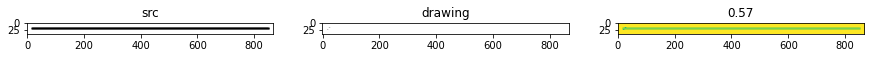

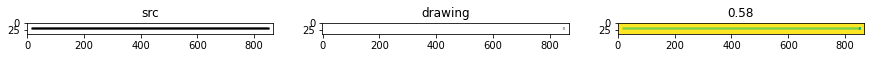

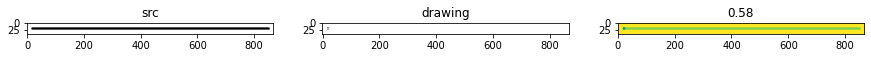

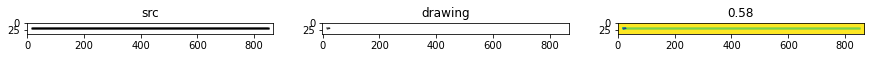

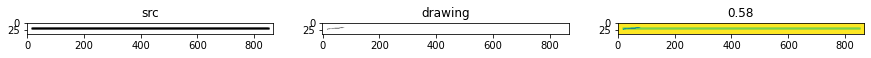

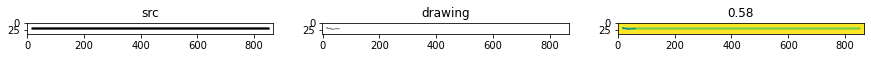

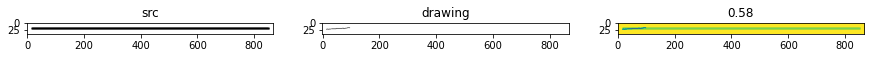

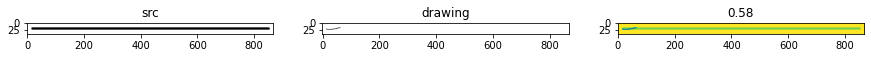

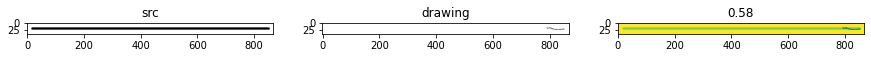

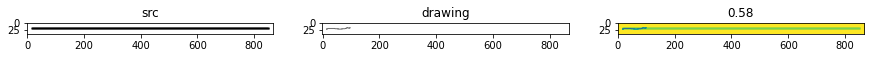

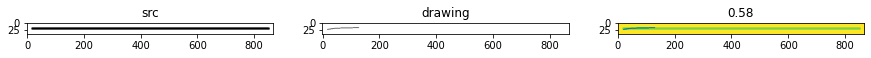

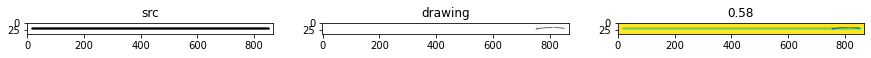

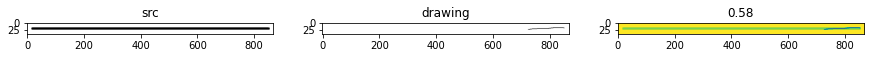

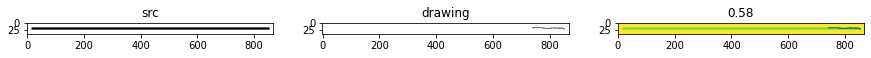


DRAWING_0_LINE.jpg:



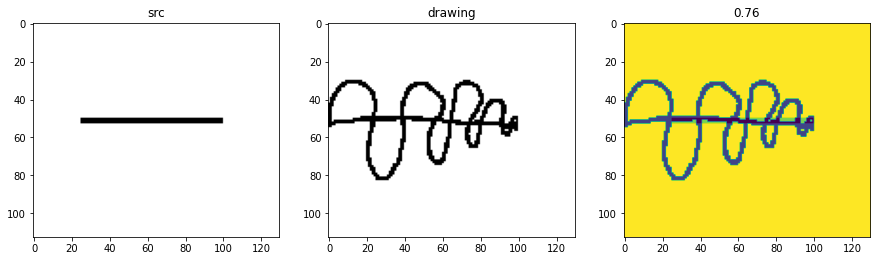

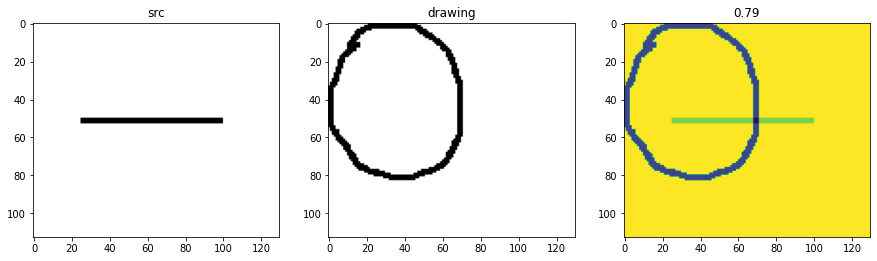

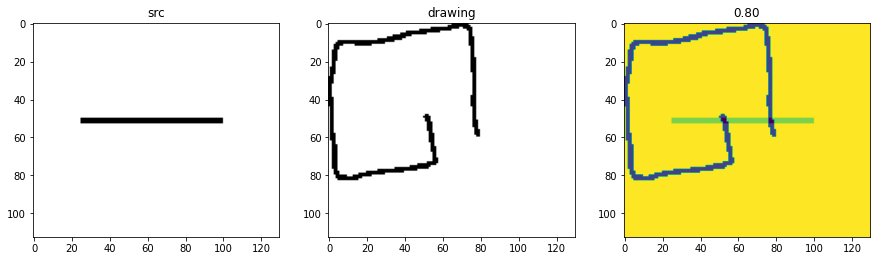

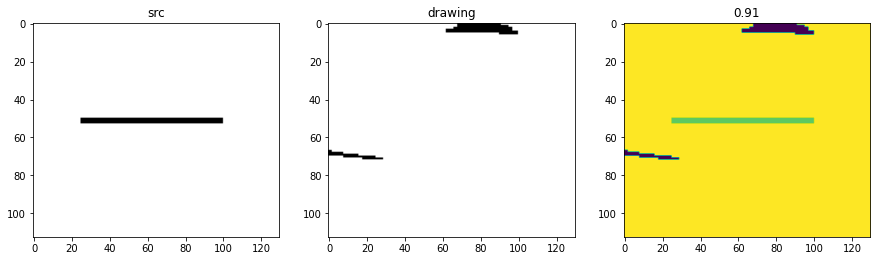

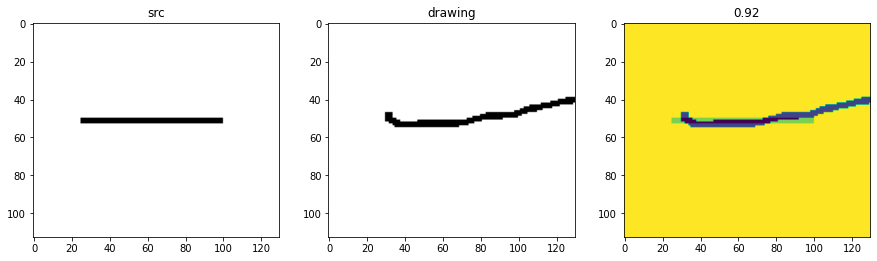

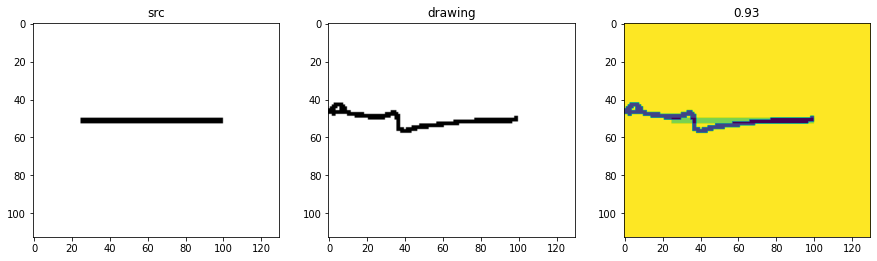

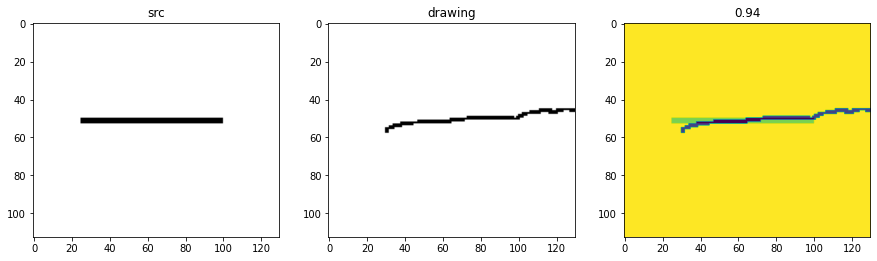

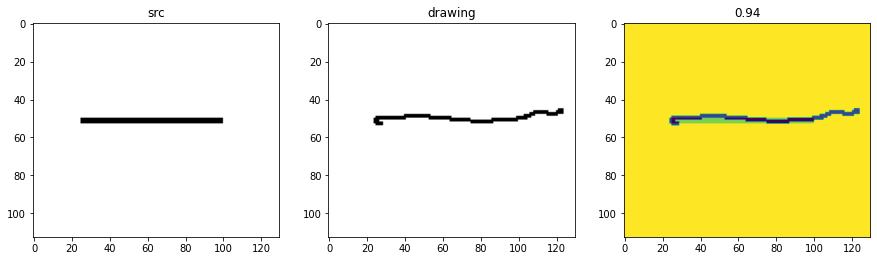

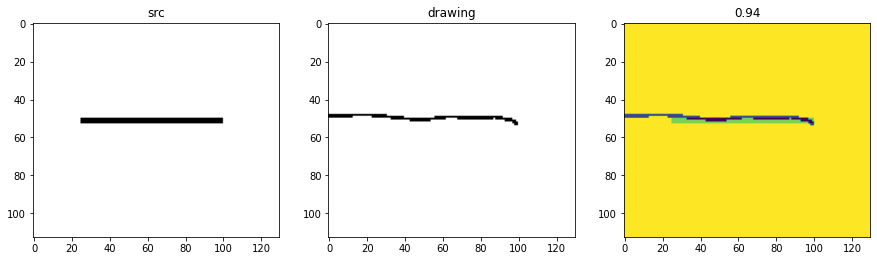

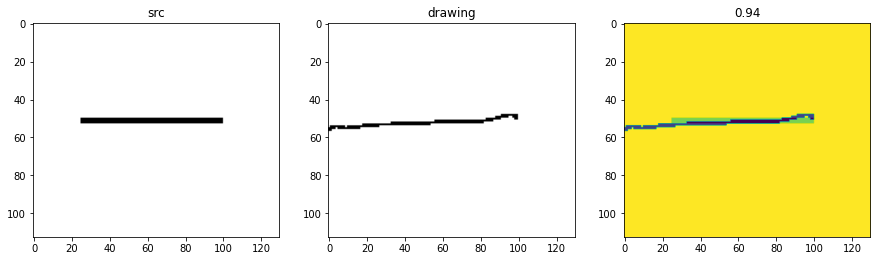

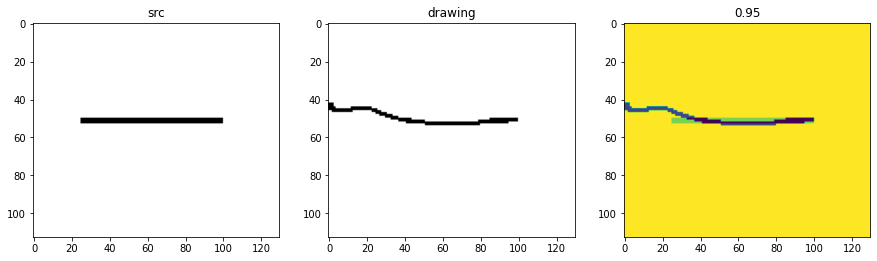

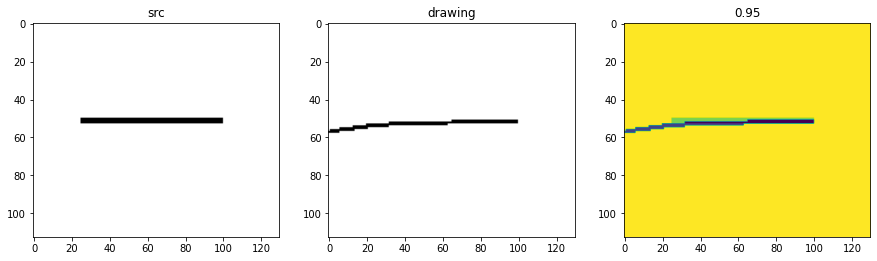

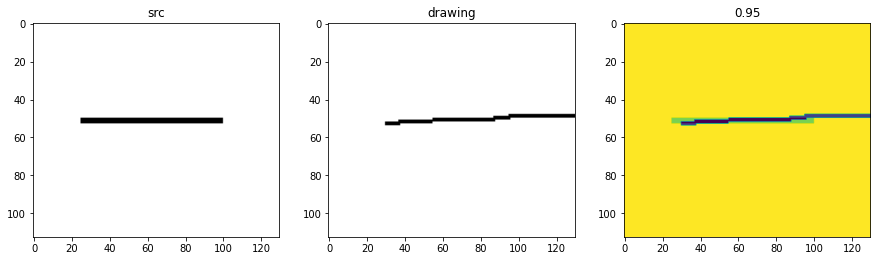

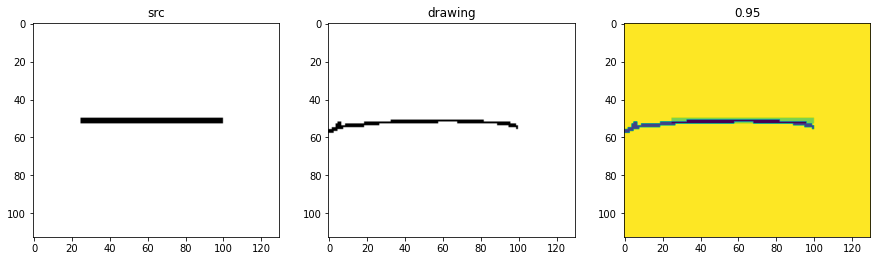


DRAWING_1_CIRCLE.jpg:



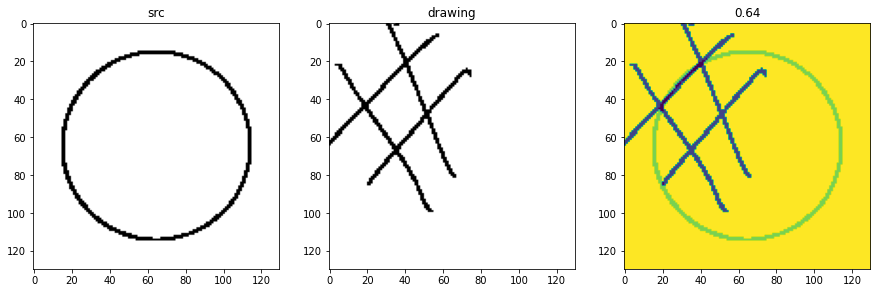

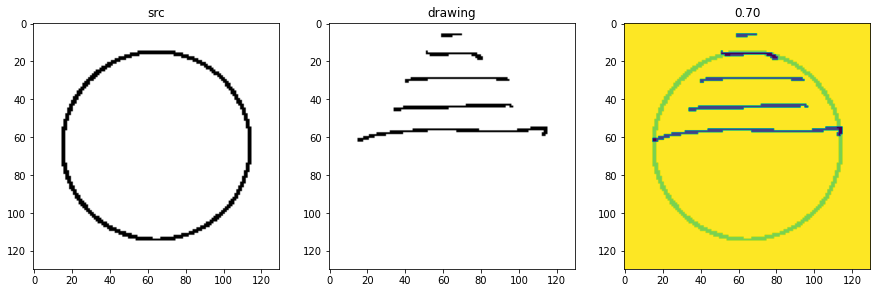

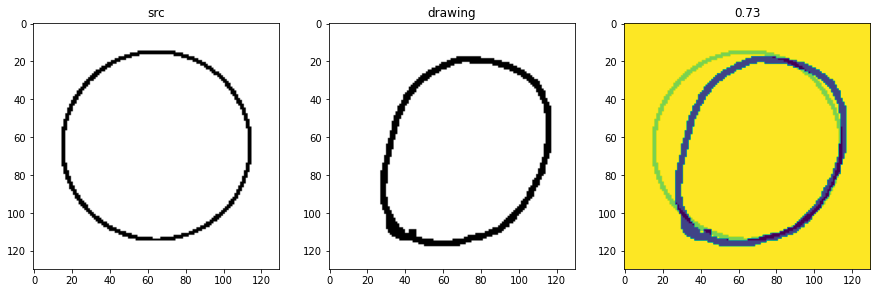

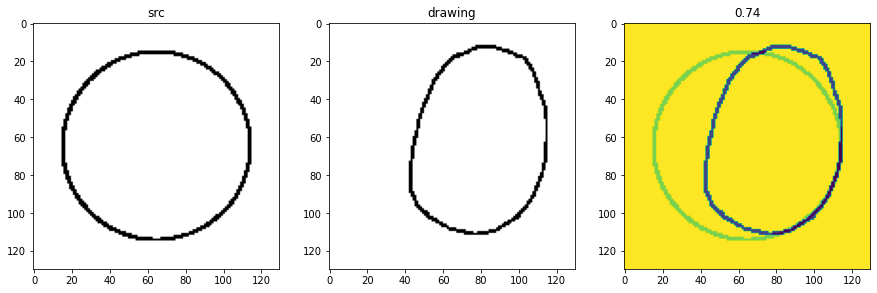

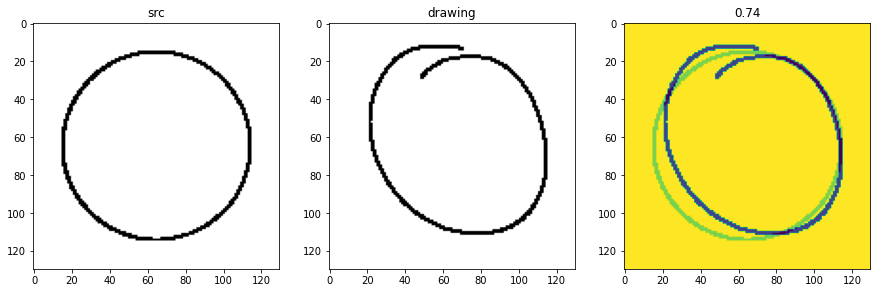

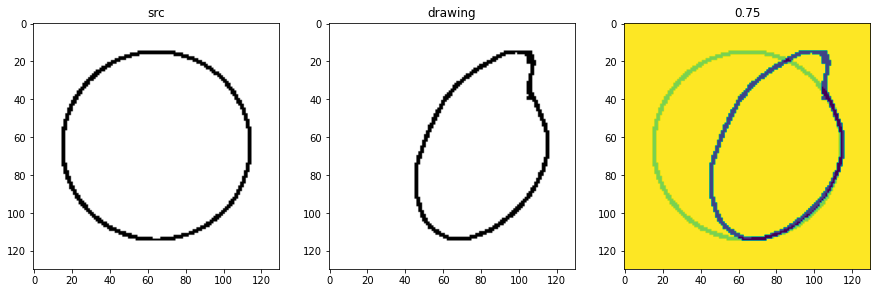

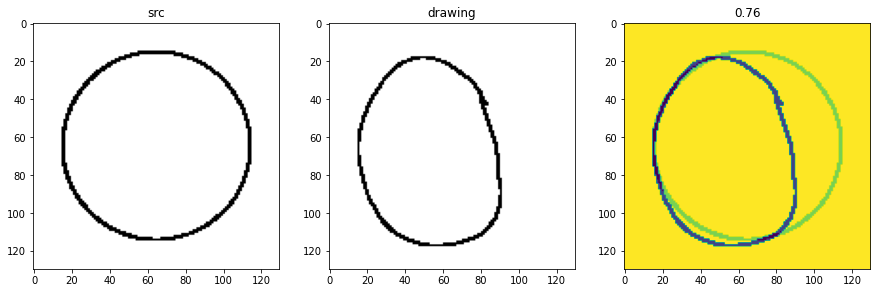

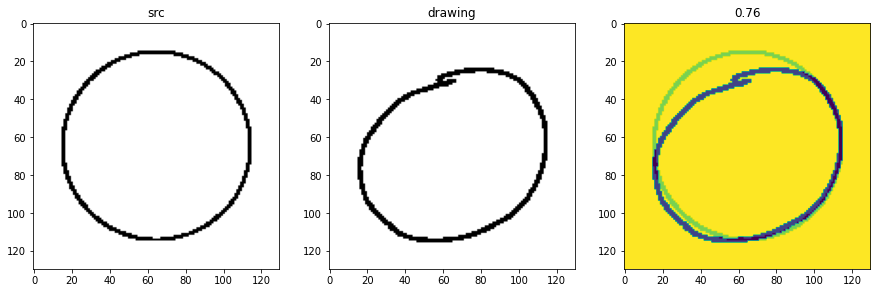

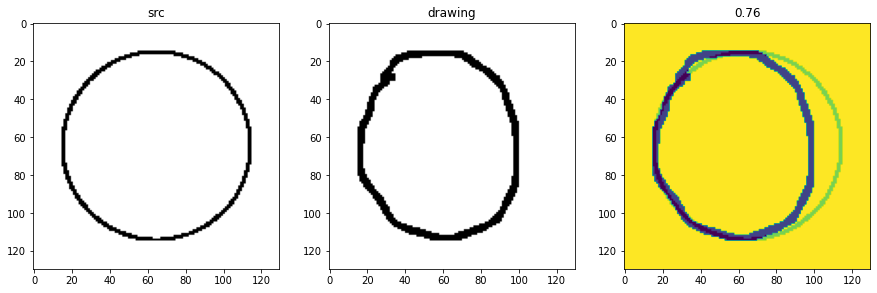

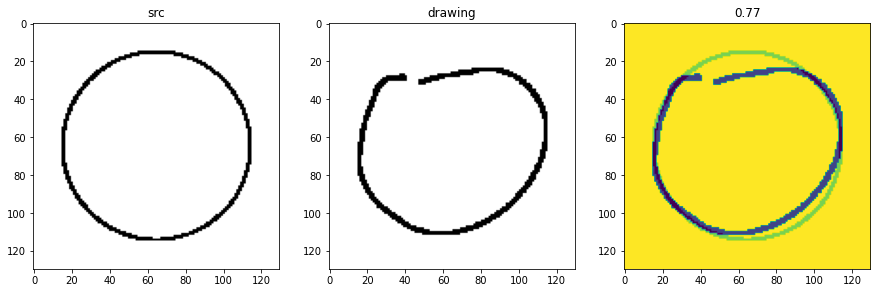

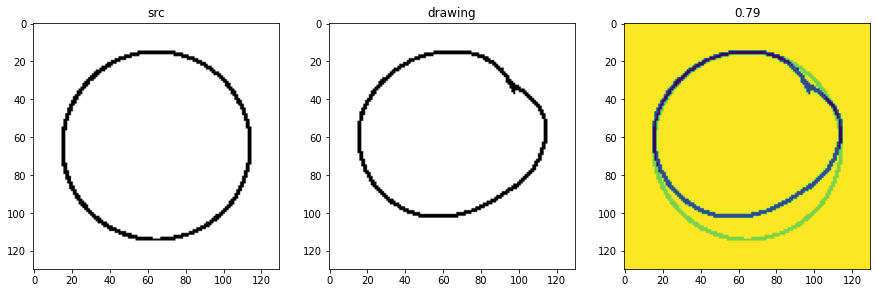

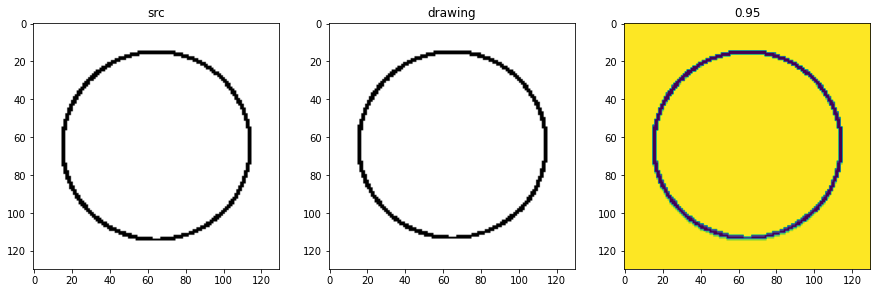


DRAWING_2_TRIANGLE.jpg:



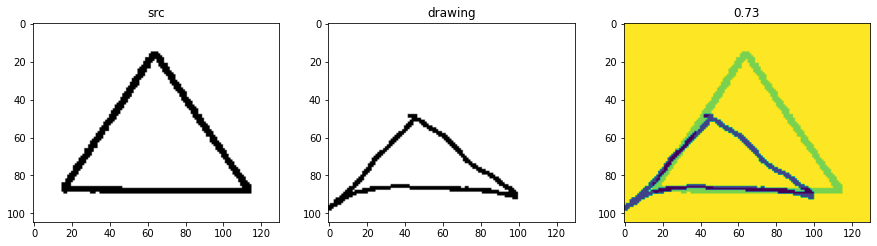

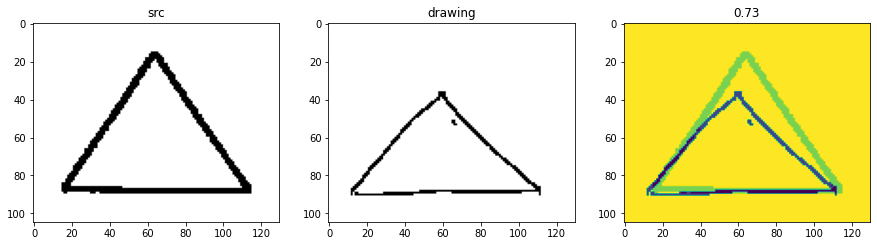

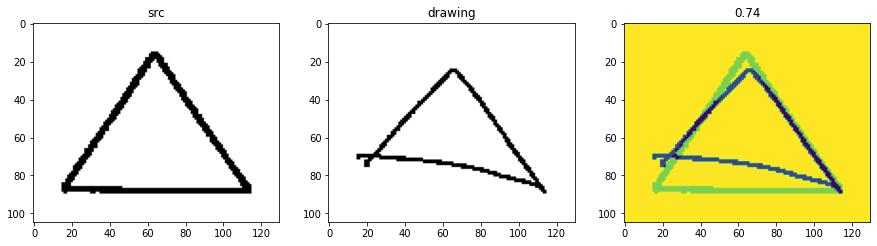

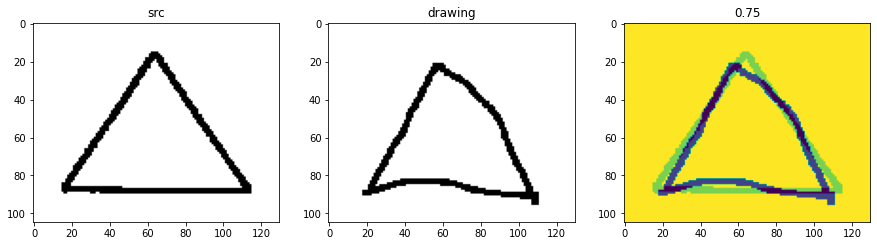

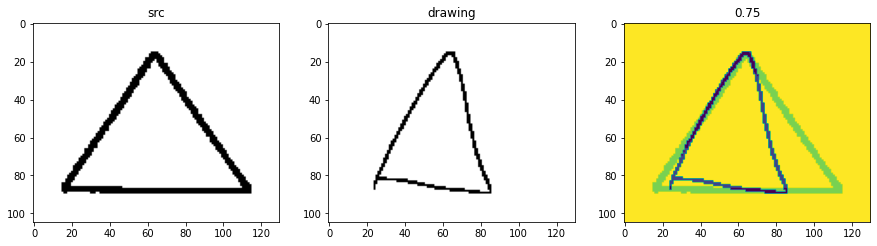

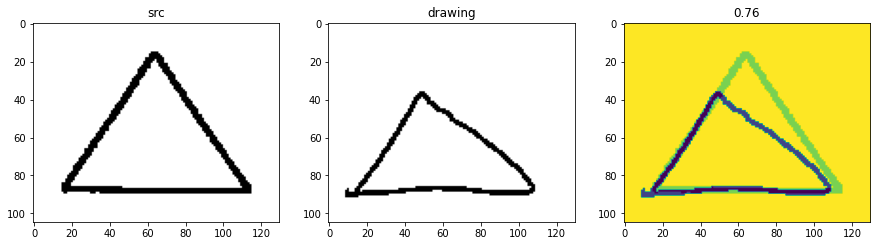

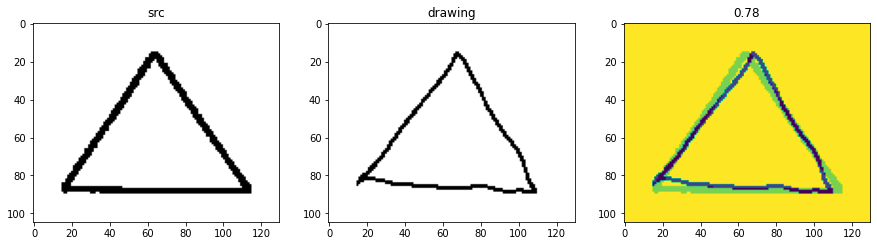

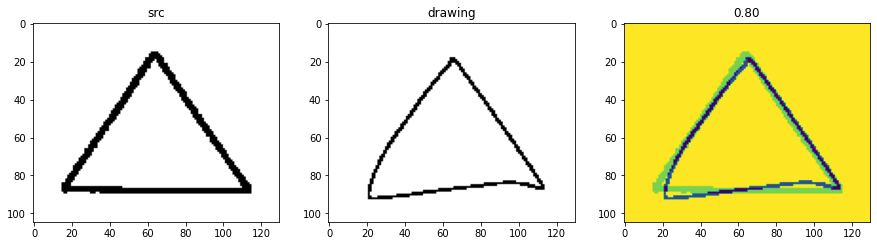

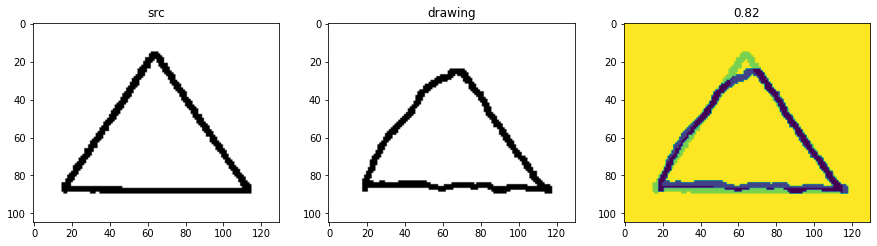


DRAWING_3.jpg:



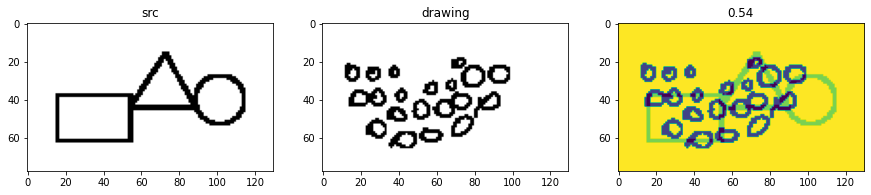

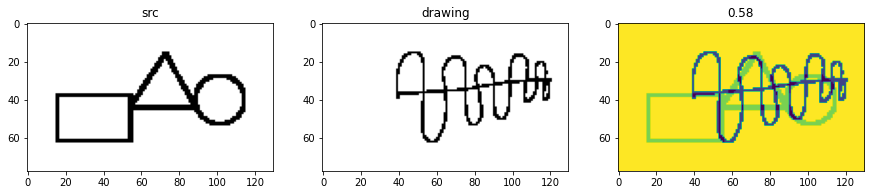

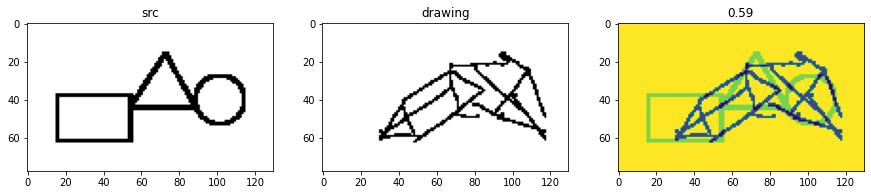

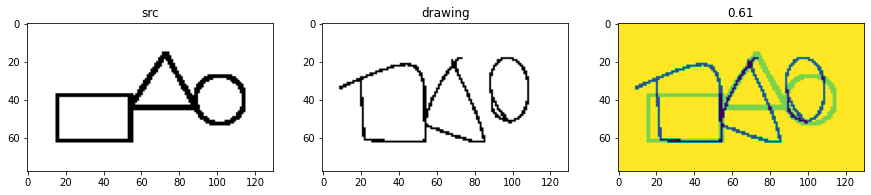

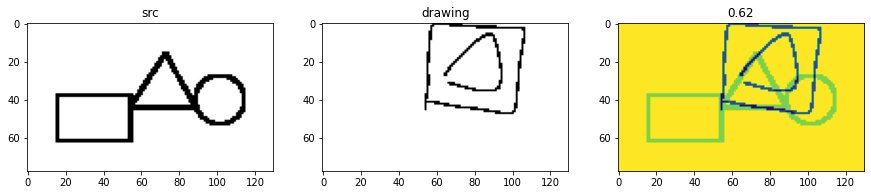

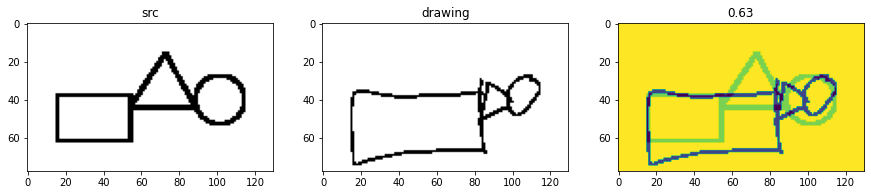

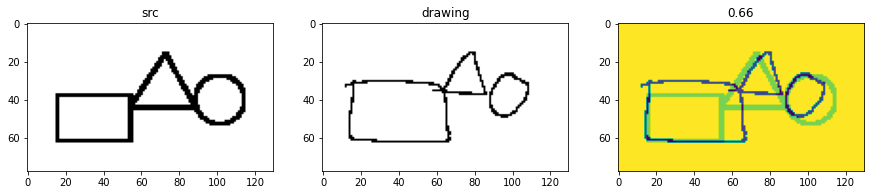

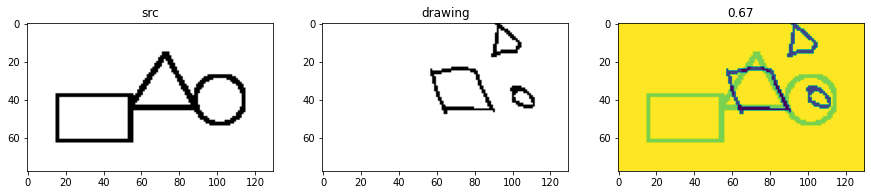

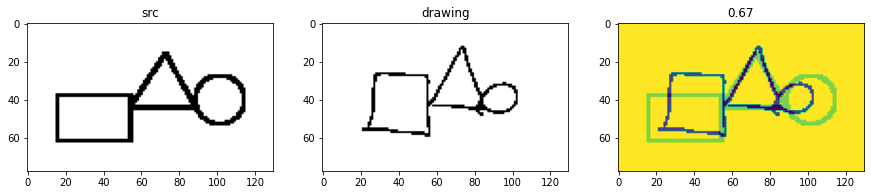

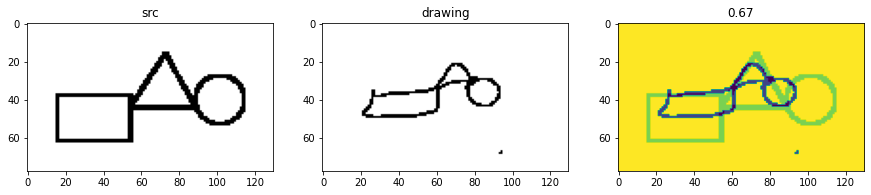

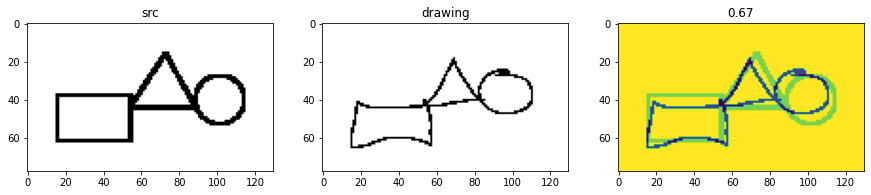

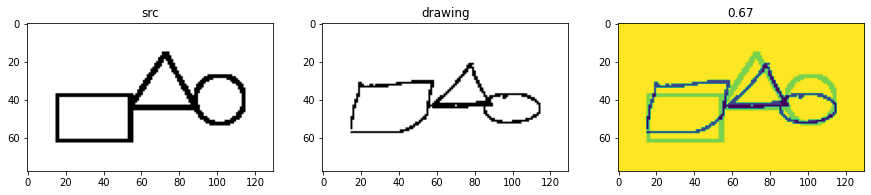

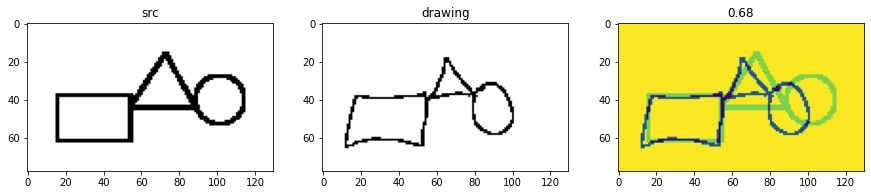

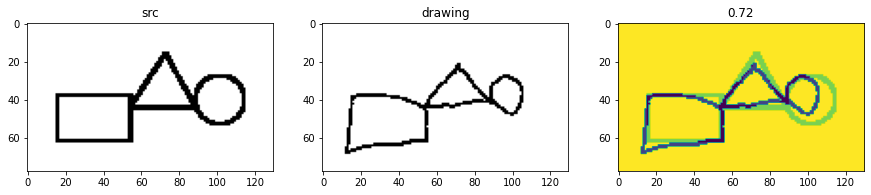


DRAWING_4.jpg:



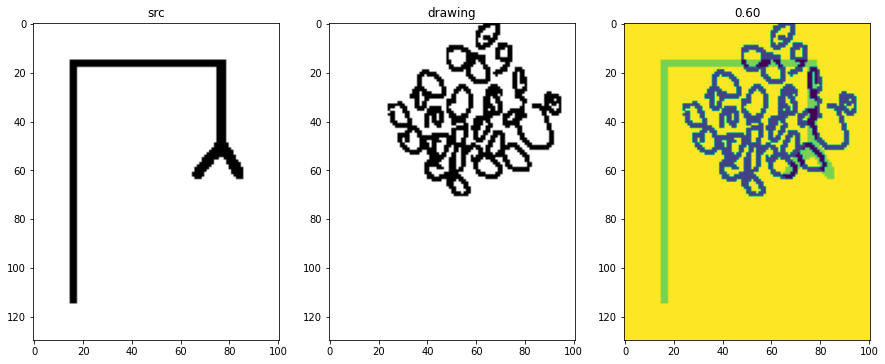

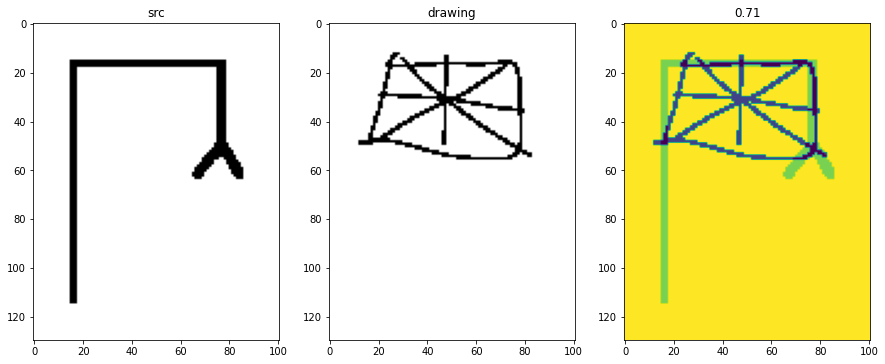

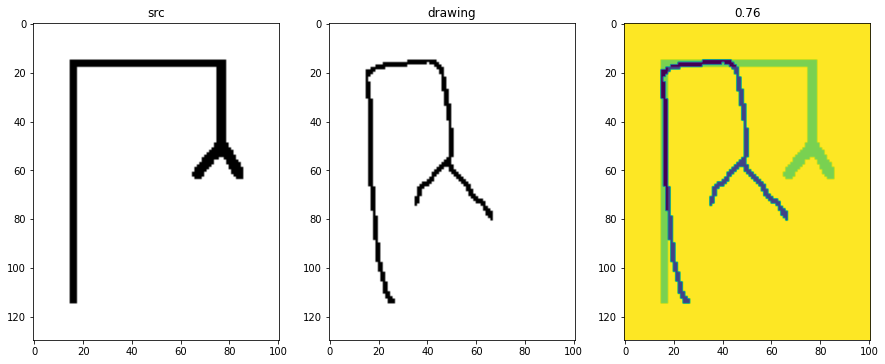

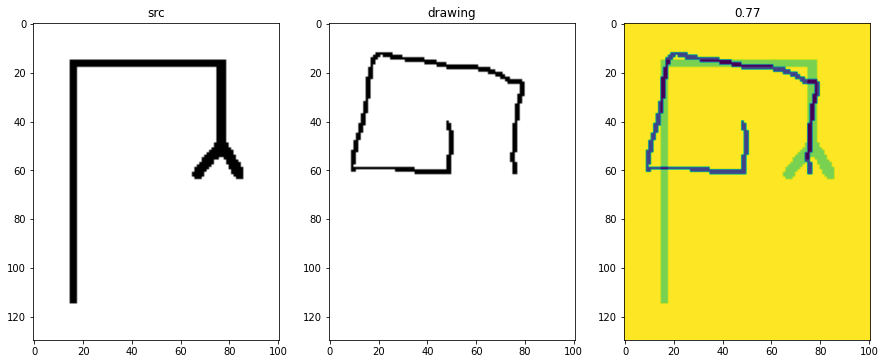

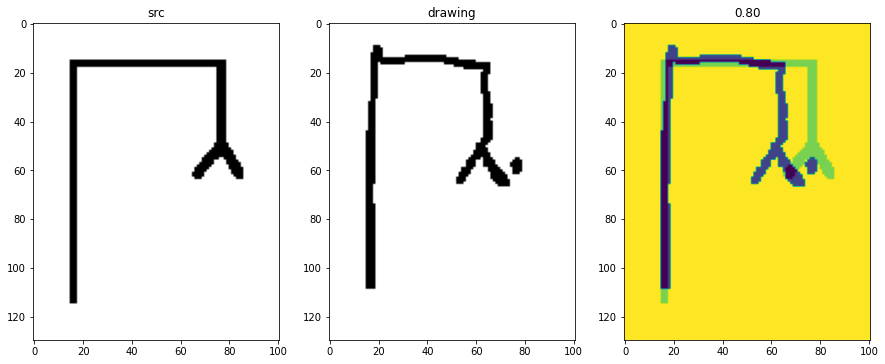

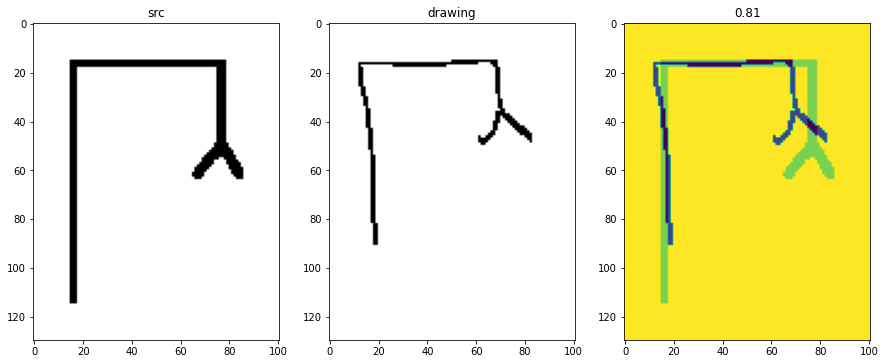

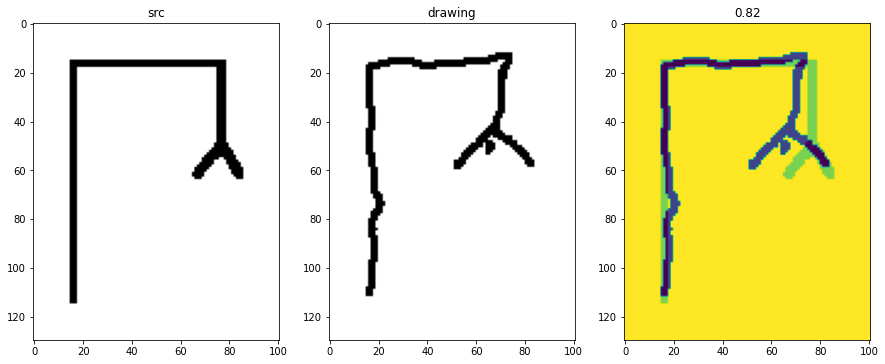

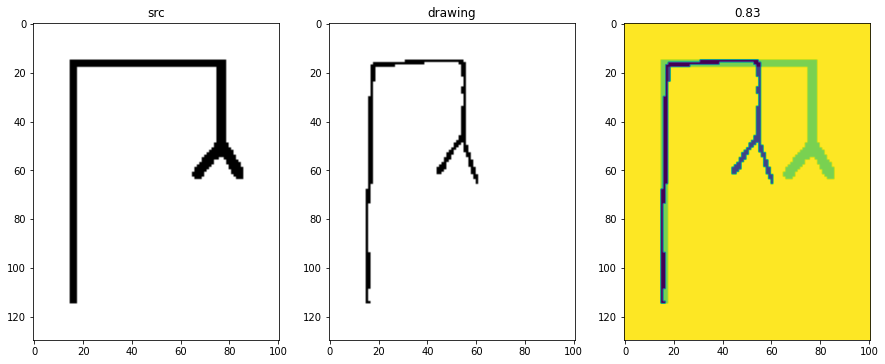

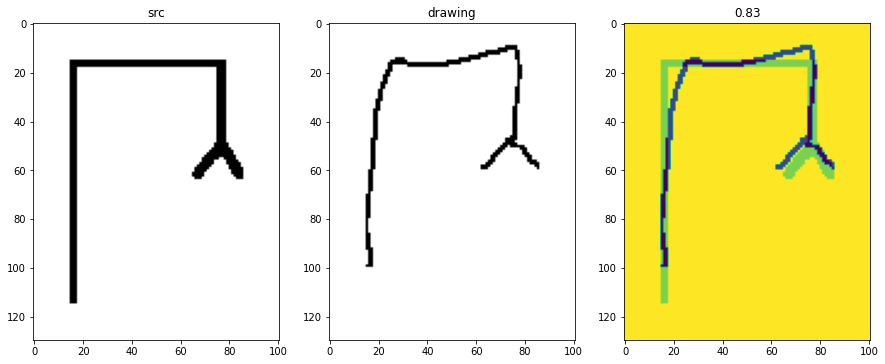

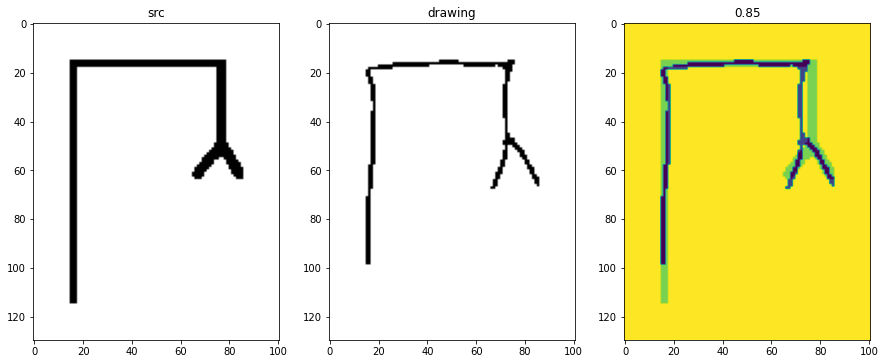


DRAWING_5.jpg:



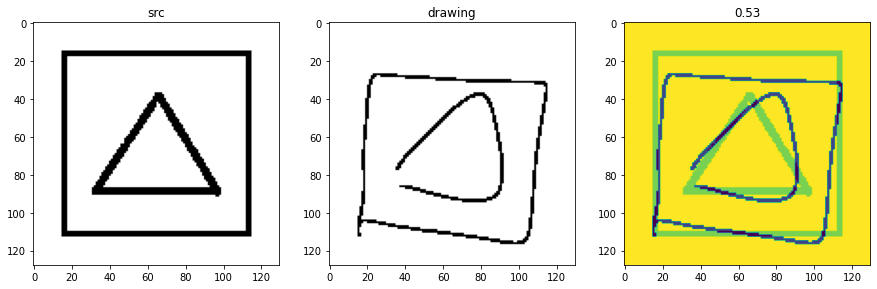

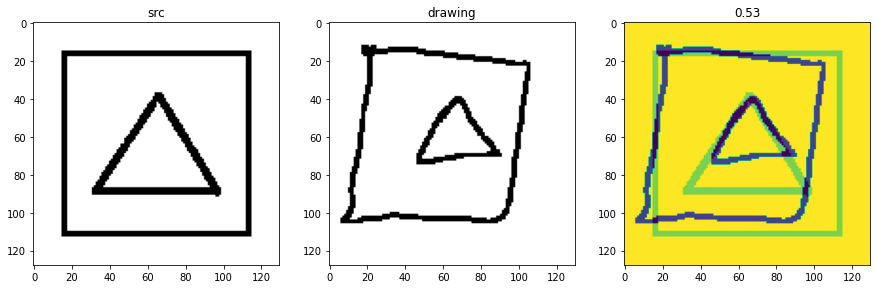

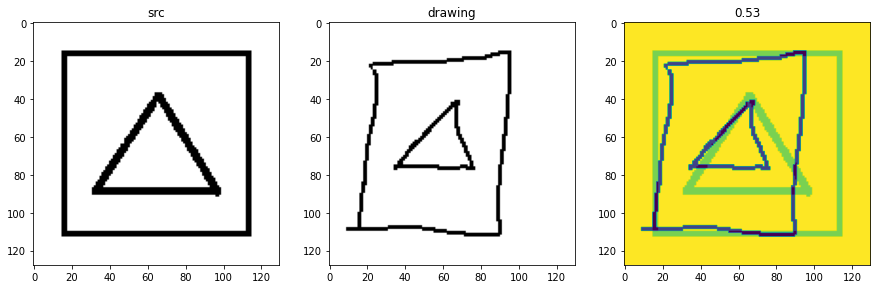

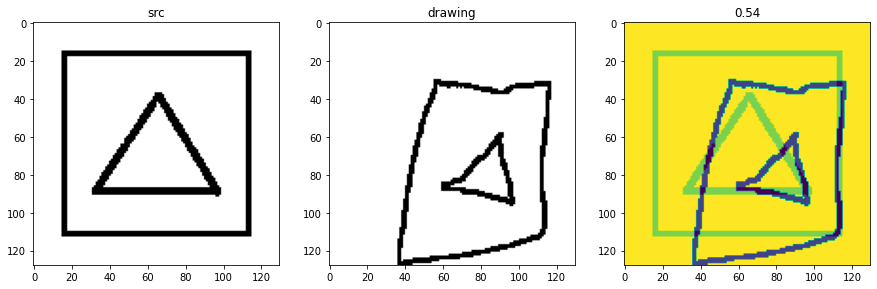

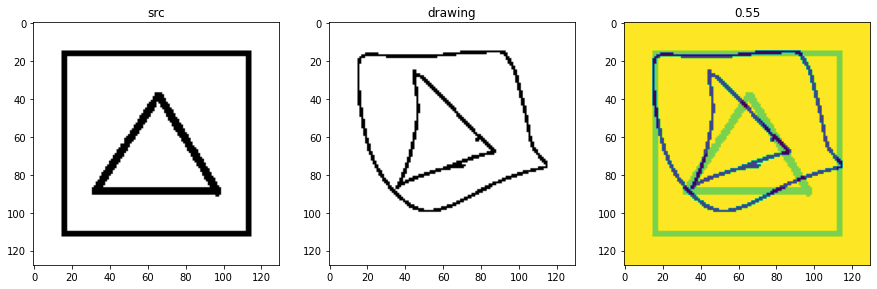

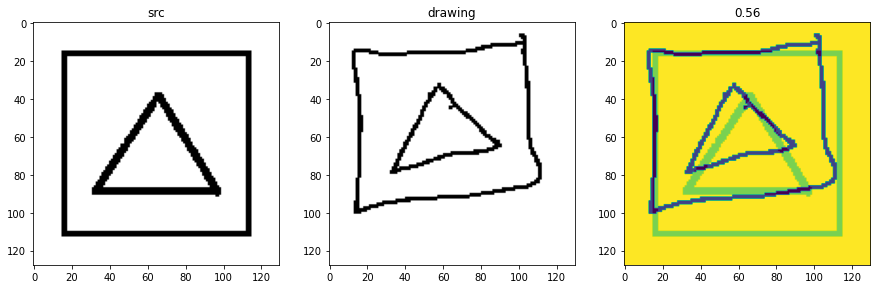

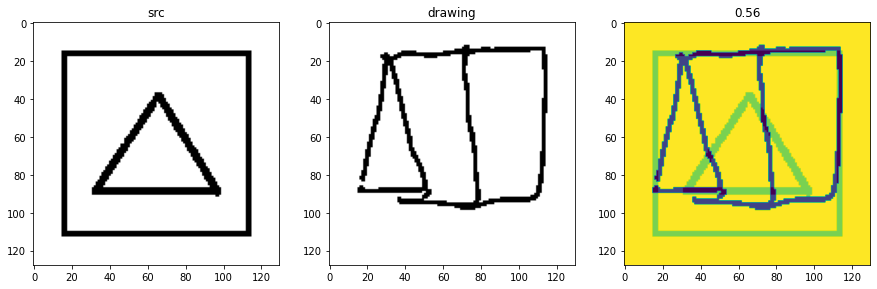

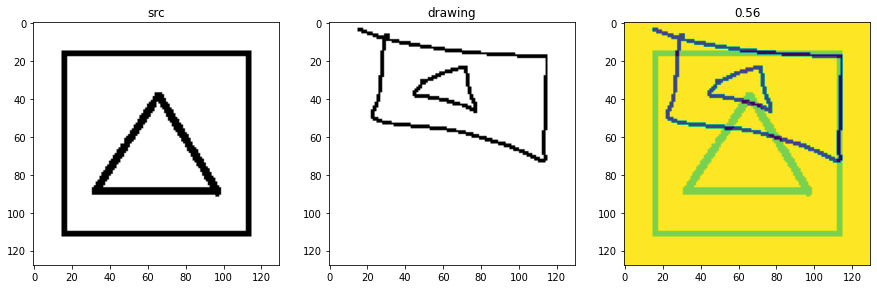

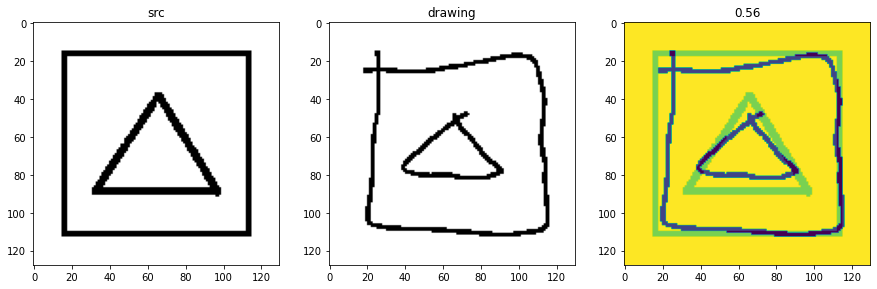

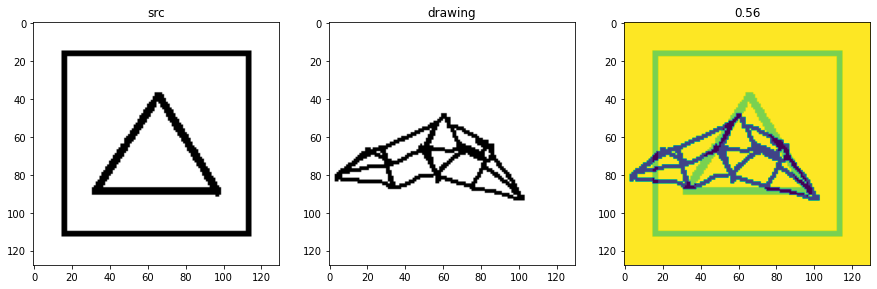

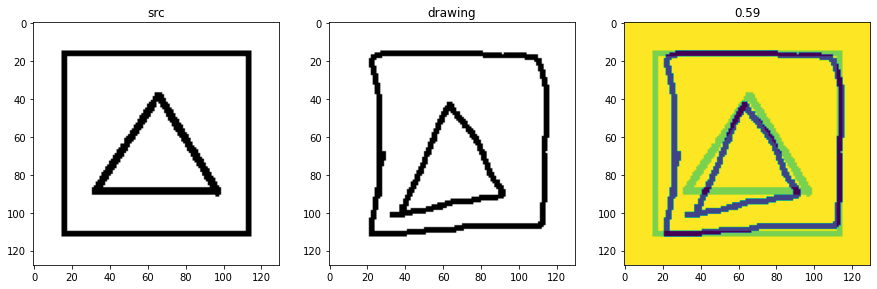

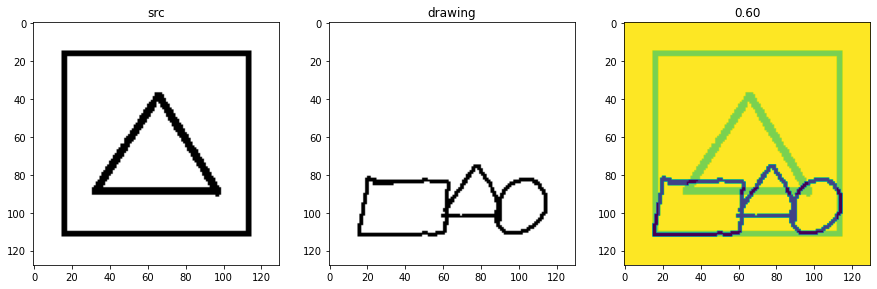

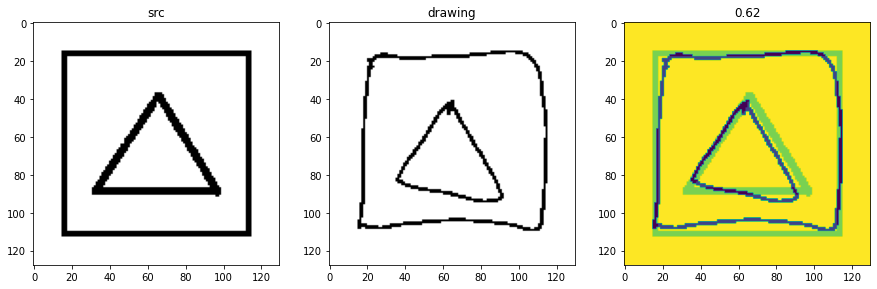

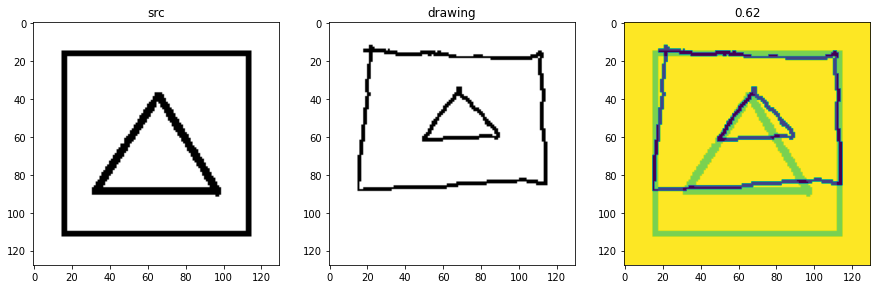

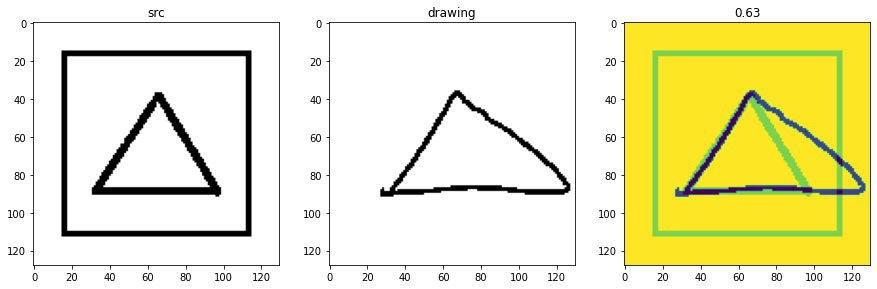

In [105]:

folder_path = r'C:\Users\idank\final_project\ShapeProject\GetSenseDataset\src'
base_parent_path = r'C:\Users\idank\final_project\ShapeProject\GetSenseDataset\drawing'

for filename in os.listdir(folder_path):
    print(f'\n{filename}:\n')
    if filename.endswith('.jpg') or filename.endswith('.png'):
        src_path = os.path.join(folder_path, filename)
        img = cv2.imread(src_path)
        img_name = os.path.splitext(filename)[0]
        parent_folder_path = os.path.join(base_parent_path, img_name)
        if os.path.isdir(parent_folder_path):
            
            drawing_list = []
            ssim_score_list = []            
            for img_filename in os.listdir(parent_folder_path):
                if img_filename.endswith('.jpg') or img_filename.endswith('.png'):
                    hand_draw_path = os.path.join(parent_folder_path, img_filename)
                    src_img_obj_padd, best_ssim, best_padding, best_hand_copy_img_obj_resized_ratio_padd = new_ssim(src_img_path=src_path, hand_copy_img_path=hand_draw_path, width_jump=3, height_jump=3, CONSTANT_PADDING=15)
                    drawing_list.append(best_hand_copy_img_obj_resized_ratio_padd)
                    ssim_score_list.append(best_ssim)

            ssims_and_drawings = [[y,x] for y,x in sorted(zip(ssim_score_list, drawing_list))]
            for ssim_and_drawing in ssims_and_drawings:
                
                ssim_score = ssim_and_drawing[0]
                drawing = ssim_and_drawing[1]
                
                f, axarr = plt.subplots(1,3, figsize=(15, 15))
                axarr[0].imshow(src_img_obj_padd, cmap='gray', vmin=0, vmax=255)
                axarr[0].title.set_text('src')
                axarr[1].imshow(drawing, cmap='gray', vmin=0, vmax=255)
                axarr[1].title.set_text('drawing')
                axarr[2].imshow(cv2.addWeighted(src_img_obj_padd,0.2,drawing,0.8,0))
                axarr[2].title.set_text("{:.2f}".format(ssim_score))
                plt.show()
                
        else:
            print(f"Folder '{img_name}' not found!")

### Idan's Metric:



DRAWING_0_1_LINE.jpg:



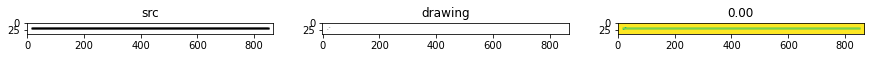

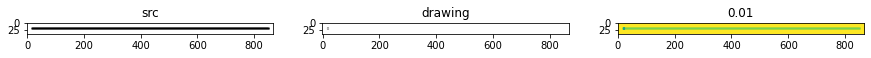

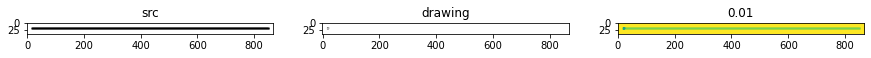

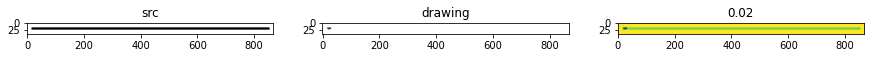

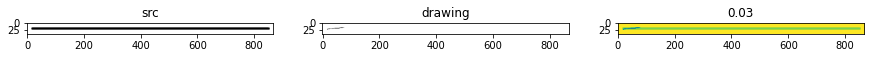

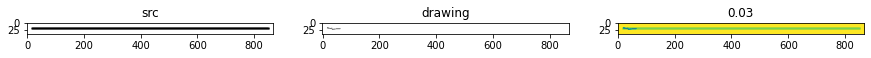

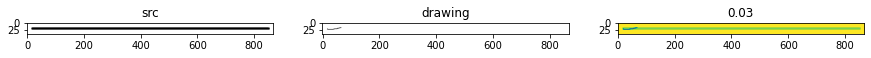

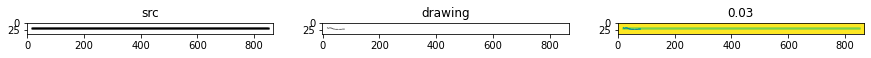

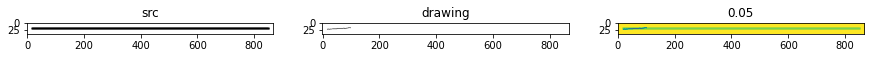

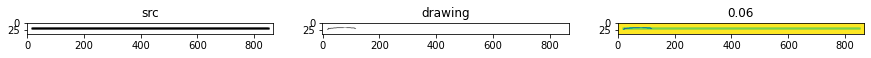

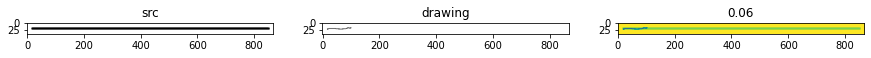

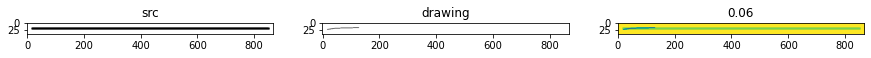

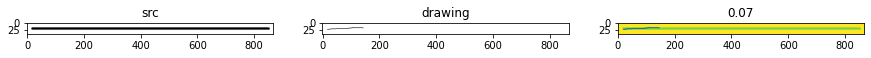

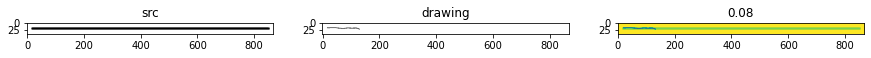


DRAWING_0_LINE.jpg:



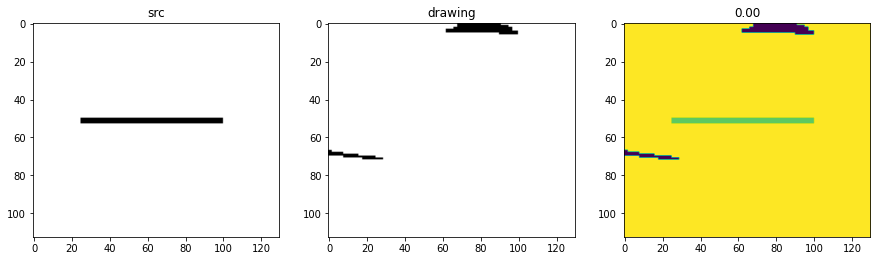

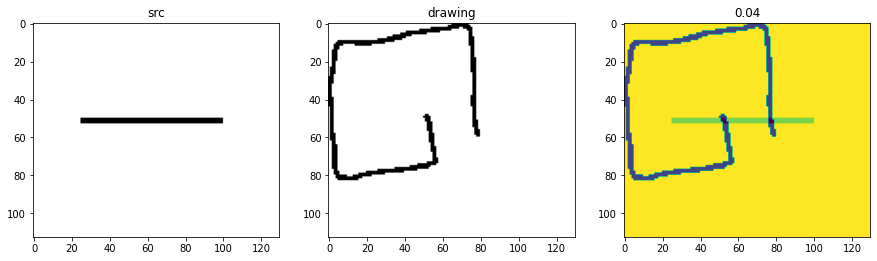

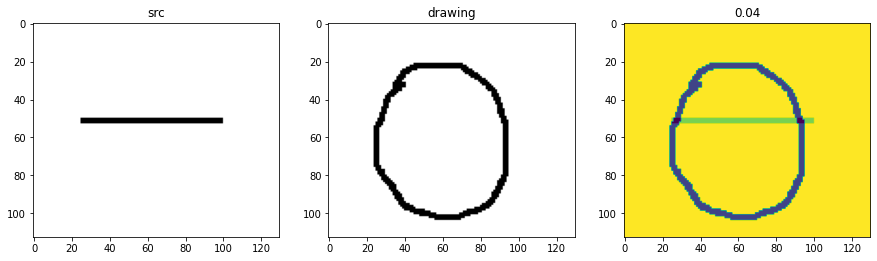

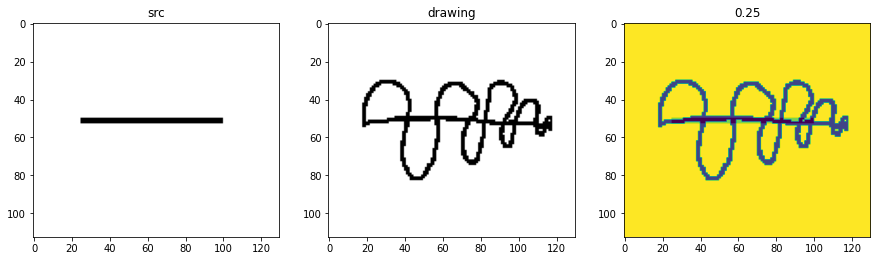

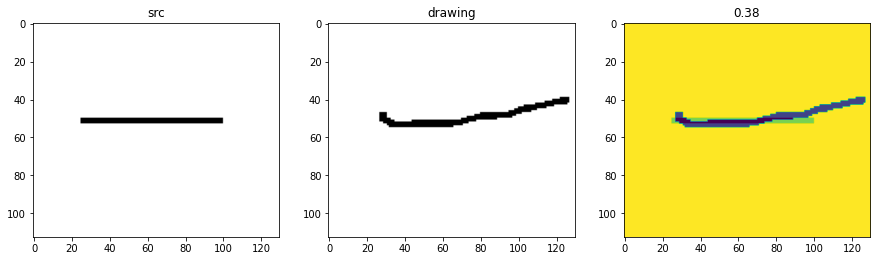

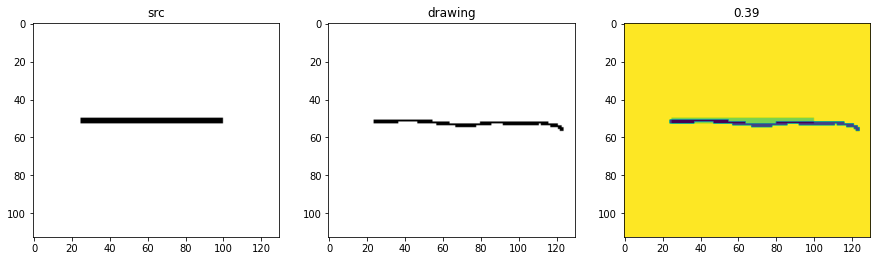

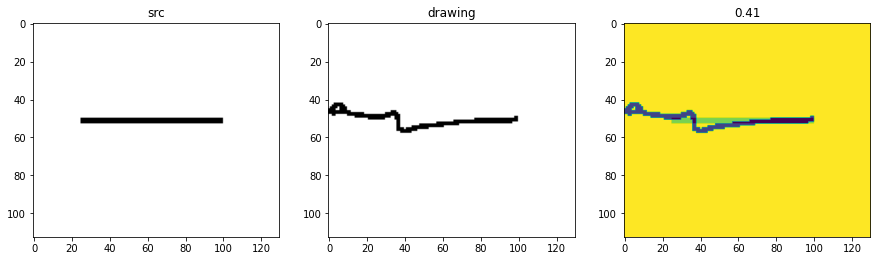

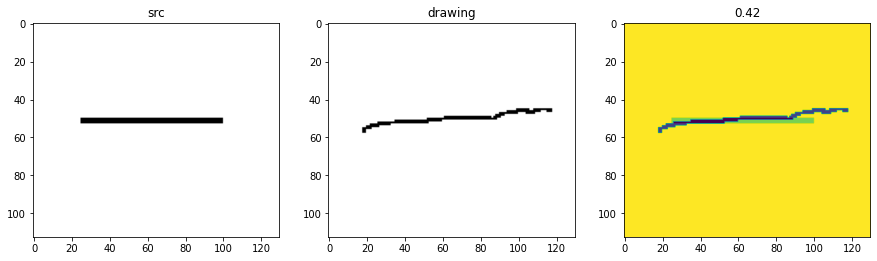

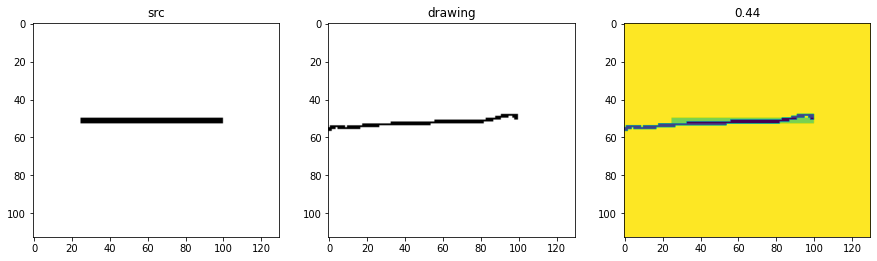

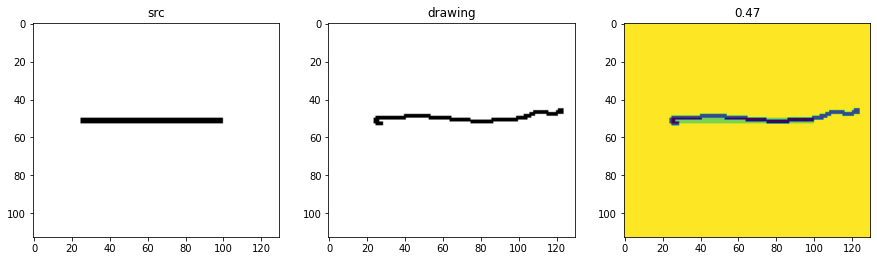

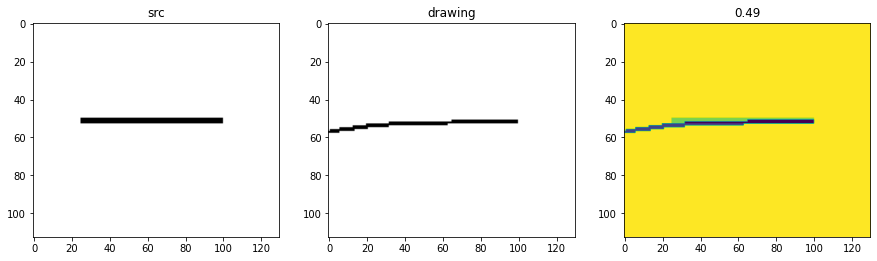

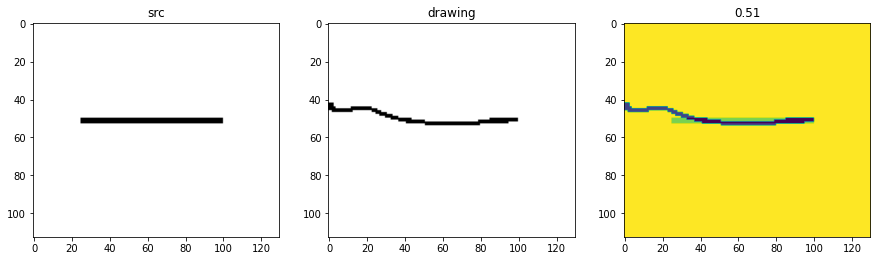

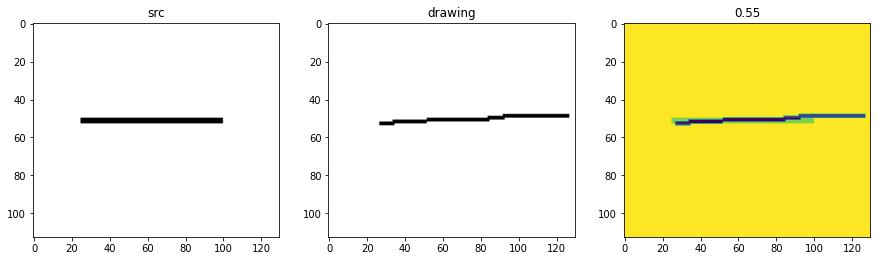

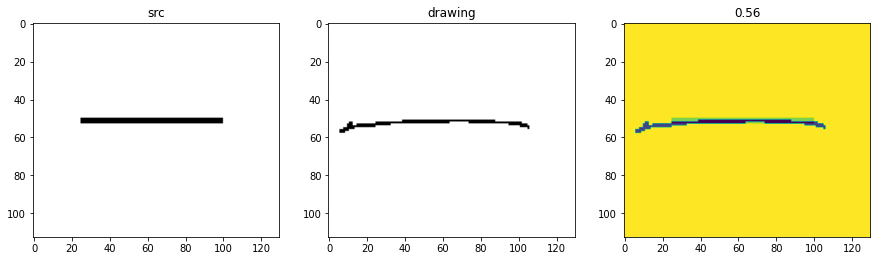


DRAWING_1_CIRCLE.jpg:



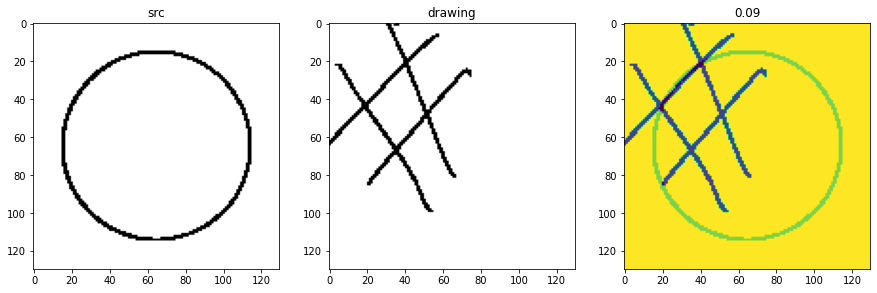

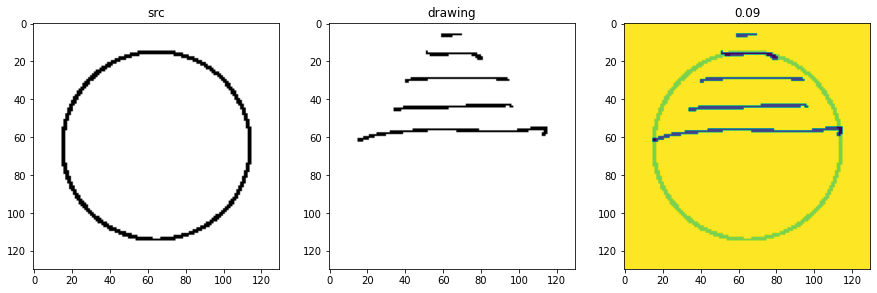

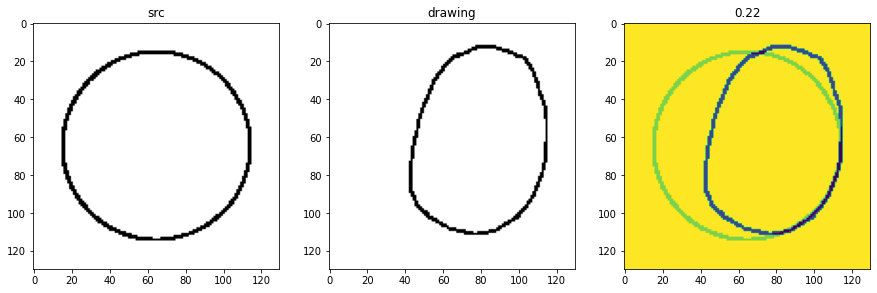

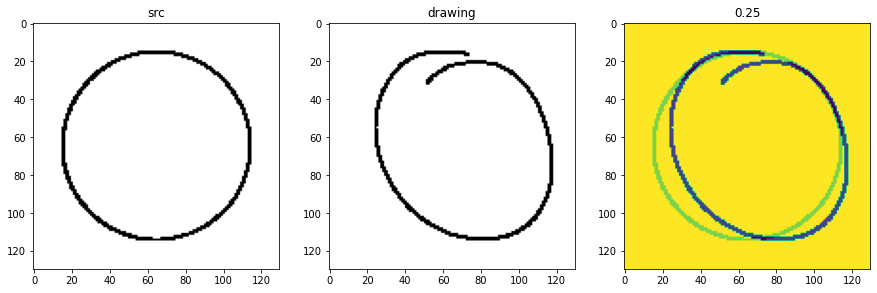

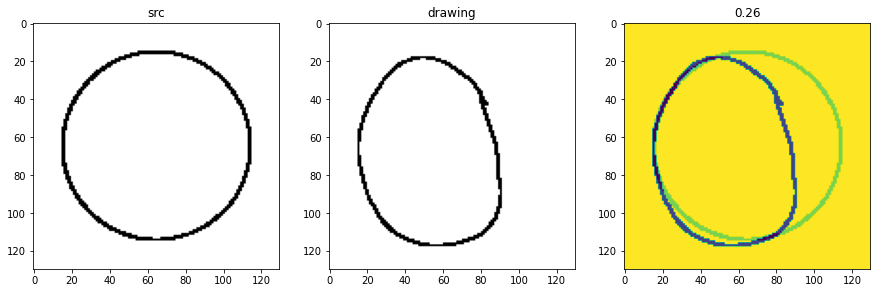

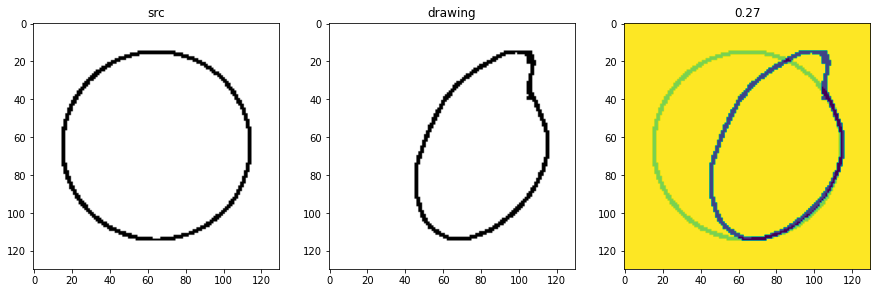

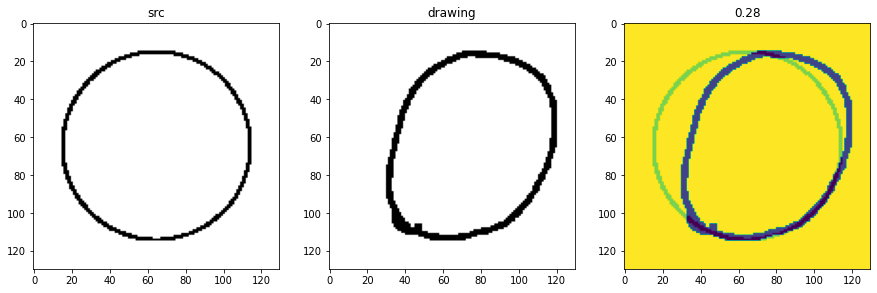

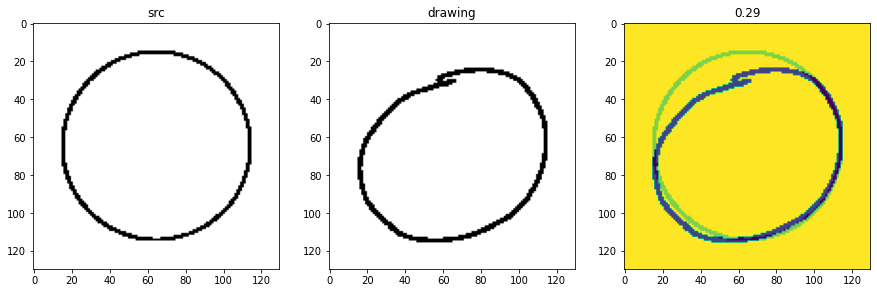

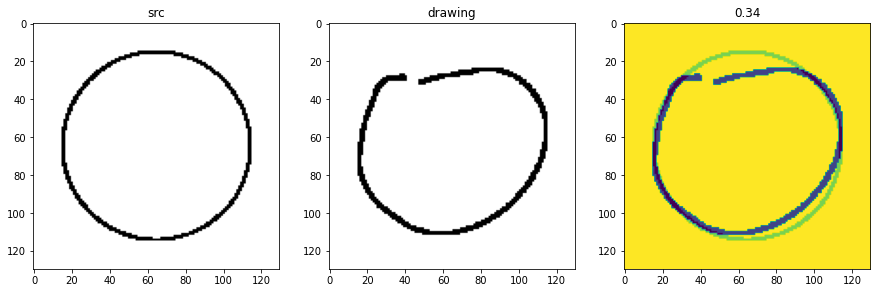

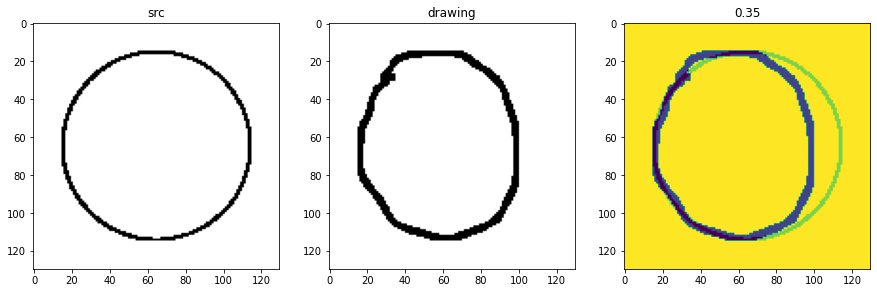

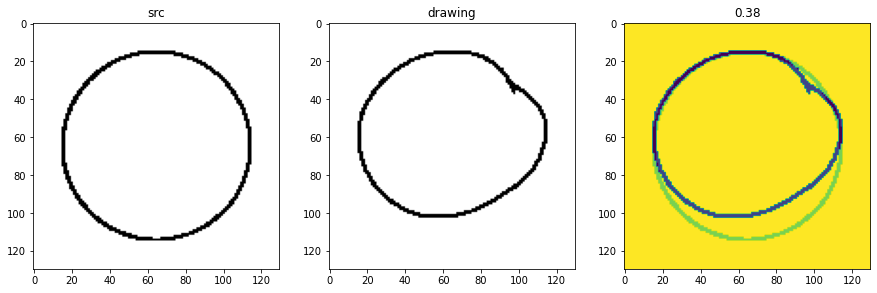

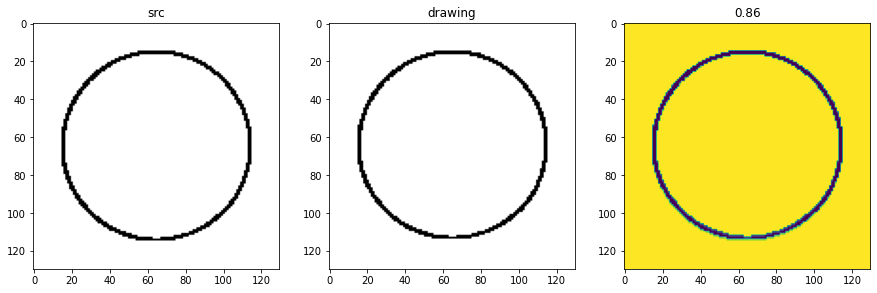


DRAWING_2_TRIANGLE.jpg:



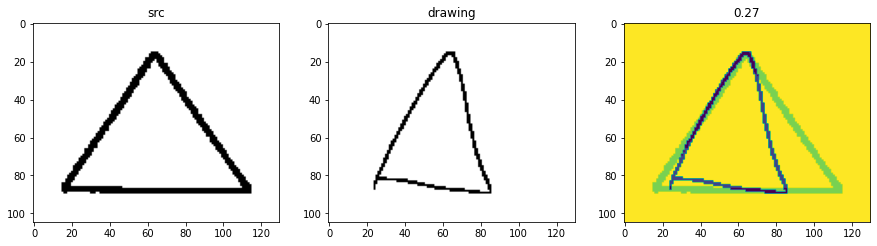

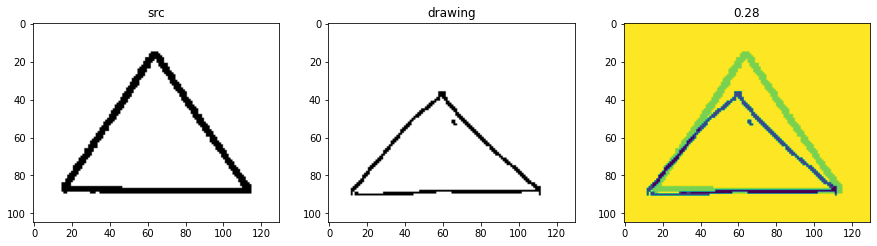

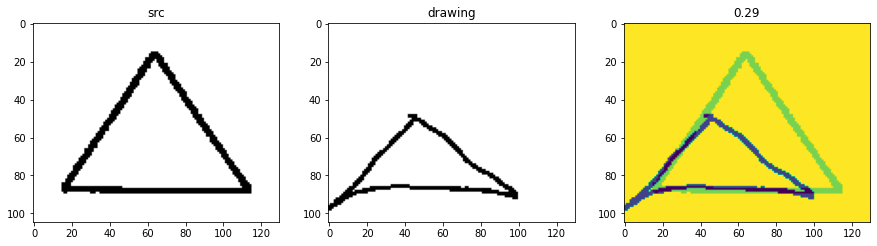

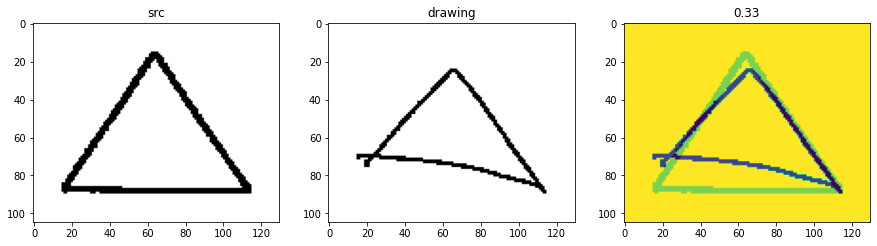

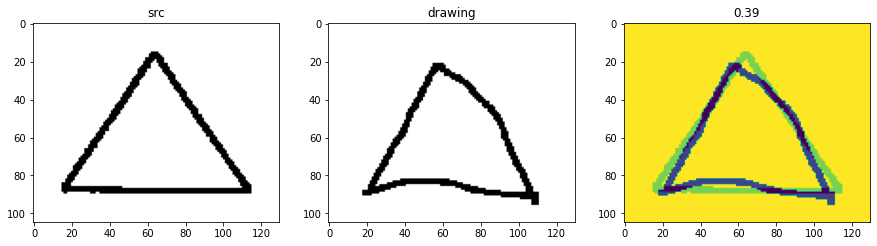

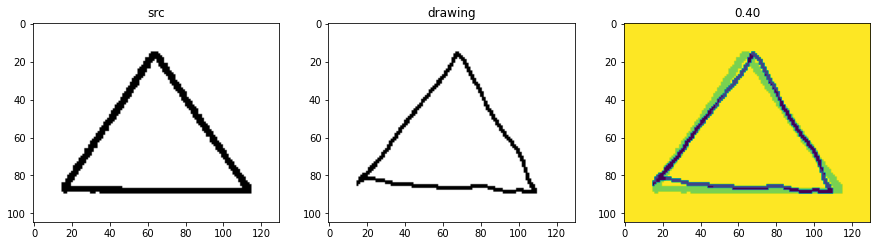

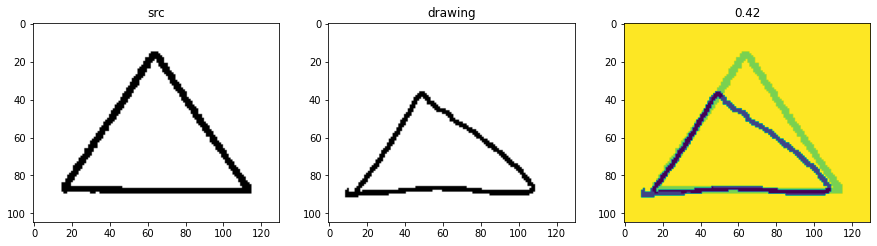

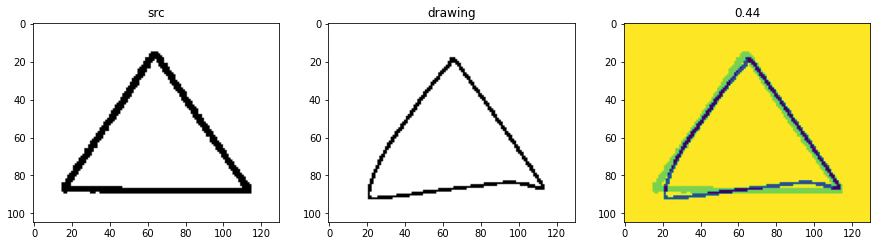

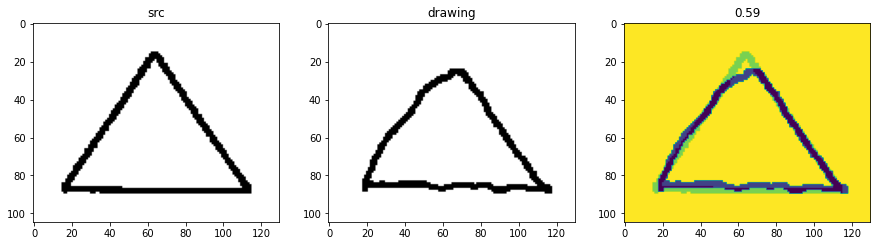


DRAWING_3.jpg:



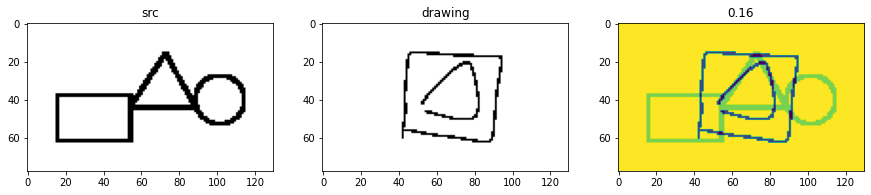

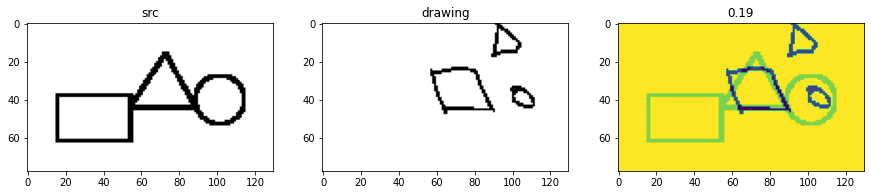

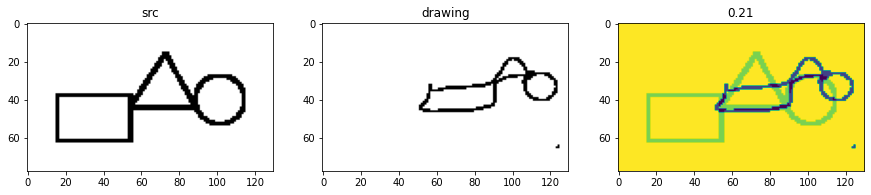

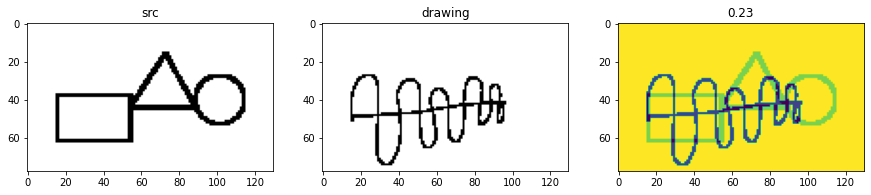

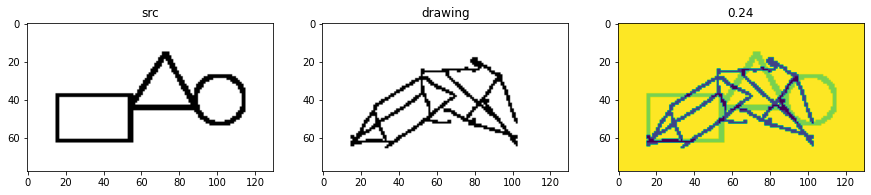

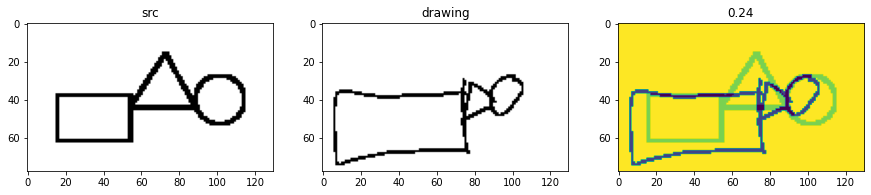

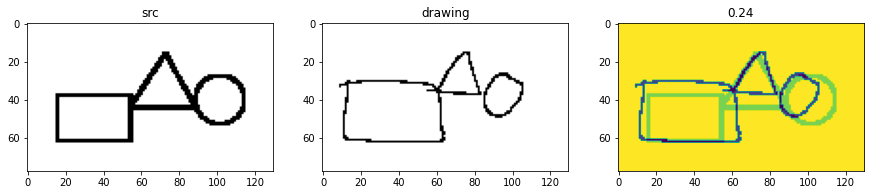

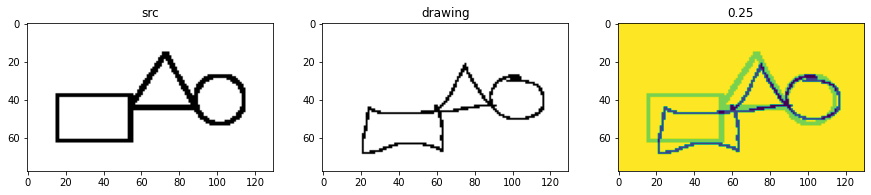

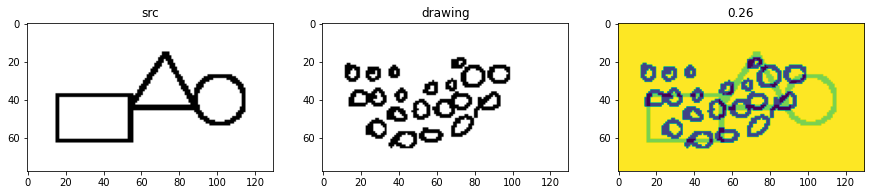

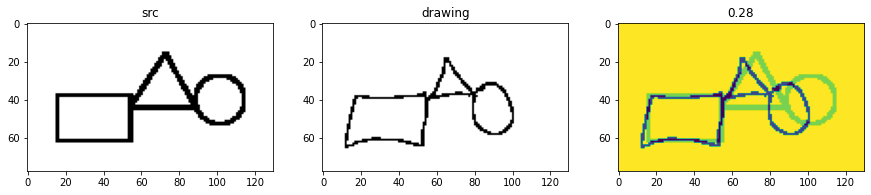

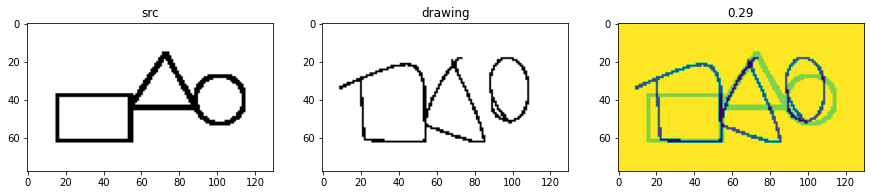

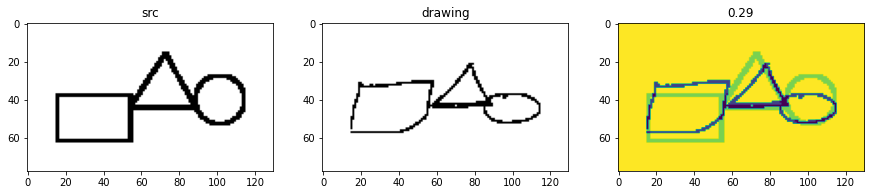

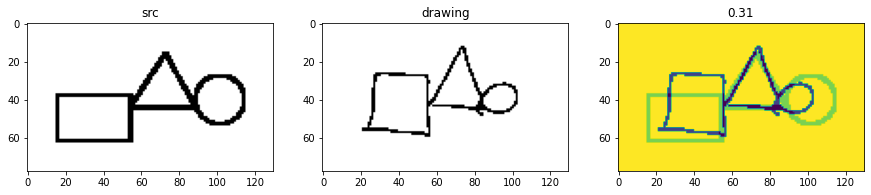

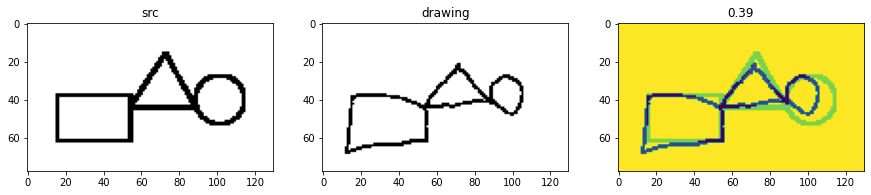


DRAWING_4.jpg:



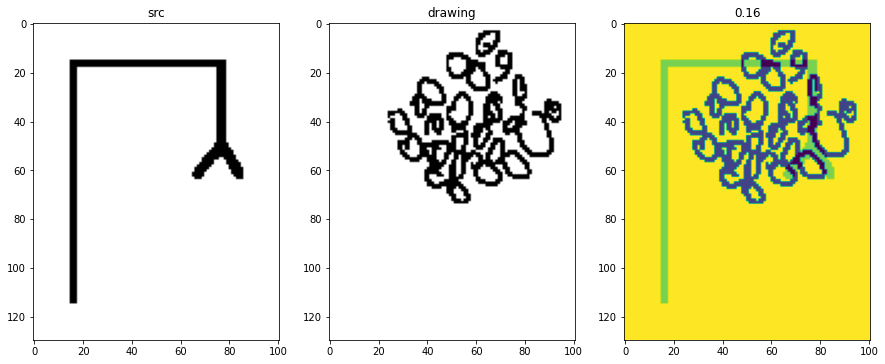

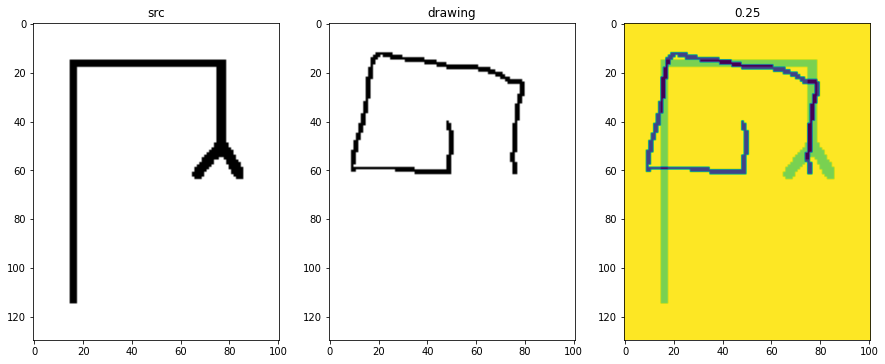

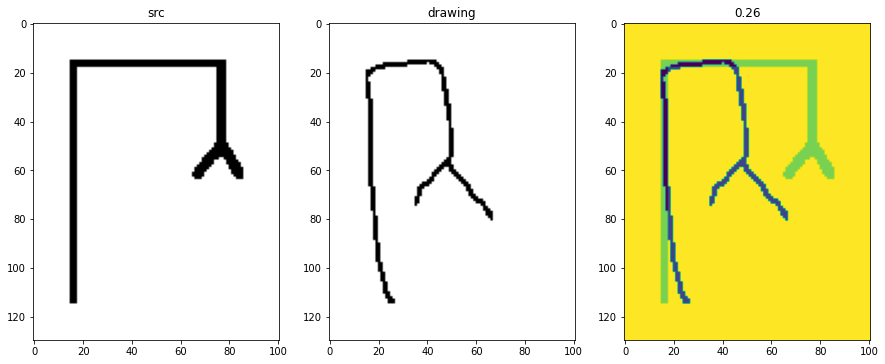

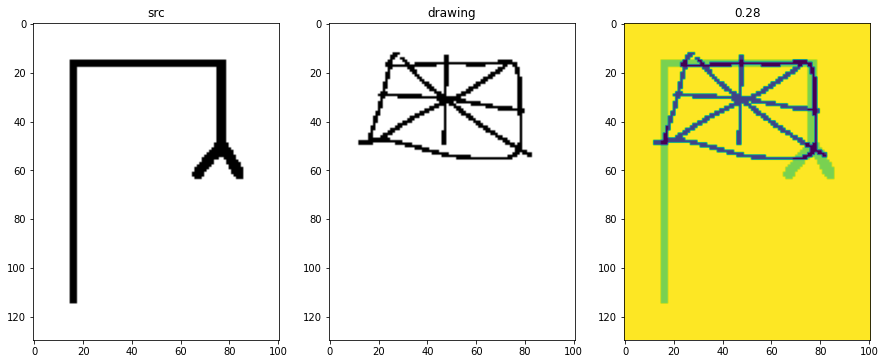

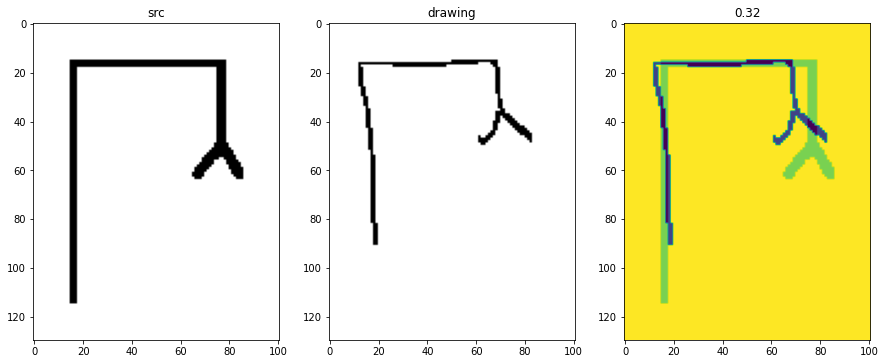

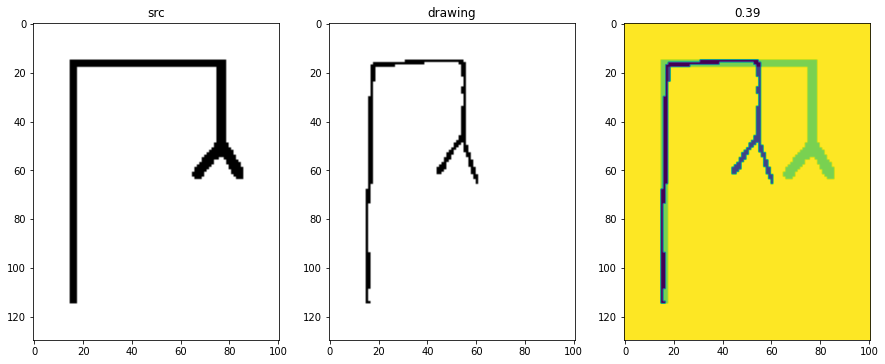

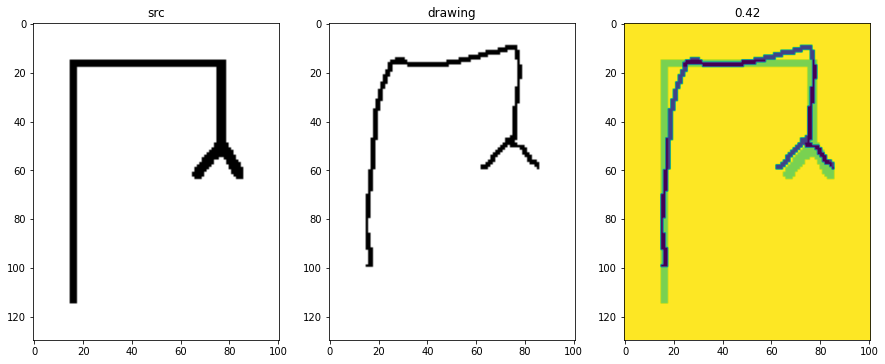

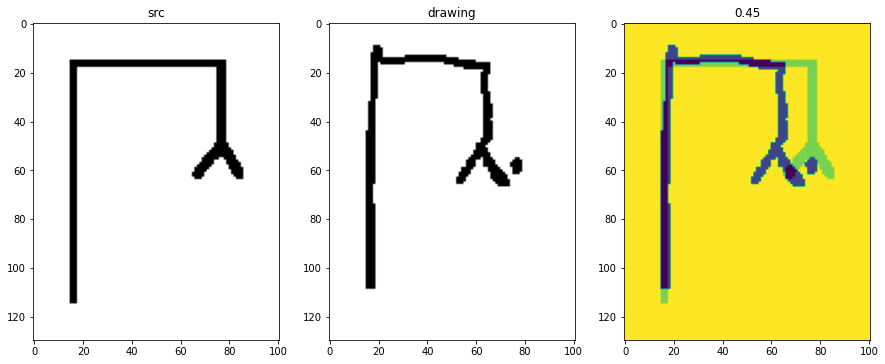

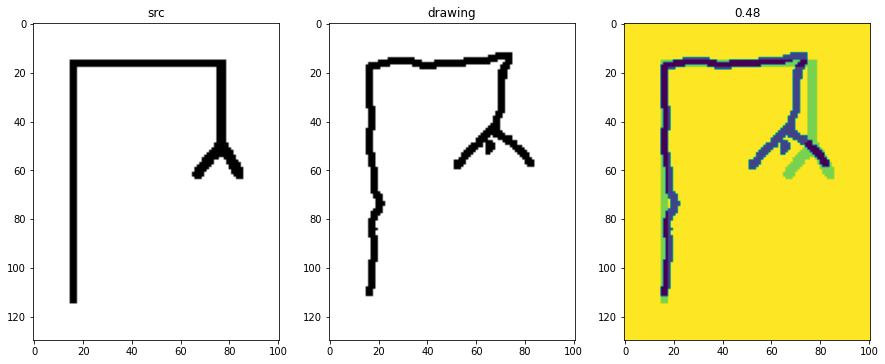

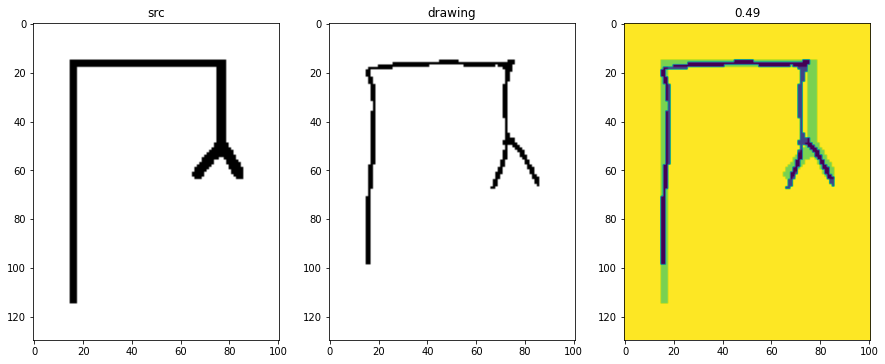


DRAWING_5.jpg:



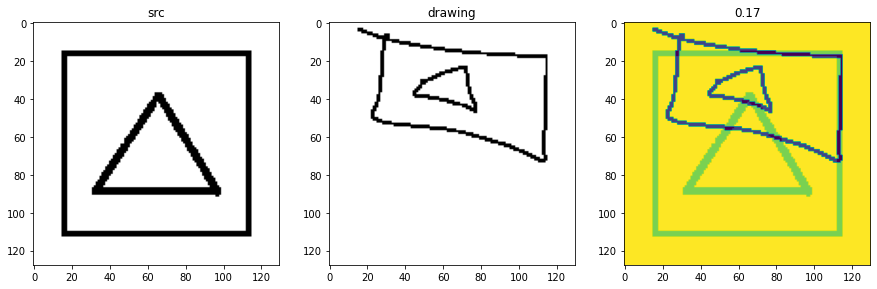

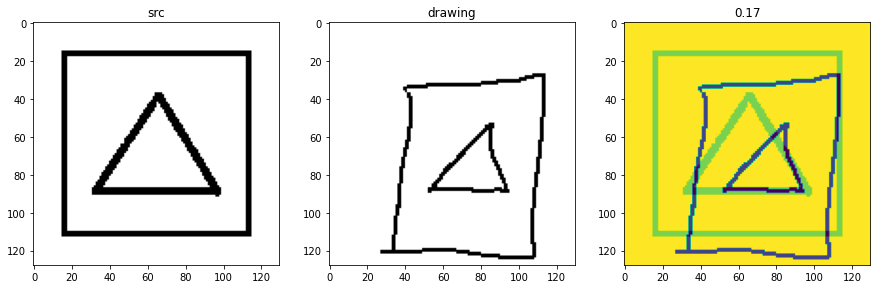

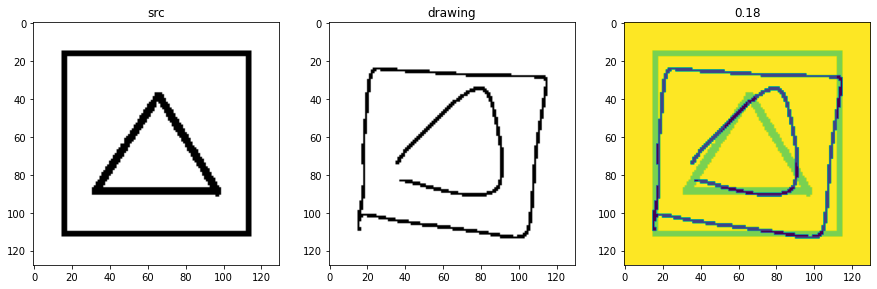

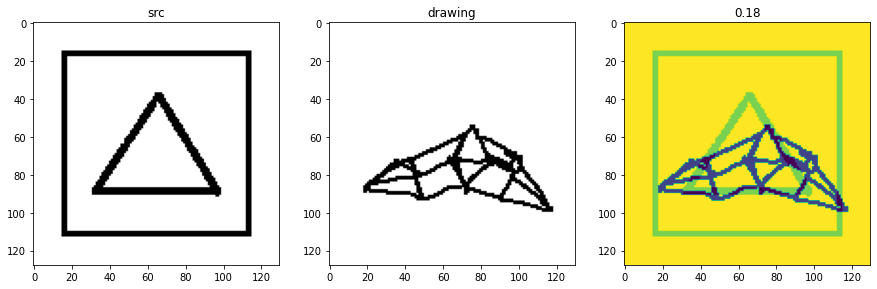

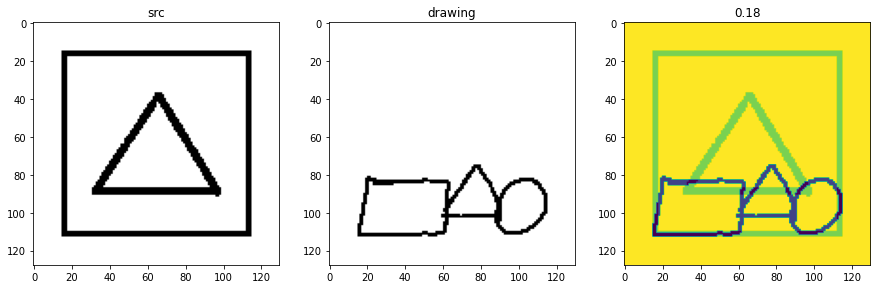

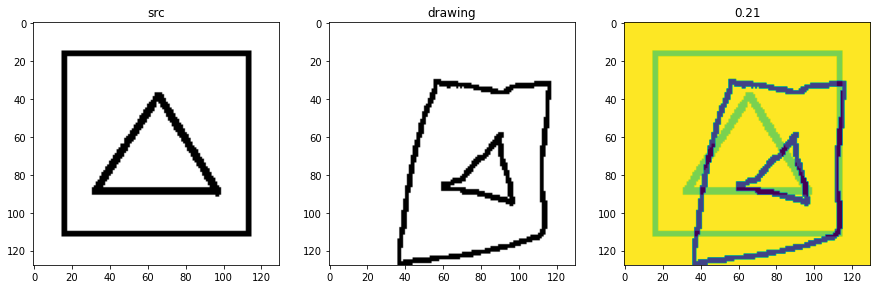

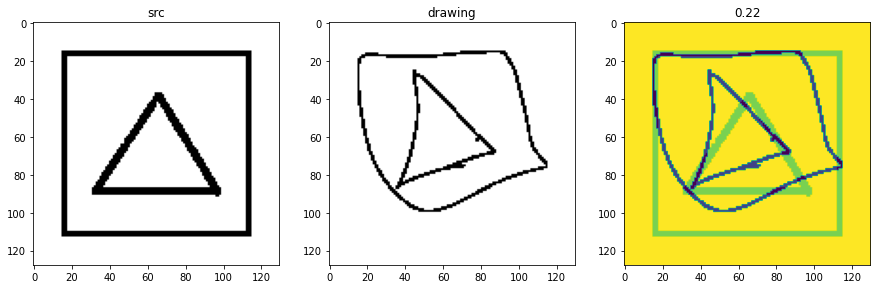

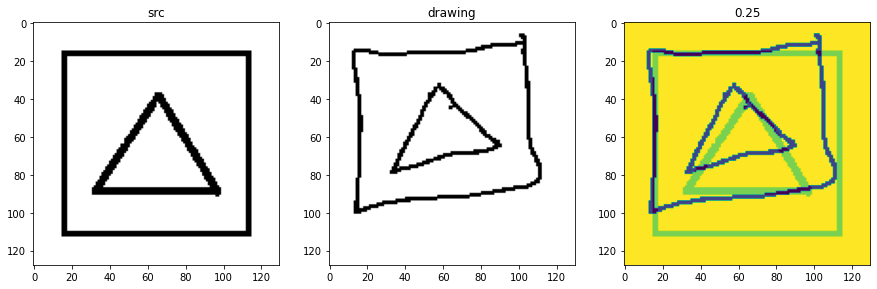

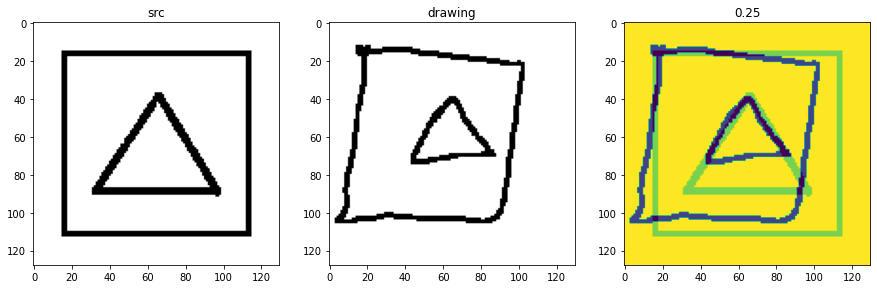

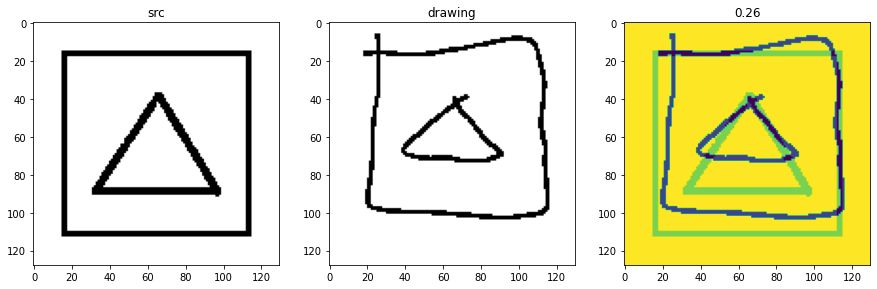

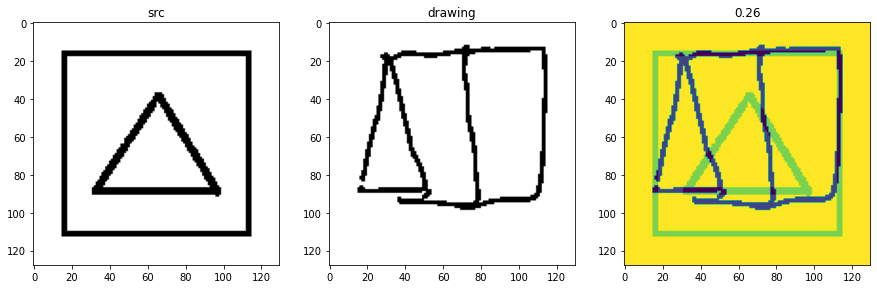

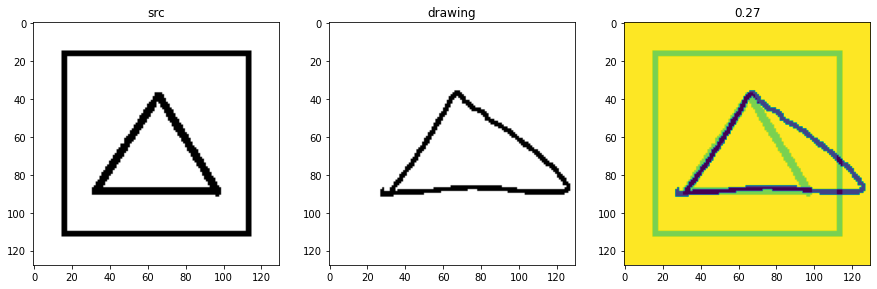

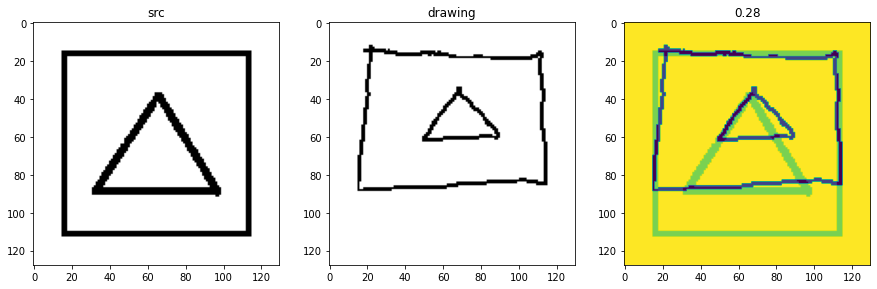

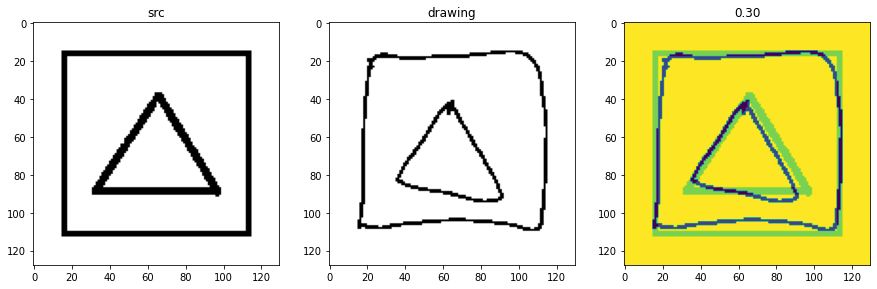

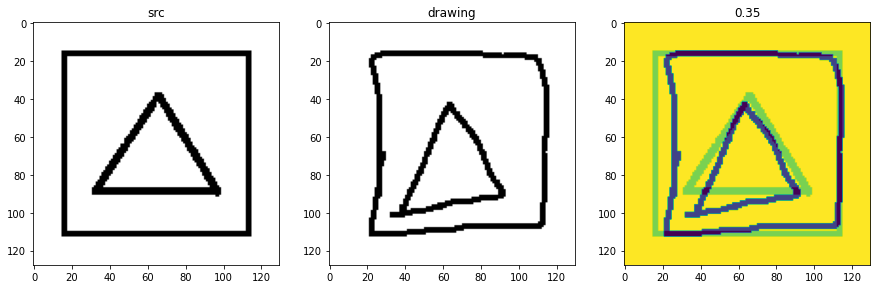

In [106]:

folder_path = r'C:\Users\idank\final_project\ShapeProject\GetSenseDataset\src'
base_parent_path = r'C:\Users\idank\final_project\ShapeProject\GetSenseDataset\drawing'

for filename in os.listdir(folder_path):
    print(f'\n{filename}:\n')
    if filename.endswith('.jpg') or filename.endswith('.png'):
        src_path = os.path.join(folder_path, filename)
        img = cv2.imread(src_path)
        img_name = os.path.splitext(filename)[0]
        parent_folder_path = os.path.join(base_parent_path, img_name)
        if os.path.isdir(parent_folder_path):
            
            drawing_list = []
            ssim_score_list = []            
            for img_filename in os.listdir(parent_folder_path):
                if img_filename.endswith('.jpg') or img_filename.endswith('.png'):
                    hand_draw_path = os.path.join(parent_folder_path, img_filename)
                    src_img_obj_padd, best_ssim, best_padding, best_hand_copy_img_obj_resized_ratio_padd = new_simpleMetric(src_img_path=src_path, hand_copy_img_path=hand_draw_path, width_jump=3, height_jump=3, CONSTANT_PADDING=15)
                    drawing_list.append(best_hand_copy_img_obj_resized_ratio_padd)
                    ssim_score_list.append(best_ssim)

            ssims_and_drawings = [[y,x] for y,x in sorted(zip(ssim_score_list, drawing_list))]
            for ssim_and_drawing in ssims_and_drawings:
                
                ssim_score = ssim_and_drawing[0]
                drawing = ssim_and_drawing[1]
                
                f, axarr = plt.subplots(1,3, figsize=(15, 15))
                axarr[0].imshow(src_img_obj_padd, cmap='gray', vmin=0, vmax=255)
                axarr[0].title.set_text('src')
                axarr[1].imshow(drawing, cmap='gray', vmin=0, vmax=255)
                axarr[1].title.set_text('drawing')
                axarr[2].imshow(cv2.addWeighted(src_img_obj_padd,0.2,drawing,0.8,0))
                axarr[2].title.set_text("{:.2f}".format(ssim_score))
                plt.show()
                
        else:
            print(f"Folder '{img_name}' not found!")

### image_moments_similarity:


DRAWING_0_1_LINE.jpg:



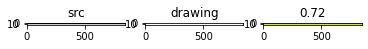

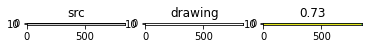

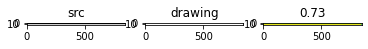

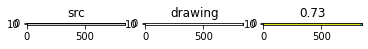

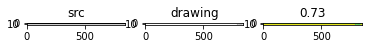

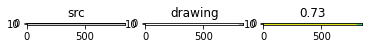

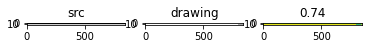

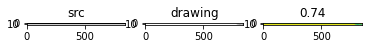

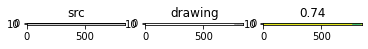

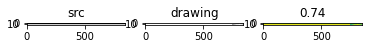

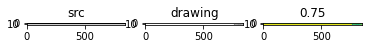

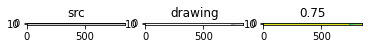

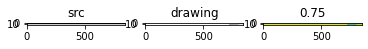

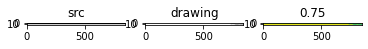


DRAWING_0_LINE.jpg:



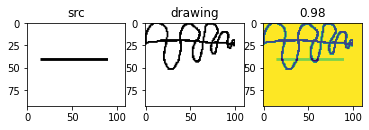

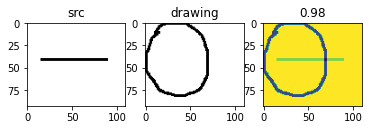

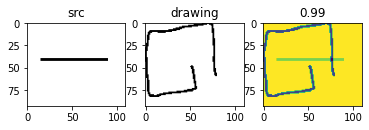

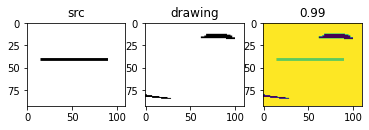

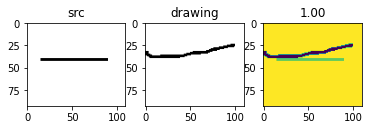

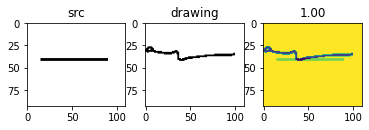

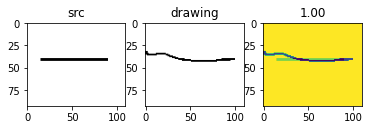

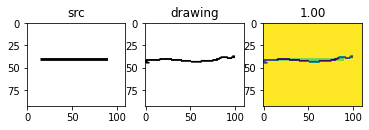

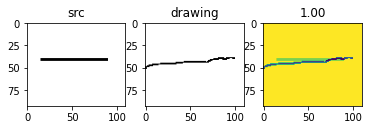

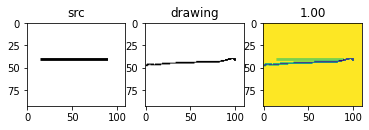

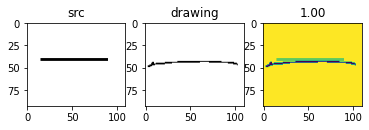

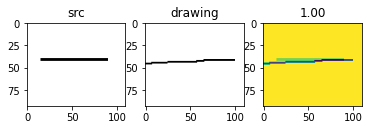

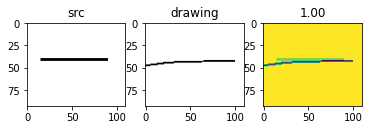

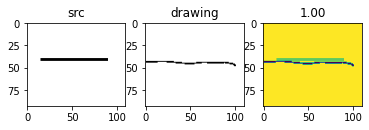


DRAWING_1_CIRCLE.jpg:



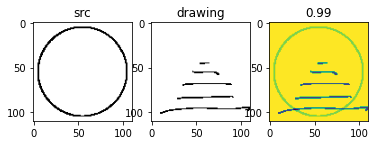

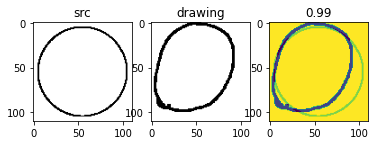

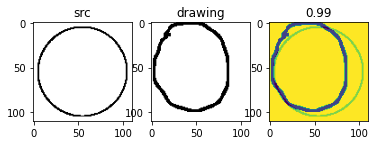

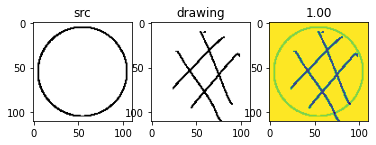

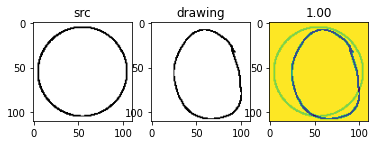

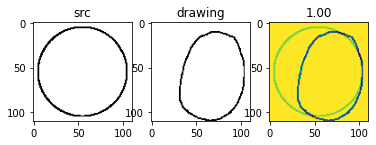

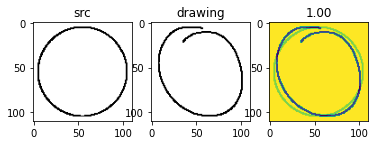

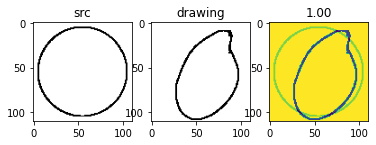

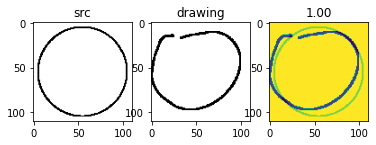

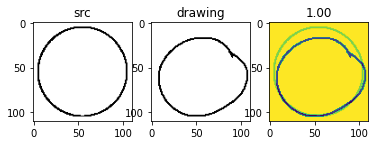

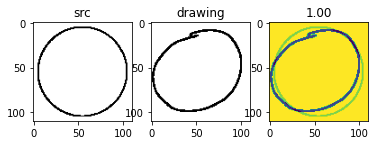

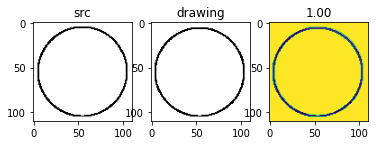


DRAWING_2_TRIANGLE.jpg:



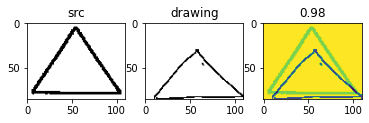

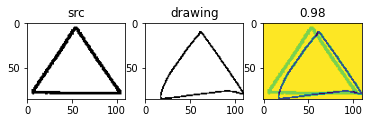

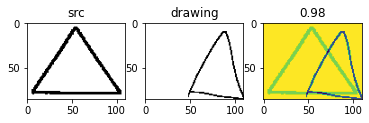

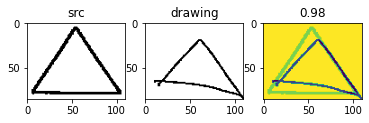

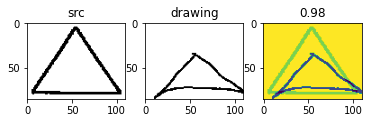

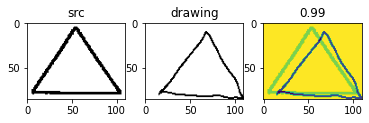

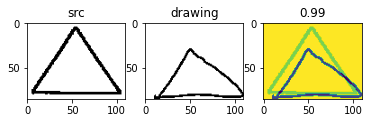

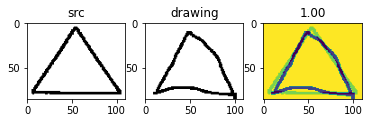

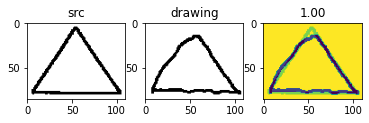


DRAWING_3.jpg:



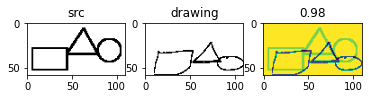

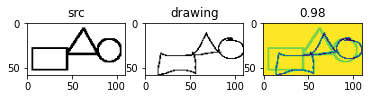

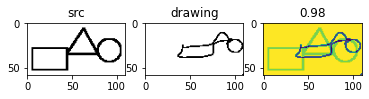

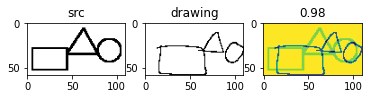

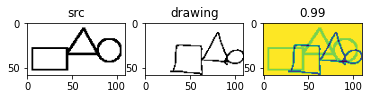

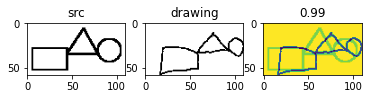

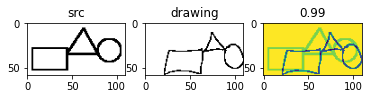

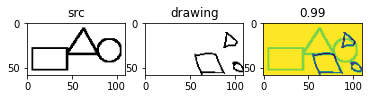

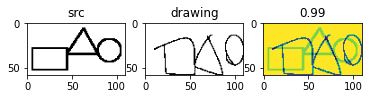

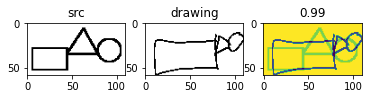

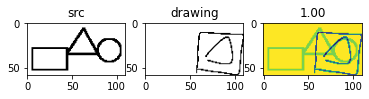

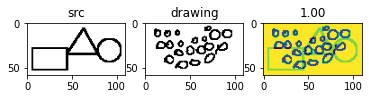

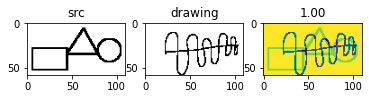

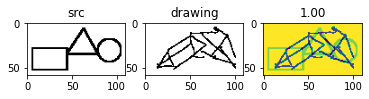


DRAWING_4.jpg:



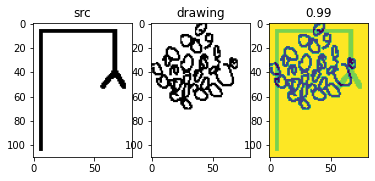

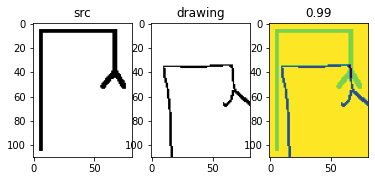

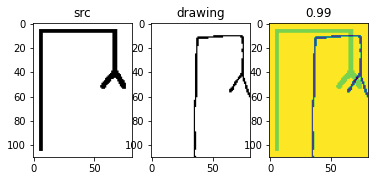

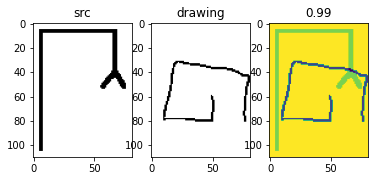

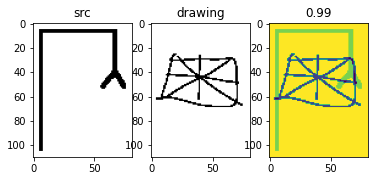

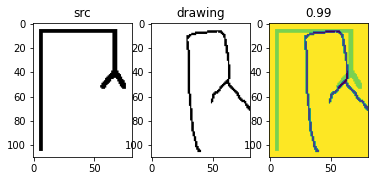

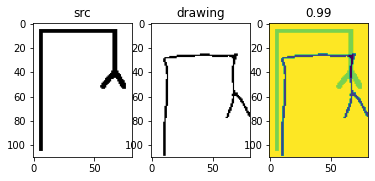

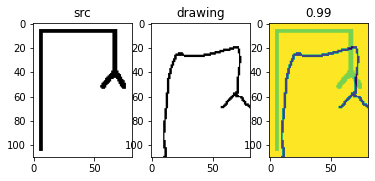

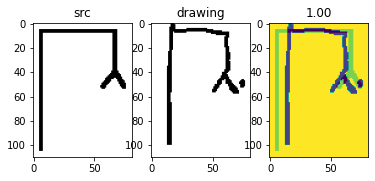

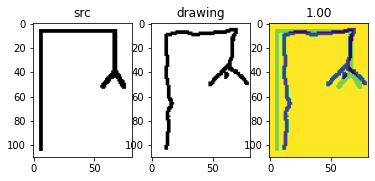


DRAWING_5.jpg:



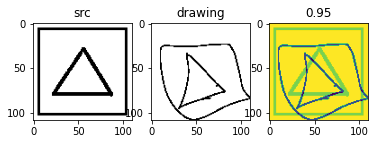

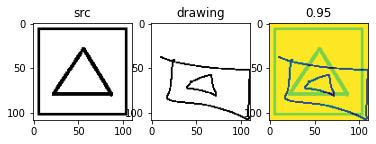

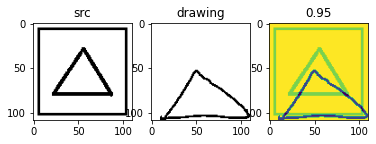

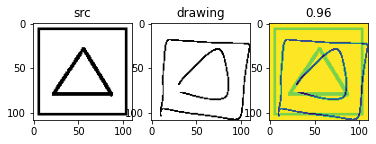

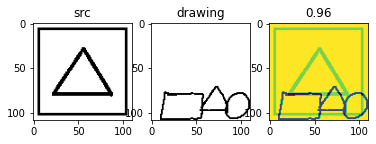

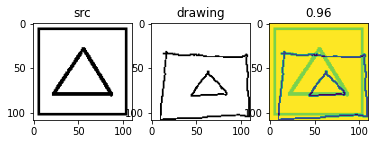

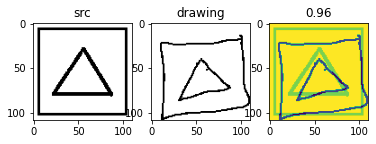

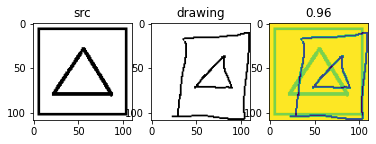

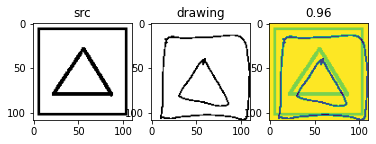

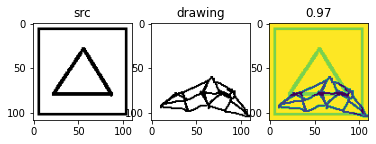

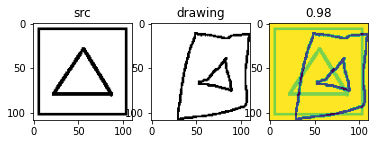

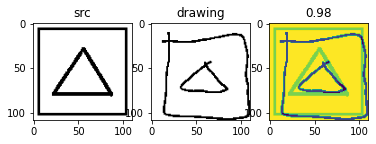

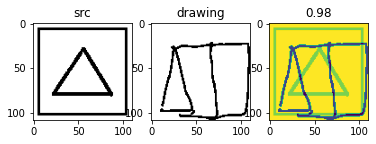

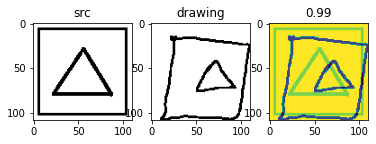

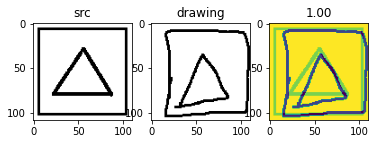

In [24]:

folder_path = r'C:\Users\idank\final_project\ShapeProject\GetSenseDataset\src'
base_parent_path = r'C:\Users\idank\final_project\ShapeProject\GetSenseDataset\drawing'


for filename in os.listdir(folder_path):
    print(f'\n{filename}:\n')
    if filename.endswith('.jpg') or filename.endswith('.png'):
        src_path = os.path.join(folder_path, filename)
        img = cv2.imread(src_path)
        img_name = os.path.splitext(filename)[0]
        parent_folder_path = os.path.join(base_parent_path, img_name)
        if os.path.isdir(parent_folder_path):
            
            drawing_list = []
            ssim_score_list = []            
            for img_filename in os.listdir(parent_folder_path):
                if img_filename.endswith('.jpg') or img_filename.endswith('.png'):
                    hand_draw_path = os.path.join(parent_folder_path, img_filename)
                    src_img_obj_padd, best_ssim, best_padding, best_hand_copy_img_obj_resized_ratio_padd = new_image_moments_similarity(src_img_path=src_path, hand_copy_img_path=hand_draw_path, width_jump=1, height_jump=1)
                    drawing_list.append(best_hand_copy_img_obj_resized_ratio_padd)
                    ssim_score_list.append(best_ssim)

            ssims_and_drawings = [[y,x] for y,x in sorted(zip(ssim_score_list, drawing_list))]
            for ssim_and_drawing in ssims_and_drawings:
                
                ssim_score = ssim_and_drawing[0]
                drawing = ssim_and_drawing[1]
                
                f, axarr = plt.subplots(1,3)
                axarr[0].imshow(src_img_obj_padd, cmap='gray', vmin=0, vmax=255)
                axarr[0].title.set_text('src')
                axarr[1].imshow(drawing, cmap='gray', vmin=0, vmax=255)
                axarr[1].title.set_text('drawing')
                axarr[2].imshow(cv2.addWeighted(src_img_obj_padd,0.2,drawing,0.8,0))
                axarr[2].title.set_text("{:.2f}".format(ssim_score))
                plt.show()
                
        else:
            print(f"Folder '{img_name}' not found!")

### hu_moments_similarity:



DRAWING_0_1_LINE.jpg:



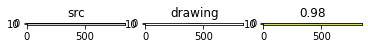

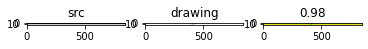

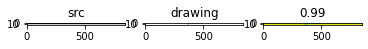

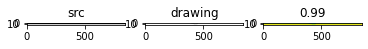

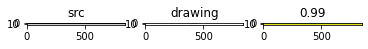

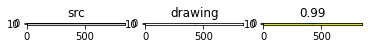

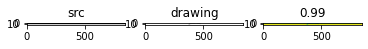

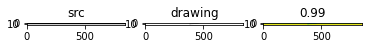

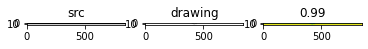

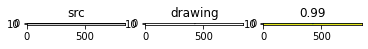

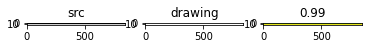

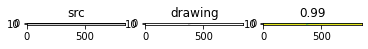

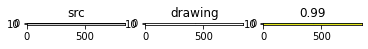

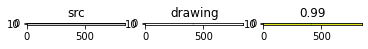


DRAWING_0_LINE.jpg:



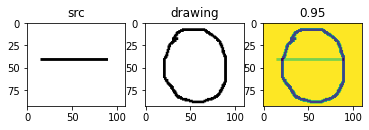

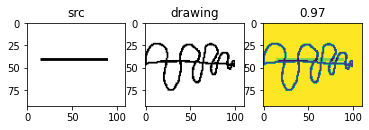

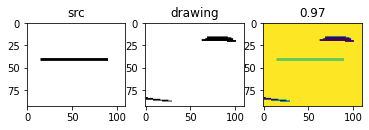

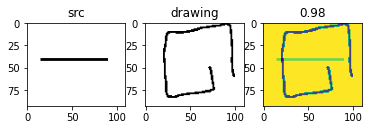

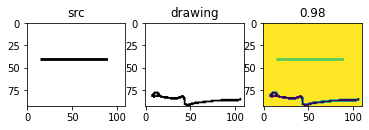

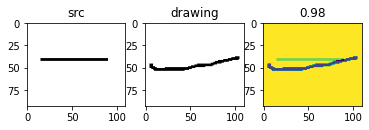

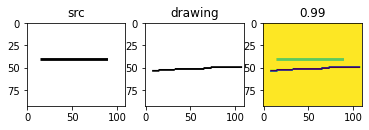

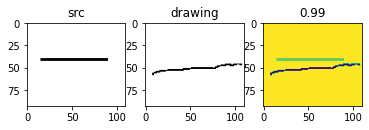

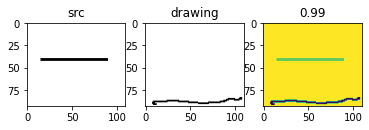

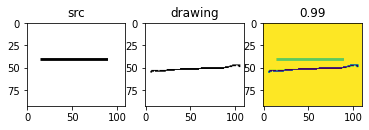

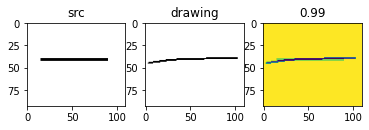

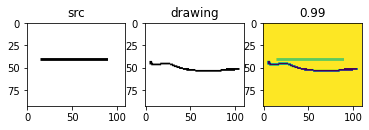

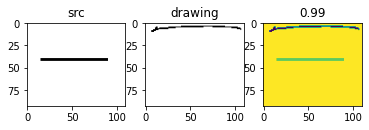

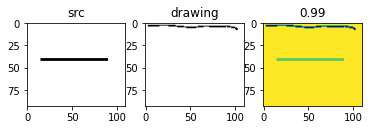


DRAWING_1_CIRCLE.jpg:



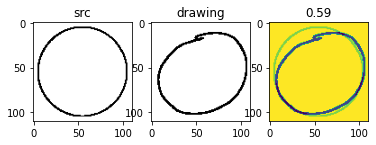

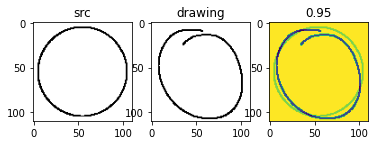

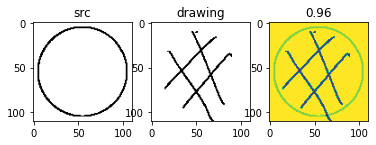

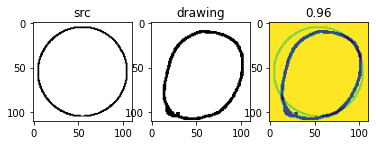

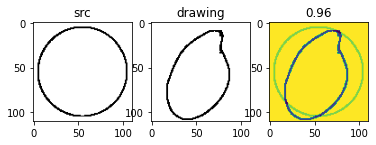

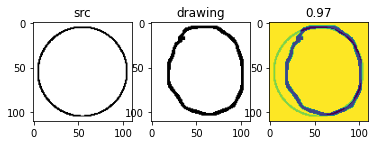

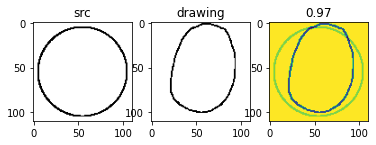

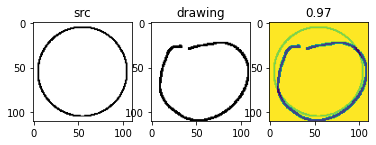

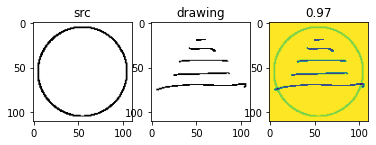

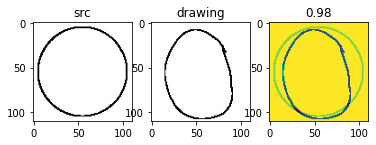

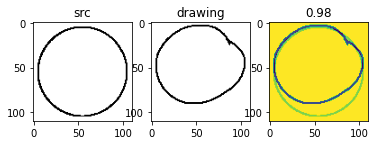

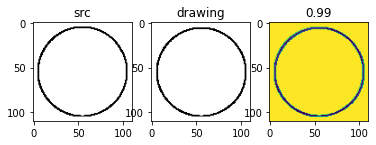


DRAWING_2_TRIANGLE.jpg:



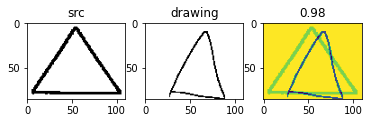

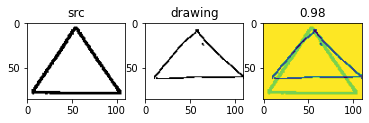

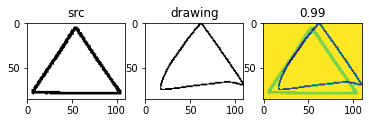

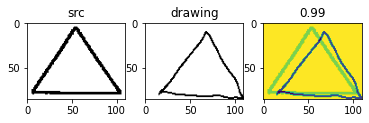

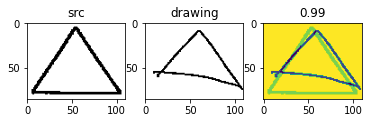

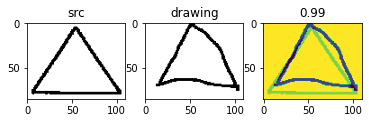

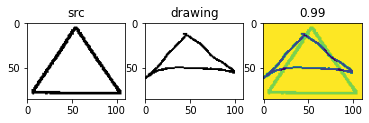

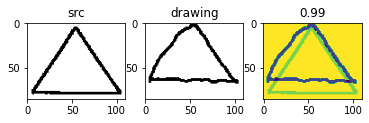

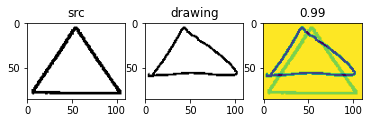


DRAWING_3.jpg:



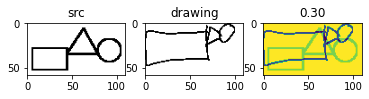

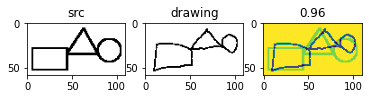

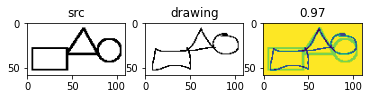

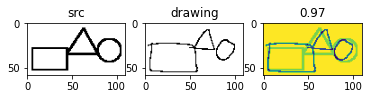

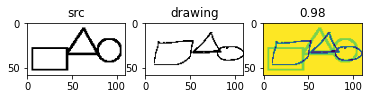

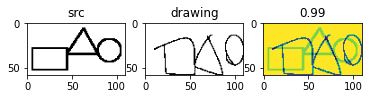

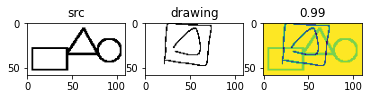

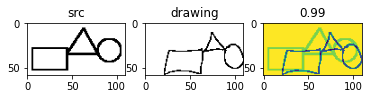

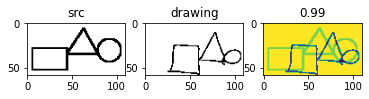

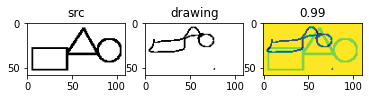

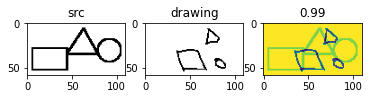

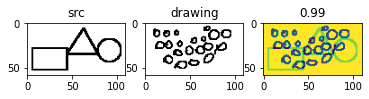

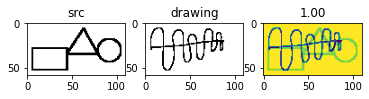

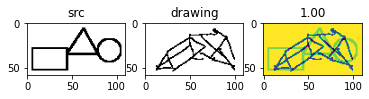


DRAWING_4.jpg:



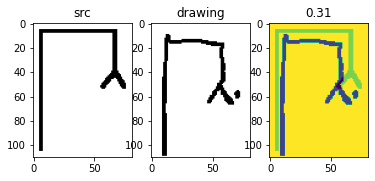

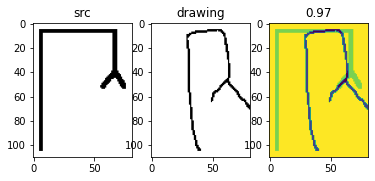

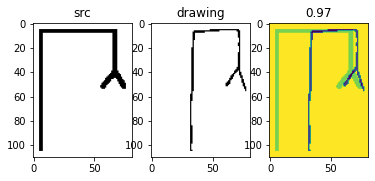

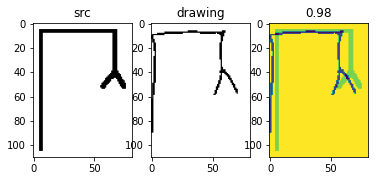

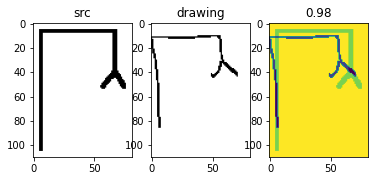

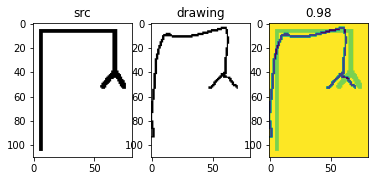

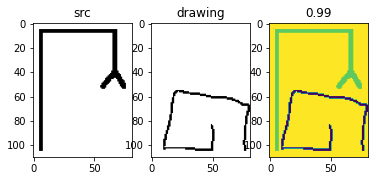

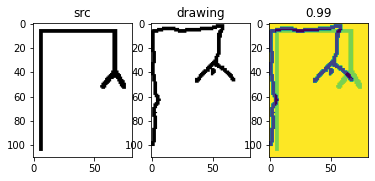

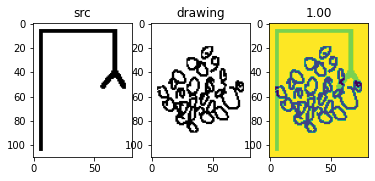

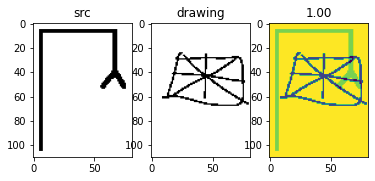


DRAWING_5.jpg:



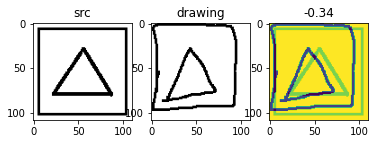

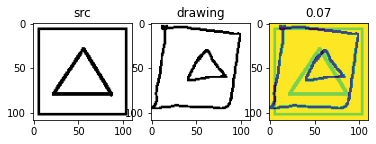

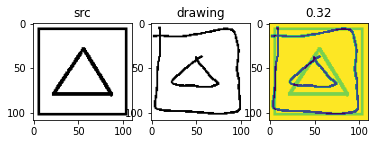

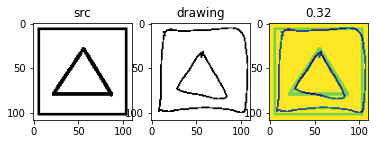

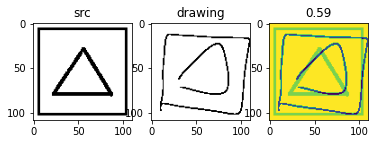

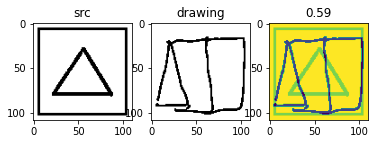

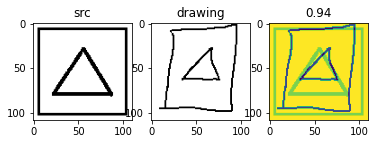

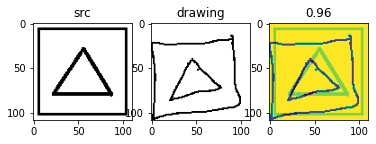

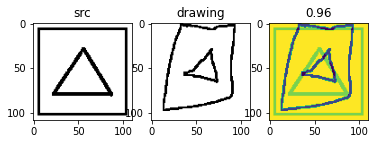

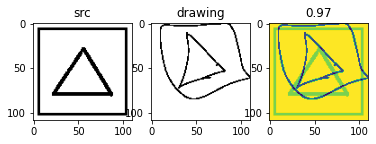

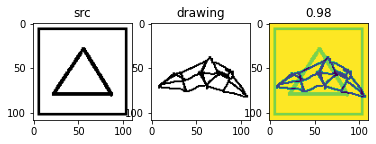

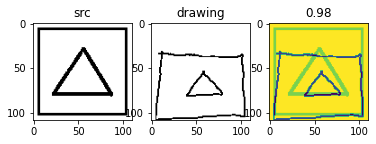

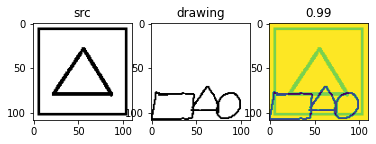

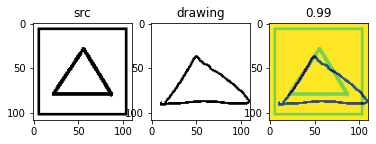

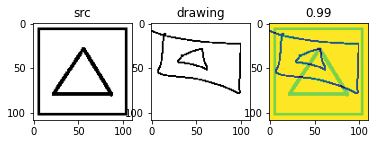

In [25]:

folder_path = r'C:\Users\idank\final_project\ShapeProject\GetSenseDataset\src'
base_parent_path = r'C:\Users\idank\final_project\ShapeProject\GetSenseDataset\drawing'


for filename in os.listdir(folder_path):
    print(f'\n{filename}:\n')
    if filename.endswith('.jpg') or filename.endswith('.png'):
        src_path = os.path.join(folder_path, filename)
        img = cv2.imread(src_path)
        img_name = os.path.splitext(filename)[0]
        parent_folder_path = os.path.join(base_parent_path, img_name)
        if os.path.isdir(parent_folder_path):
            
            drawing_list = []
            ssim_score_list = []            
            for img_filename in os.listdir(parent_folder_path):
                if img_filename.endswith('.jpg') or img_filename.endswith('.png'):
                    hand_draw_path = os.path.join(parent_folder_path, img_filename)
                    src_img_obj_padd, best_ssim, best_padding, best_hand_copy_img_obj_resized_ratio_padd = new_hu_moments_similarity(src_img_path=src_path, hand_copy_img_path=hand_draw_path, width_jump=1, height_jump=1)
                    drawing_list.append(best_hand_copy_img_obj_resized_ratio_padd)
                    ssim_score_list.append(best_ssim)

            ssims_and_drawings = [[y,x] for y,x in sorted(zip(ssim_score_list, drawing_list))]
            for ssim_and_drawing in ssims_and_drawings:
                
                ssim_score = ssim_and_drawing[0]
                drawing = ssim_and_drawing[1]
                
                f, axarr = plt.subplots(1,3)
                axarr[0].imshow(src_img_obj_padd, cmap='gray', vmin=0, vmax=255)
                axarr[0].title.set_text('src')
                axarr[1].imshow(drawing, cmap='gray', vmin=0, vmax=255)
                axarr[1].title.set_text('drawing')
                axarr[2].imshow(cv2.addWeighted(src_img_obj_padd,0.2,drawing,0.8,0))
                axarr[2].title.set_text("{:.2f}".format(ssim_score))
                plt.show()
                
        else:
            print(f"Folder '{img_name}' not found!")

### shape_context_similarity(dosen't work):

In [26]:

folder_path = r'C:\Users\idank\final_project\ShapeProject\GetSenseDataset\src'
base_parent_path = r'C:\Users\idank\final_project\ShapeProject\GetSenseDataset\drawing'


for filename in os.listdir(folder_path):
    print(f'\n{filename}:\n')
    if filename.endswith('.jpg') or filename.endswith('.png'):
        src_path = os.path.join(folder_path, filename)
        img = cv2.imread(src_path)
        img_name = os.path.splitext(filename)[0]
        parent_folder_path = os.path.join(base_parent_path, img_name)
        if os.path.isdir(parent_folder_path):
            
            drawing_list = []
            ssim_score_list = []            
            for img_filename in os.listdir(parent_folder_path):
                if img_filename.endswith('.jpg') or img_filename.endswith('.png'):
                    hand_draw_path = os.path.join(parent_folder_path, img_filename)
                    src_img_obj_padd, best_ssim, best_padding, best_hand_copy_img_obj_resized_ratio_padd = new_shape_context_similarity(src_img_path=src_path, hand_copy_img_path=hand_draw_path, width_jump=1, height_jump=1)
                    drawing_list.append(best_hand_copy_img_obj_resized_ratio_padd)
                    ssim_score_list.append(best_ssim)

            ssims_and_drawings = [[y,x] for y,x in sorted(zip(ssim_score_list, drawing_list))]
            for ssim_and_drawing in ssims_and_drawings:
                
                ssim_score = ssim_and_drawing[0]
                drawing = ssim_and_drawing[1]
                
                f, axarr = plt.subplots(1,3)
                axarr[0].imshow(src_img_obj_padd, cmap='gray', vmin=0, vmax=255)
                axarr[0].title.set_text('src')
                axarr[1].imshow(drawing, cmap='gray', vmin=0, vmax=255)
                axarr[1].title.set_text('drawing')
                axarr[2].imshow(cv2.addWeighted(src_img_obj_padd,0.2,drawing,0.8,0))
                axarr[2].title.set_text("{:.2f}".format(ssim_score))
                plt.show()
                
        else:
            print(f"Folder '{img_name}' not found!")


DRAWING_0_1_LINE.jpg:



error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv_contrib\modules\shape\src\sc_dis.cpp:204: error: (-215:Assertion failed) (set1.channels()==2) && (set1.cols>0) in function 'cv::ShapeContextDistanceExtractorImpl::computeDistance'


# Make lines Thin:
### not working so good for now. not in use.

In [15]:
def getImageThinLines(image):
#     THINNING_GUOHALL / 
    ocv = cv2.ximgproc.thinning(image, None, cv2.ximgproc.THINNING_GUOHALL)
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(image, cmap='gray', vmin=127, vmax=255)
    axarr[1].imshow(ocv, cmap='gray', vmin=127, vmax=255)
    axarr[2].imshow(cv2.addWeighted(image,0.2,ocv,0.8,0))
    plt.show()
    return ocv

# img_src_path = r"C:\Users\idank\final_project\ShapeProject\OriginalImagesCrop\2.jpg"
# src_img_obj = cv2.imread(img_src_path, 0)
# getImageThinLines(src_img_obj)

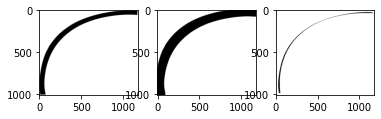

In [6]:
# import cv2  
# import numpy as np

# img_src_path = r"C:\Users\idank\final_project\ShapeProject\OriginalImagesCrop\2.jpg"

# img = cv2.imread(img_src_path, 0)
  
# kernel = np.ones((40,40), np.uint8)
# img_erosion = cv2.erode(img, kernel, iterations=1)
# img_dilation = cv2.dilate(img, kernel, iterations=1)
# f, axarr = plt.subplots(1,3)
# axarr[0].imshow(img, cmap='gray', vmin=0, vmax=255)
# axarr[1].imshow(img_erosion, cmap='gray', vmin=0, vmax=255)
# axarr[2].imshow(img_dilation, cmap='gray', vmin=0, vmax=255)
# # cv2.imshow('Input', img)  
# # cv2.imshow('Dilation', img_dilation)  
# # cv2.waitKey(0)  

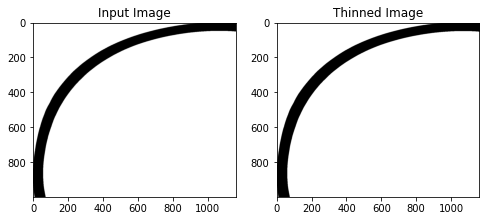

In [11]:
def getImageThinLines(image):
    # Threshold the image to create a binary image
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Define a structuring element
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

    # Perform erosion
    eroded = cv2.erode(thresh, kernel, iterations=1)

    # Return the eroded image
    return eroded

# # Read the input image
# img_src_path = r"C:\Users\idank\final_project\ShapeProject\OriginalImagesCrop\2.jpg"
# img = cv2.imread(img_src_path, cv2.IMREAD_GRAYSCALE)

# # Get the thinned image
# thinned_img = getImageThinLines(img)

# # Plot the input and thinned images side by side
# fig, ax = plt.subplots(1, 2, figsize=(8, 4))
# ax[0].imshow(img, cmap="gray")
# ax[0].set_title("Input Image")
# ax[1].imshow(thinned_img, cmap="gray")
# ax[1].set_title("Thinned Image")
# plt.show()

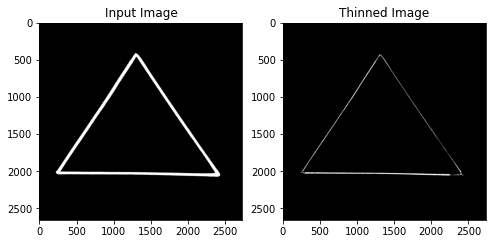

In [36]:
# import cv2
# import numpy as np

# # Create an image with text on it
# img_src_path = r"C:\Users\idank\final_project\ShapeProject\OriginalImagesCrop\Shap2.jpg"
# img = cv2.imread(img_src_path, cv2.IMREAD_GRAYSCALE)
# img1 = img.copy()

# # Structuring Element
# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(21,21))
# # Create an empty output image to hold values
# thin = np.zeros(img.shape,dtype='uint8')

# # Loop until erosion leads to an empty set
# while (cv2.countNonZero(img1)!=0):
#     # Erosion
#     erode = cv2.erode(img1,kernel)
#     # Opening on eroded image
#     opening = cv2.morphologyEx(erode,cv2.MORPH_OPEN,kernel)
#     # Subtract these two
#     subset = erode - opening
#     # Union of all previous sets
#     thin = cv2.bitwise_or(subset,thin)
#     # Set the eroded image for next iteration
#     img1 = erode.copy()

# # Plot the input and thinned images side by side
# fig, ax = plt.subplots(1, 2, figsize=(8, 4))
# ax[0].imshow(img, cmap="gray")
# ax[0].set_title("Input Image")
# ax[1].imshow(thin, cmap="gray")
# ax[1].set_title("Thinned Image")
# plt.show()

### FFT (weird results):

In [104]:


src_img_obj1 = cv2.imread(r"C:\Users\idank\final_project\ShapeProject\GetSenseDataset\drawing\DRAWING_0_1_LINE\no_3.png", cv2.IMREAD_GRAYSCALE)
src_img_obj2 = cv2.imread(r"C:\Users\idank\final_project\ShapeProject\GetSenseDataset\src\DRAWING_1_CIRCLE.jpg", cv2.IMREAD_GRAYSCALE)
src_img_obj2 = cv2.resize(src_img_obj2, (src_img_obj1.shape[1], src_img_obj1.shape[0]))

THRESHOD = 254
image_as_array = np.array(src_img_obj1)
image_as_array[image_as_array > THRESHOD] = 255
image_as_array[image_as_array <= THRESHOD] = 0
src_img_obj1 = image_as_array

image_as_array = np.array(src_img_obj2)
image_as_array[image_as_array > THRESHOD] = 255
image_as_array[image_as_array <= THRESHOD] = 0
src_img_obj2 = image_as_array

# contour1 = preprocess_image(image1)
# contour2 = preprocess_image(image2)

contour1 = image1
contour2 = image2

fd1 = fourier_descriptors(contour1)
fd2 = fourier_descriptors(contour2)

fd1_normalized = normalize_fourier_descriptors(fd1)
fd2_normalized = normalize_fourier_descriptors(fd2)

similarity = similarity_metric(fd1_normalized, fd2_normalized)
print(f"Fourier Descriptor Similarity: {similarity}")

Fourier Descriptor Similarity: 0.002174170695582456


In [8]:
from keras.applications.resnet import ResNet50, preprocess_input
import keras.utils as image
from scipy.spatial import distance
import numpy as np

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Function to convert image to the format required by ResNet50
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to calculate similarity
def calculate_similarity(img1_path, img2_path):
    img1 = prepare_image(img1_path)
    img2 = prepare_image(img2_path)

    # Extract features
    features_img1 = model.predict(img1)
    features_img2 = model.predict(img2)

    # Compute similarity
    similarity = 1 - distance.cosine(features_img1, features_img2)
    return similarity

# Test the function with your images
similarity_score = calculate_similarity(r'C:\Users\idank\final_project\ShapeProject\GetSenseDataset\drawing\DRAWING_2_TRIANGLE\triangle7.png', r'C:\Users\idank\final_project\ShapeProject\GetSenseDataset\drawing\DRAWING_1_CIRCLE\circleSRC.jpg')
print(f'Similarity Score: {similarity_score}')

1/1 [==============================] - 0s 199ms/step
Similarity Score: 0.60691237449646


In [18]:
def rotate_image(image,step,numImages):
    step_size = step
    rotated_images = []
    for i in range(numImages):
        (h, w) = image.shape[:2]
        (cX, cY) = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D((cX, cY), step, 1.0)
        border_color = image[0,0].tolist()
        rotated = cv2.warpAffine(image, M, (w, h),borderMode=cv2.BORDER_CONSTANT,
                           borderValue=border_color)
        rotated_images.append(rotated)
        step += step_size
#         print("src image")
#         imgplot = plt.imshow(image)
#         plt.show()
#         print("rotated image")
#         imgplot = plt.imshow(rotated)
#         plt.show()

    return rotated_images

In [23]:
def shift_image(image, x, y, numImages):
    x_step_size = x
    y_step_size = y
    shifted_img = []
    for i in range(numImages):
        M = np.float32([[1, 0, x], [0, 1, y]])
        border_color = image[0,0].tolist()
        # Apply the translation to the image
        shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]),borderMode=cv2.BORDER_CONSTANT,
                               borderValue=border_color)
        shifted_img.append(shifted)
        x += x_step_size
        y += y_step_size

    # Return the shifted image
    return shifted_img

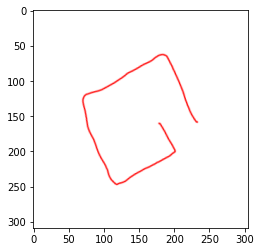

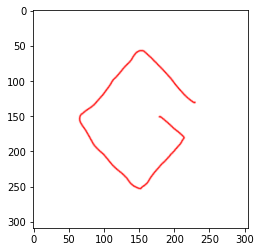

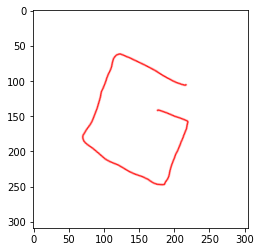

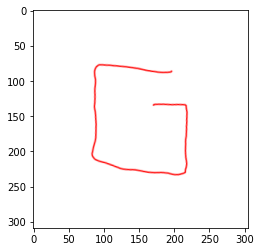

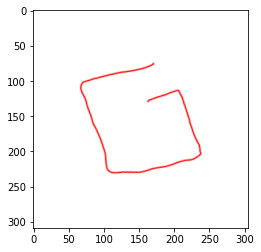

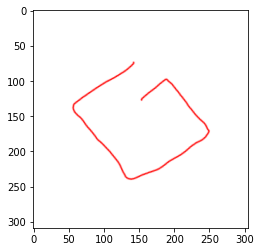

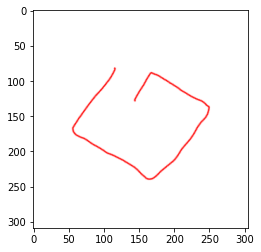

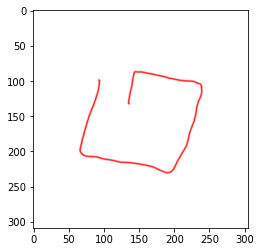

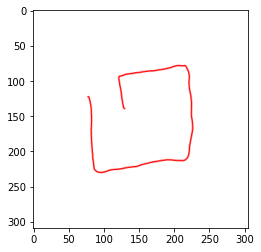

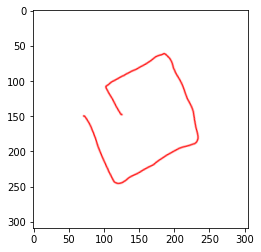

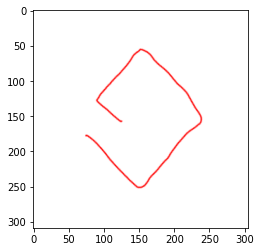

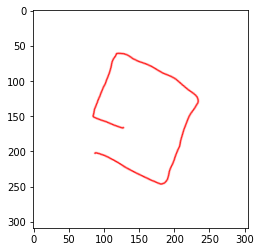

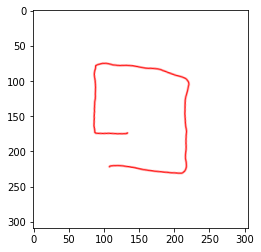

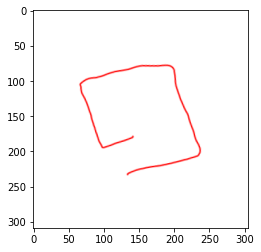

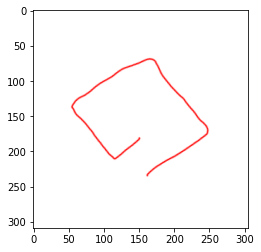

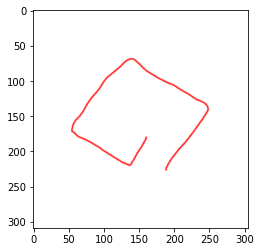

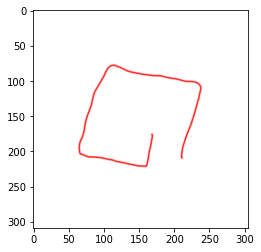

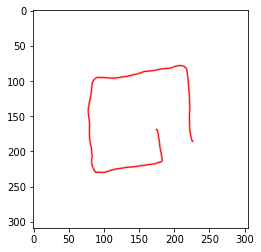

In [19]:
path =r'C:\Users\idank\final_project\ShapeProject\GetSenseDataset\drawing\DRAWING_0_1_LINE\no_2.png'
# load the image and show it
image = cv2.imread(path)
(h, w) = image.shape[:2]
paddingSize = max(h,w)//2
image = padding_image(paddingSize, paddingSize, paddingSize, paddingSize,img_obj = image)
arr = rotate_image(image,20,18)
for a in arr:
    imgplot = plt.imshow(a)
    plt.show()
#     cv2.imshow("image", a)
#     cv2.waitKey(0)

5


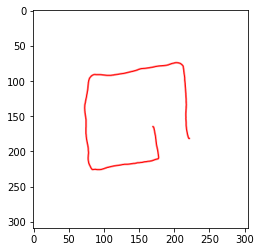

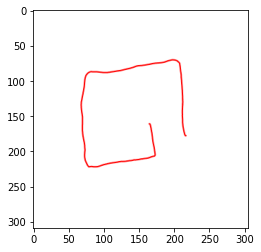

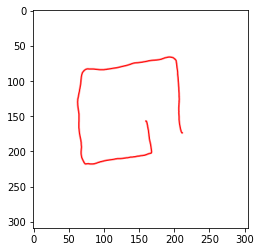

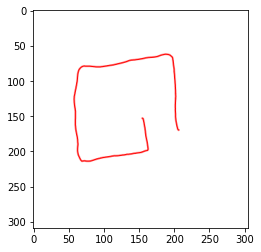

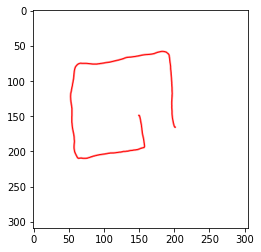

In [24]:
path =r'C:\Users\idank\final_project\ShapeProject\GetSenseDataset\drawing\DRAWING_0_1_LINE\no_2.png'
# load the image and show it
image = cv2.imread(path)
# imgplot = plt.imshow(image)
# plt.show()
(h, w) = image.shape[:2]
paddingSize = max(h,w)//2
image = padding_image(paddingSize, paddingSize, paddingSize, paddingSize,img_obj = image)
shifted = shift_image(image,-5,-4,5)
print(len(shifted))
for a in shifted:
    imgplot = plt.imshow(a)
    plt.show()
# imgplot = plt.imshow(shifted)
# plt.show()

In [ ]:
import numpy as np
import cv2

def merge_grayscale_images(img1_path, img2_path):
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

    # Convert images to numpy arrays
    img1 = np.array(img1)
    img2 = np.array(img2)
    
    # Find the maximum height and width of the two images
    max_height = max(img1.shape[0], img2.shape[0])
    max_width = max(img1.shape[1], img2.shape[1])
    
    # Add white padding to each image if necessary to make them the same size
    img1_padded = cv2.copyMakeBorder(img1, 0, max_height - img1.shape[0], 0, max_width - img1.shape[1], cv2.BORDER_CONSTANT, value=[255, 255, 255])
    img2_padded = cv2.copyMakeBorder(img2, 0, max_height - img2.shape[0], 0, max_width - img2.shape[1], cv2.BORDER_CONSTANT, value=[255, 255, 255])

    # Reshape the grayscale images to have a third dimension of 1
    img1_padded = img1_padded.reshape((img1_padded.shape[0], img1_padded.shape[1], 1))
    img2_padded = img2_padded.reshape((img2_padded.shape[0], img2_padded.shape[1], 1))
    
    # Create an empty numpy array for the third channel
    img3 = np.zeros((max_height, max_width, 1))

    # Merge the images
    merged_img = np.concatenate((img1_padded, img2_padded, img3), axis=2)
    
    plt.imshow(merged_img)
    plt.show()

    return merged_img

merge_grayscale_images(r'C:\Users\koazg\Desktop\ShapeProject\OriginalImages\5.jpg', r'C:\Users\koazg\Desktop\ShapeProject\OriginalImages\2.jpg')
merge_grayscale_images(r'C:\Users\koazg\Desktop\ShapeProject\OriginalImages\5.jpg', r'C:\Users\koazg\Desktop\ShapeProject\OriginalImages\2.jpg').shape

In [ ]:
import keras
from keras.datasets import cifar10
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np

# Define the number of classes
num_classes = 10

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Create a new model with the first three layers of ResNet50
model = Model(inputs=base_model.input, outputs=base_model.layers[2].output)

# Add a Flatten layer (if necessary)
x = Flatten()(model.output)

# Add a Dense layer with softmax activation function
output = Dense(num_classes, activation='softmax')(x)

# Define the new model
model = Model(model.input, output)

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

In [51]:
def all_image(image,paddingSize,column_step,row_step, save_dir):
#     x_step_size = x
#     y_step_size = y
    shifted_img = []
    rowSize = (2*paddingSize)
    colSize = (2*paddingSize)
#     M_start = np.float32([[1, 0, -(image.shape[1]+paddingSize)], [0, 1, -(image.shape[0]+paddingSize)]])
#     shifted_start = cv2.warpAffine(image, M_start, (image.shape[1], image.shape[0]),borderMode=cv2.BORDER_CONSTANT,
#                                    borderValue=border_color)
#     shifted_img.append(shifted_start)
    y = 0
    for r in range(rowSize//row_step):
        x = 0
        for c in range(colSize//column_step):
            M = np.float32([[1, 0, -(paddingSize)+x], [0, 1, -(paddingSize)+y]])
            border_color = image[0,0].tolist()
            # Apply the translation to the image
            shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]),borderMode=cv2.BORDER_CONSTANT,
                                   borderValue=border_color)

            # Check if the save directory exists, and create it if it doesn't
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)

            # Construct the path for the saved image
            save_path = os.path.join(save_dir, f'image_{y}_{x}.png')

            # Save the modified image to the specified directoryS
            cv2.imwrite(save_path, shifted)
            x += column_step
            
        y += row_step

    # Return the shifted image
    return shifted_img

In [74]:
image = cv2.imread('C:\\Users\\koazg\\Desktop\data\\5\\5.png')
image = resize_to(image,120)
(h, w) = image.shape[:2]
paddingSize = max(h,w)//2
image = padding_image(paddingSize, paddingSize, paddingSize, paddingSize,img_obj = image)
image = all_image(image,paddingSize,3,3, 'C:\\Users\\koazg\\Desktop\\data\\5')

In [63]:
def resize_to(image, size):
    resized_image = image_resize_keep_ratio(image, width = size, height = None, inter = cv2.INTER_AREA)
    if (resized_image.shape[0] > size or resized_image.shape[1] > size):
        resized_image = image_resize_keep_ratio(image, width = None, height = size, inter = cv2.INTER_AREA)
    return resized_image

In [8]:
path =r'C:\Users\gabi\Desktop\final\ShapeProject\GetSenseDataset\drawing\DRAWING_4\no_3.png'
# load the image and show it
image = cv2.imread(path)
# imgplot = plt.imshow(image)
# plt.show()
(h, w) = image.shape[:2]
paddingSize = max(h,w)//2
image = padding_image(paddingSize, paddingSize, paddingSize, paddingSize,img_obj = image)
# shifted = shift_image(image,-5,-4,5)
allShifted = all_image(image,paddingSize,10,10)
print(len(allShifted))
# for a in allShifted:
#     imgplot = plt.imshow(a)
#     plt.show()
# imgplot = plt.imshow(shifted)
# plt.show()

0


In [22]:
import os

# Specify the directory where the images are located
dir_path = r"C:\Users\idank\final_project\ShapeProject\labled_data\hang_man_data"

# Loop through every file in the directory
for filename in os.listdir(dir_path):
    # Check if the file is an image (JPEG, PNG, etc.)
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image using Pillow
        img_path = os.path.join(dir_path, filename)
        # load the image and show it
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        image = resize_to(image, 180)

        (h, w) = image.shape[:2]
        paddingSize = max(h,w)//2
        image = padding_image(paddingSize, paddingSize, paddingSize, paddingSize,img_obj = image)
        root_folder = r"C:\Users\idank\final_project\ShapeProject\labled_data\hang_man_data"
        folder_name = filename.split('.')[0]
        
        allShifted = all_image(image,paddingSize,10,10, f'{root_folder}\\{folder_name}')


In [2]:
import os
import cv2
import numpy as np

# Define the path to the folder containing subfolders of images
data_dir = r"C:\Users\koazg\Desktop\ratedShapes"

# Get the subfolders in the data directory
subfolders = os.listdir(data_dir)

# Initialize lists to store images and labels
images = []
labels = []
shapes = []
counter = -1

# Loop through each subfolder
for subfolder in subfolders:
    print(subfolder)
    subfolder_path = os.path.join(data_dir, subfolder)
    subsubfolders = os.listdir(subfolder_path)
    counter += 1
    # Loop through each subfolder
    for subsubfolder in subsubfolders:
        print(subsubfolder)
        subsubfolder_path = os.path.join(subfolder_path, subsubfolder)
        
        # Loop through each image file in the subsubfolder
        for file_name in os.listdir(subsubfolder_path):
            if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png'):
                # Load the image and convert it to grayscale
                img_path = os.path.join(subsubfolder_path, file_name)
                img = cv2.imread(img_path)

                # Resize the image to a fixed size (optional)
                img = cv2.resize(img, (224, 224))

                # Add the image and label to the lists
                images.append(img)
                label = int(subsubfolder)
                shapes.append(counter)
                print((label, counter))
                labels.append(label)

# Convert the image and label lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
shapes = np.array(shapes)

# Print the shape of the data arrays
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)
print('Labels shape:', shapes.shape)


rated_circles
1
(1, 0)
2
(2, 0)
3
(3, 0)
4
(4, 0)
5
(5, 0)
rated_mix
1
(1, 1)
2
(2, 1)
(2, 1)
(2, 1)
(2, 1)
3
(3, 1)
(3, 1)
4
(4, 1)
(4, 1)
5
(5, 1)
rated_tree
1
(1, 2)
2
(2, 2)
(2, 2)
3
(3, 2)
4
(4, 2)
(4, 2)
5
(5, 2)
rated_triangles
1
(1, 3)
2
(2, 3)
(2, 3)
3
(3, 3)
(3, 3)
4
(4, 3)
5
(5, 3)
(5, 3)
(5, 3)
square_traingle_reted
1
(1, 4)
(1, 4)
2
(2, 4)
(2, 4)
3
(3, 4)
(3, 4)
(3, 4)
4
(4, 4)
5
(5, 4)
(5, 4)
Images shape: (41, 224, 224, 3)
Labels shape: (41,)
Labels shape: (41,)


In [3]:
np.unique(labels)

array([1, 2, 3, 4, 5])

In [4]:
labels[0]

1

In [5]:
np.unique(shapes)

array([0, 1, 2, 3, 4])

In [7]:
shapes[3]

0

In [5]:
images[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

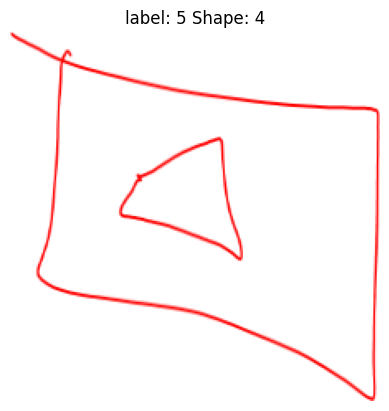

In [18]:
n = 40
image_data = np.array(images[n])
plt.imshow(image_data, cmap='gray')  # 'gray' colormap for grayscale image
plt.title("label: " + str(labels[n]) + " Shape: "+ str(shapes[n]))
plt.axis('off')  # Turn off axis ticks and labels
plt.show()

In [19]:
images[3].shape

(224, 224, 3)

In [21]:
from sklearn.model_selection import train_test_split

def split_data(images, labels, test_size=0.2, random_state=42):
    """
    Split the images and labels data randomly into training and testing sets.
    
    Args:
    - images: NumPy array of images.
    - labels: NumPy array of labels.
    - test_size: Fraction of the data to use for testing.
    - random_state: Seed value for the random number generator.
    
    Returns:
    - Tuple of (x_train, y_train), (x_test, y_test).
    """
    # Split the data into training and testing sets using train_test_split()
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=test_size, random_state=random_state)
    
    # Return the training and testing sets as a tuple
    return (x_train, y_train), (x_test, y_test)


In [2]:
import keras
from keras.applications.resnet import ResNet50, preprocess_input
# from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np

# Define the number of classes
num_classes = 12

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=True)
# Print the model summary
base_model.summary()

# Create a new model with the first three layers of ResNet50
model = Model(inputs=base_model.input, outputs=base_model.layers[3].output)

# Add a GlobalAveragePooling2D layer
x = GlobalAveragePooling2D()(model.output)

# Add a Dense layer with softmax activation function
output = Dense(num_classes, activation='softmax')(x)

# Define the new model
model = Model(model.input, output)

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets using the split_data() function
(x_train, y_train), (x_test, y_test) = split_data(images, labels)

# Preprocess the data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


102967424/102967424 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
          

 conv3_block3_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block2_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block1_out[0][0]']       
                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
          

                                )                                                                 
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

                                                                                                  
 conv5_block1_add (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_0_bn[0][0]',      
                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
          

NameError: name 'split_data' is not defined

In [2]:
from keras.applications.vgg16 import VGG16

# Define the number of classes
num_classes = 12

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)
# Print the model summary
base_model.summary()

# Create a new model with the first three layers of ResNet50
model = Model(inputs=base_model.input, outputs=base_model.layers[3].output)

# Add a GlobalAveragePooling2D layer
x = GlobalAveragePooling2D()(model.output)

# Add a Dense layer with softmax activation function
output = Dense(num_classes, activation='softmax')(x)

# Define the new model
model = Model(model.input, output)

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets using the split_data() function
(x_train, y_train), (x_test, y_test) = split_data(images, labels)

# Preprocess the data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))



## -----------

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_18[0][0]']               
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block2_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block3_1_relu[0][0]']    
          

                                                                                                  
 conv2_block1_3_bn (BatchNormal  (None, None, None,   1024       ['conv2_block1_3_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv2_block1_add (Add)         (None, None, None,   0           ['conv2_block1_0_bn[0][0]',      
                                256)                              'conv2_block1_3_bn[0][0]']      
                                                                                                  
 conv2_block1_out (Activation)  (None, None, None,   0           ['conv2_block1_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_blo

 ization)                       128)                                                              
                                                                                                  
 conv3_block1_2_relu (Activatio  (None, None, None,   0          ['conv3_block1_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block1_0_conv (Conv2D)   (None, None, None,   131584      ['conv2_block3_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv3_block1_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block1_2_relu[0][0]']    
                                512)                                                              
          

 conv3_block4_1_conv (Conv2D)   (None, None, None,   65664       ['conv3_block3_out[0][0]']       
                                128)                                                              
                                                                                                  
 conv3_block4_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block4_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block4_1_relu (Activatio  (None, None, None,   0          ['conv3_block4_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block4_2_conv (Conv2D)   (None, None, None,   147584      ['conv3_block4_1_relu[0][0]']    
          

                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block2_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block2_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block2_add (Add)         (None, None, None,   0           ['conv4_block1_out[0][0]',       
                                1024)                             'conv4_block2_3_bn[0][0]']      
                                                                                                  
 conv4_blo

                                256)                                                              
                                                                                                  
 conv4_block5_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block5_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block5_2_relu (Activatio  (None, None, None,   0          ['conv4_block5_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block5_2_relu[0][0]']    
                                1024)                                                             
          

 conv5_block1_out (Activation)  (None, None, None,   0           ['conv5_block1_add[0][0]']       
                                2048)                                                             
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block1_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block2_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, None, None,   0          ['conv5_block2_1_bn[0][0]']      
 n)       

KeyboardInterrupt: 

In [2]:
import os
import cv2
import numpy as np

# Define the path to the folder containing subfolders of images
data_dir = r"C:\Users\koazg\Desktop\data"

# Get the subfolders in the data directory
subfolders = os.listdir(data_dir)

# Initialize lists to store images and labels
images = []
labels = []
counter = 0

# Loop through each subfolder
for subfolder in subfolders:
    print(subfolder)
    subfolder_path = os.path.join(data_dir, subfolder)
    subsubfolders = os.listdir(subfolder_path)
    # Loop through each subfolder
    # subsubfolder_path = os.path.join(subfolder_path, subsubfolder)

    # Loop through each image file in the subsubfolder
    for file_name in os.listdir(subfolder_path):
        if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png'):
            # Load the image and convert it to grayscale
            img_path = os.path.join(subfolder_path, file_name)
            img = cv2.imread(img_path)
            
            # Resize the image to a fixed size (optional)
            img = cv2.resize(img, (224, 224))
            
            # Add the image and label to the lists
            images.append(img)
            label = counter
            print((label, counter))
            labels.append(label)
    counter += 1

# Convert the image and label lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print the shape of the data arrays
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)


1
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)

(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)

(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)

(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)

(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)

(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
Images shape: (8000, 224, 224, 3)
Labels shape: (8000,)


In [3]:
images.shape

(8000, 224, 224, 3)

In [4]:
labels

array([0, 0, 0, ..., 4, 4, 4])

In [5]:
images

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [8]:
import keras
from keras.applications.resnet import ResNet50, preprocess_input
# from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np

# Define the number of classes
num_classes = 5

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)
# Print the model summary
## base_model.summary()

for layer in base_model.layers:
 layer.trainable = False

base_model.summary()

last_layer = base_model.get_layer('conv5_block3_3_conv')
last_output = last_layer.output 


## x = Flatten()(last_output)

x = GlobalAveragePooling2D()(last_output)

x = Dense(5, activation='softmax', name='softmax')(x) 


new_model = Model(inputs=base_model.input, outputs=x)

new_model.summary()

# Create a new model with the first three layers of ResNet50
# model = Model(inputs=base_model.input, outputs=base_model.layers[3].output)

## model.summary()


# Add a GlobalAveragePooling2D layer
# x = GlobalAveragePooling2D()(model.output)

# Add a Dense layer with softmax activation function
# output = Dense(num_classes, activation='softmax')(x)

# Define the new model
# model = Model(model.input, output)

# Compile the model
new_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets using the split_data() function
(x_train, y_train), (x_test, y_test) = split_data(images, labels)

# Preprocess the data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Train the model
new_model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test))


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block2_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block3_1_relu[0][0]']    
          

                                                                                                  
 conv2_block1_3_bn (BatchNormal  (None, None, None,   1024       ['conv2_block1_3_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv2_block1_add (Add)         (None, None, None,   0           ['conv2_block1_0_bn[0][0]',      
                                256)                              'conv2_block1_3_bn[0][0]']      
                                                                                                  
 conv2_block1_out (Activation)  (None, None, None,   0           ['conv2_block1_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_blo

 ization)                       128)                                                              
                                                                                                  
 conv3_block1_2_relu (Activatio  (None, None, None,   0          ['conv3_block1_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block1_0_conv (Conv2D)   (None, None, None,   131584      ['conv2_block3_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv3_block1_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block1_2_relu[0][0]']    
                                512)                                                              
          

 conv3_block4_1_conv (Conv2D)   (None, None, None,   65664       ['conv3_block3_out[0][0]']       
                                128)                                                              
                                                                                                  
 conv3_block4_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block4_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block4_1_relu (Activatio  (None, None, None,   0          ['conv3_block4_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block4_2_conv (Conv2D)   (None, None, None,   147584      ['conv3_block4_1_relu[0][0]']    
          

                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block2_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block2_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block2_add (Add)         (None, None, None,   0           ['conv4_block1_out[0][0]',       
                                1024)                             'conv4_block2_3_bn[0][0]']      
                                                                                                  
 conv4_blo

                                256)                                                              
                                                                                                  
 conv4_block5_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block5_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block5_2_relu (Activatio  (None, None, None,   0          ['conv4_block5_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block5_2_relu[0][0]']    
                                1024)                                                             
          

 conv5_block1_out (Activation)  (None, None, None,   0           ['conv5_block1_add[0][0]']       
                                2048)                                                             
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block1_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block2_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, None, None,   0          ['conv5_block2_1_bn[0][0]']      
 n)       

KeyboardInterrupt: 

## RESENET FOR 25 CLASSES OF SHAPES N=5

In [24]:
import keras
from keras.applications.resnet import ResNet50, preprocess_input
# from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np

# Define the number of classes
num_classes = 5

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Print the model summary
## base_model.summary()

for layer in base_model.layers:
 layer.trainable = False

base_model.summary()

last_layer = base_model.get_layer('conv5_block3_3_conv')
last_output = last_layer.output 


## x = Flatten()(last_output)

x = GlobalAveragePooling2D()(last_output)

x = Dense(5, activation='softmax', name='softmax')(x) 


new_model = Model(inputs=base_model.input, outputs=x)

new_model.summary()

# Create a new model with the first three layers of ResNet50
# model = Model(inputs=base_model.input, outputs=base_model.layers[3].output)

## model.summary()


# Add a GlobalAveragePooling2D layer
# x = GlobalAveragePooling2D()(model.output)

# Add a Dense layer with softmax activation function
# output = Dense(num_classes, activation='softmax')(x)

# Define the new model
# model = Model(model.input, output)

# Compile the model
new_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets using the split_data() function
(x_train, y_train), (x_test, y_test) = split_data(images, shapes)

# Preprocess the data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Train the model
new_model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test))


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block2_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block3_1_relu[0][0]']    
          

                                                                                                  
 conv2_block1_3_bn (BatchNormal  (None, None, None,   1024       ['conv2_block1_3_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv2_block1_add (Add)         (None, None, None,   0           ['conv2_block1_0_bn[0][0]',      
                                256)                              'conv2_block1_3_bn[0][0]']      
                                                                                                  
 conv2_block1_out (Activation)  (None, None, None,   0           ['conv2_block1_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_blo

 ization)                       128)                                                              
                                                                                                  
 conv3_block1_2_relu (Activatio  (None, None, None,   0          ['conv3_block1_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block1_0_conv (Conv2D)   (None, None, None,   131584      ['conv2_block3_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv3_block1_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block1_2_relu[0][0]']    
                                512)                                                              
          

 conv3_block4_1_conv (Conv2D)   (None, None, None,   65664       ['conv3_block3_out[0][0]']       
                                128)                                                              
                                                                                                  
 conv3_block4_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block4_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block4_1_relu (Activatio  (None, None, None,   0          ['conv3_block4_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block4_2_conv (Conv2D)   (None, None, None,   147584      ['conv3_block4_1_relu[0][0]']    
          

                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block2_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block2_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block2_add (Add)         (None, None, None,   0           ['conv4_block1_out[0][0]',       
                                1024)                             'conv4_block2_3_bn[0][0]']      
                                                                                                  
 conv4_blo

                                256)                                                              
                                                                                                  
 conv4_block5_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block5_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block5_2_relu (Activatio  (None, None, None,   0          ['conv4_block5_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block5_2_relu[0][0]']    
                                1024)                                                             
          

 conv5_block1_out (Activation)  (None, None, None,   0           ['conv5_block1_add[0][0]']       
                                2048)                                                             
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block1_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block2_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, None, None,   0          ['conv5_block2_1_bn[0][0]']      
 n)       